In [4]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [5]:
import pandas as pd
import numpy as np

In [6]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid'
!ls {folder}

01_Originals_data  02_Desarrollo  README.md


In [7]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [8]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid'

In [9]:
!ls -ltr 01_Originals_data

total 31024
-rw-rw-r-- 1 dsc dsc 3065084 oct 13 16:34 2010_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3130244 oct 13 16:34 2011_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3086995 oct 13 16:34 2012_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3088864 oct 13 16:35 2013_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3221074 oct 13 16:35 2014_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3234649 oct 13 16:35 2015_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3354229 oct 13 16:35 2016_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3411001 oct 13 16:35 2017_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3358042 oct 13 16:35 2018_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 2267136 oct 13 16:36 pdte_2019_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc  261790 oct 13 16:50 Estructura_DS_Accidentes_trafico_2010_2018.pdf
-rw-rw-r-- 1 dsc dsc  266799 oct 13 16:50 Estructura_DS_Accidentes_trafico_desde_2019.pdf


In [10]:
!cp -p 01_Originals_data/2019* 01_Originals_data/pdte_2019_Accidentalidad.xlsx

cp: cannot stat '01_Originals_data/2019*': No such file or directory


In [11]:
!rm 01_Originals_data/2019*

rm: cannot remove '01_Originals_data/2019*': No such file or directory


In [12]:
!ls -ltr 01_Originals_data

total 31024
-rw-rw-r-- 1 dsc dsc 3065084 oct 13 16:34 2010_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3130244 oct 13 16:34 2011_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3086995 oct 13 16:34 2012_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3088864 oct 13 16:35 2013_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3221074 oct 13 16:35 2014_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3234649 oct 13 16:35 2015_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3354229 oct 13 16:35 2016_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3411001 oct 13 16:35 2017_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 3358042 oct 13 16:35 2018_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc 2267136 oct 13 16:36 pdte_2019_Accidentalidad.xlsx
-rw-rw-r-- 1 dsc dsc  261790 oct 13 16:50 Estructura_DS_Accidentes_trafico_2010_2018.pdf
-rw-rw-r-- 1 dsc dsc  266799 oct 13 16:50 Estructura_DS_Accidentes_trafico_desde_2019.pdf


In [13]:
# (1) Importaciones:
import os
import glob
import pandas as pd

# (2) Lista de archivos:

path = os.getcwd() + '/01_Originals_data'
patron_files_xlsx = path +  '/20*.xlsx'
files_xlsx = sorted(glob.glob(patron_files_xlsx, recursive=True)) # evita almacenar entradas en memoria simultaneamente.
files_xlsx

['/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2010_Accidentalidad.xlsx',
 '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2011_Accidentalidad.xlsx',
 '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2012_Accidentalidad.xlsx',
 '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2013_Accidentalidad.xlsx',
 '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2014_Accidentalidad.xlsx',
 '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2015_Accidentalidad.xlsx',
 '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2016_Accidentalidad.xlsx',
 '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2017_Accidentalidad.xlsx',
 '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/01_Originals_data/2018_Accid

In [14]:
# (3) Inicializar vacío dataframe:

df_from_xlsx_total = pd.DataFrame()

In [15]:
%%time
# (4) Bucle sobre la lista de archivos para anexar a un dataframe vacío:

# Read from excel file with column names stipulated:
# FECHA	RANGO HORARIO	DIA SEMANA	DISTRITO	LUGAR ACCIDENTE	Nº	Nº PARTE	CPFA Granizo	CPFA Hielo	CPFA Lluvia	CPFA Niebla	CPFA Seco	CPFA Nieve	CPSV Mojada	CPSV Aceite	CPSV Barro	CPSV Grava Suelta	CPSV Hielo	CPSV Seca Y Limpia	Nº VICTIMAS *	TIPO ACCIDENTE	Tipo Vehiculo	TIPO PERSONA	SEXO	LESIVIDAD	Tramo Edad
# x
# FECHA   RANGO_HORARIO   DIA_SEMANA      DISTRITO        LUGAR_ACCIDENTE BORRAR  BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR                  BORRAR          BORRAR                  NUM_PERSONAS    TIPO_ACCIDENTE  TIPO_VEHICULO   TIPO_PERSONA    SEXO    LESIVIDAD       TRAMO_EDAD

for f in files_xlsx:
    df_from_xlsx_parcial = pd.read_excel(f,
                          sheet_name='LISTADO DE ACCIDENTES MENSUALES',
                          index_col=None,
                          names=['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'NUM_PERSONAS', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO_EDAD'])

    df_from_xlsx_total = df_from_xlsx_total.append(df_from_xlsx_parcial)

CPU times: user 1min 8s, sys: 615 ms, total: 1min 8s
Wall time: 1min 9s


In [16]:
len(df_from_xlsx_total)

252998

In [17]:
df_from_xlsx_total.head()

FECHA     RANGO_HORARIO DIA_SEMANA                        DISTRITO  \
0 2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN                        
1 2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN                        
2 2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN                        
3 2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
4 2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               

                                              BORRAR BORRAR    BORRAR BORRAR  \
0  CALLE DE CARTAGENA NUM                        ...    104  2010/135     NO   
1  CALLE DE CARTAGENA NUM                        ...    104  2010/135     NO   
2  CALLE DE CARTAGENA NUM                        ...    104  2010/135     NO   
3  AUTOVIA  M-30 CALZADA 2 KM.                   ...  10200   2010/94     NO   
4  AUTOVIA  M-30 CALZADA 2 KM.                   ...  10200   2010/94     NO   

  BORRAR BORRAR       ...        BORRAR BORRAR BORRAR NUM_PERSONAS  \
0     NO     SI       ...            NO     NO     NO            1   
1     NO     SI       ...            NO     NO     NO            1   
2     NO     SI       ...            NO     NO     NO            1   
3     NO     NO       ...            NO     NO     NO            7   
4     NO     NO       ...            NO     NO     NO            7   

                             TIPO_ACCIDENTE  \
0  COLISIÓN DOBLE                             
1  COLISIÓN DOBLE                             
2  COLISIÓN DOBLE                             
3  COLISIÓN MÚLTIPLE                          
4  COLISIÓN MÚLTIPLE                          

                              TIPO_VEHICULO  \
0  TURISMO                                    
1  TURISMO                                    
2  TURISMO                                    
3                               NO ASIGNADO   
4                               NO ASIGNADO   

                               TIPO_PERSONA    SEXO  \
0                                 CONDUCTOR  HOMBRE   
1                                 CONDUCTOR  HOMBRE   
2  VIAJERO                                    MUJER   
3  VIAJERO                                    MUJER   
4  VIAJERO                                    MUJER   

                                  LESIVIDAD       TRAMO_EDAD  
0  IL                                        DE 18 A 20 AÑOS  
1  IL                                        DE 50 A 54 AÑOS  
2  HL                                        DE 40 A 44 AÑOS  
3  HL                                        DE 25 A 29 AÑOS  
4  HL                                        DE 30 A 34 ANOS  

[5 rows x 26 columns]

In [18]:
df_from_xlsx_total.shape

(252998, 26)

In [19]:
df_from_xlsx_total.duplicated().sum()

7006

In [20]:
# Comprobar valores nulos
df_from_xlsx_total.isnull().sum()

FECHA             0
RANGO_HORARIO     0
DIA_SEMANA        0
DISTRITO          0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
TRAMO_EDAD        0
dtype: int64

In [21]:
# borrar columnas sobrantes:
del df_from_xlsx_total['BORRAR']

In [22]:
df_from_xlsx_total.shape

(252998, 11)

In [23]:
df_from_xlsx_total.head(20)

FECHA     RANGO_HORARIO DIA_SEMANA                        DISTRITO  \
0  2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN                        
1  2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN                        
2  2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN                        
3  2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
4  2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
5  2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
6  2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
7  2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
8  2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
9  2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
10 2010-01-01    DE 1:00 A 1:59    VIERNES  PUENTE DE VALLECAS               
11 2010-01-01    DE 2:00 A 2:59    VIERNES  CHAMBERI                         
12 2010-01-01    DE 2:00 A 2:59    VIERNES  CHAMBERI                         
13 2010-01-01    DE 4:00 A 4:59    VIERNES  RETIRO                           
14 2010-01-01    DE 4:00 A 4:59    VIERNES  RETIRO                           
15 2010-01-01    DE 4:00 A 4:59    VIERNES  RETIRO                           
16 2010-01-01    DE 4:00 A 4:59    VIERNES  RETIRO                           
17 2010-01-01    DE 4:00 A 4:59    VIERNES  RETIRO                           
18 2010-01-01    DE 4:00 A 4:59    VIERNES  RETIRO                           
19 2010-01-01    DE 4:00 A 4:59    VIERNES  RETIRO                           

    NUM_PERSONAS                            TIPO_ACCIDENTE  \
0              1  COLISIÓN DOBLE                             
1              1  COLISIÓN DOBLE                             
2              1  COLISIÓN DOBLE                             
3              7  COLISIÓN MÚLTIPLE                          
4              7  COLISIÓN MÚLTIPLE                          
5              7  COLISIÓN MÚLTIPLE                          
6              7  COLISIÓN MÚLTIPLE                          
7              7  COLISIÓN MÚLTIPLE                          
8              7  COLISIÓN MÚLTIPLE                          
9              7  COLISIÓN MÚLTIPLE                          
10             7  COLISIÓN MÚLTIPLE                          
11             1  COLISIÓN DOBLE                             
12             1  COLISIÓN DOBLE                             
13             7  COLISIÓN MÚLTIPLE                          
14             7  COLISIÓN MÚLTIPLE                          
15             7  COLISIÓN MÚLTIPLE                          
16             7  COLISIÓN MÚLTIPLE                          
17             7  COLISIÓN MÚLTIPLE                          
18             7  COLISIÓN MÚLTIPLE                          
19             7  COLISIÓN MÚLTIPLE                          

                               TIPO_VEHICULO  \
0   TURISMO                                    
1   TURISMO                                    
2   TURISMO                                    
3                                NO ASIGNADO   
4                                NO ASIGNADO   
5                                NO ASIGNADO   
6                                NO ASIGNADO   
7   TURISMO                                    
8   TURISMO                                    
9   TURISMO                                    
10  FURGONETA                                  
11  MOTOCICLETA                                
12  AUTO-TAXI                                  
13                               NO ASIGNADO   
14                               NO ASIGNADO   
15  TURISMO                                    
16  TURISMO                                    
17  TURISMO                                    
18  TURISMO                                    
19  TURISMO                                    

                                TIPO_PERSONA    SEXO  \
0

In [24]:
df_from_xlsx_total.dtypes

FECHA             datetime64[ns]
RANGO_HORARIO             object
DIA_SEMANA                object
DISTRITO                  object
NUM_PERSONAS               int64
TIPO_ACCIDENTE            object
TIPO_VEHICULO             object
TIPO_PERSONA              object
SEXO                      object
LESIVIDAD                 object
TRAMO_EDAD                object
dtype: object

In [25]:
df_from_xlsx_total.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'TRAMO_EDAD'],
      dtype='object')

In [26]:
df_from_xlsx_total.fillna("NO_ASIGNADO", inplace=True) 

In [27]:
# Comprobar valores nulos
df_from_xlsx_total.isnull().sum()

FECHA             0
RANGO_HORARIO     0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
TRAMO_EDAD        0
dtype: int64

In [28]:
df_from_xlsx_total.duplicated().sum()

7115

In [29]:
type(df_from_xlsx_total)

pandas.core.frame.DataFrame

In [30]:
df_dupls = df_from_xlsx_total[df_from_xlsx_total.duplicated(keep=False)]
df_dupls_values = df_dupls.groupby(df_dupls.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
df_dupls_relation = df_dupls.groupby(df_dupls.columns.tolist()).apply(lambda x: x.index.tolist())

In [31]:
type(df_dupls_values)

list

In [32]:
type(df_dupls_relation)

pandas.core.series.Series

In [33]:
df_dupls_values

[[3, 5, 6],
 [31, 32],
 [87, 88],
 [137, 138],
 [160, 161],
 [257, 258, 259, 260],
 [301, 302],
 [356, 358],
 [405, 406],
 [426, 427],
 [433, 435],
 [497, 498],
 [499, 501],
 [507, 508],
 [567, 568],
 [587, 588],
 [593, 594],
 [649, 650, 651, 652],
 [685, 686],
 [734, 735, 736],
 [742, 743],
 [774, 775],
 [788, 789],
 [796, 797, 798],
 [817, 818],
 [872, 873],
 [877, 879, 880, 881],
 [941, 945],
 [1134, 1135],
 [1037, 1038],
 [1183, 1184],
 [1255, 1256],
 [1268, 1269, 1270, 1271, 1272],
 [1204, 1205, 1206],
 [1331, 1332],
 [1417, 1418],
 [1419, 1420],
 [1453, 1454, 1455, 1456],
 [1519, 1520, 1521],
 [1539, 1540],
 [1601, 1602],
 [1743, 1744, 1745],
 [1754, 1755],
 [1700, 1701, 1702],
 [1803, 1804],
 [1840, 1841],
 [1870, 1871],
 [1880, 1881],
 [1886, 1887],
 [1919, 1920],
 [1953, 1954],
 [1891, 1892],
 [2070, 2071, 2072],
 [2080, 2081, 2082, 2083],
 [2102, 2103],
 [2025, 2026],
 [2030, 2031],
 [2175, 2176],
 [2183, 2184],
 [2186, 2187, 2188],
 [2253, 2254],
 [2313, 2314],
 [2327, 2328,

In [34]:
df_dupls_relation

FECHA       RANGO_HORARIO     DIA_SEMANA  DISTRITO                        NUM_PERSONAS  TIPO_ACCIDENTE                            TIPO_VEHICULO                             TIPO_PERSONA                              SEXO         LESIVIDAD                                 TRAMO_EDAD        
2010-01-01  DE 1:00 A 1:59    VIERNES     PUENTE DE VALLECAS              7             COLISIÓN MÚLTIPLE                         NO ASIGNADO                               VIAJERO                                   MUJER        HL                                        DE 25 A 29 AÑOS                                 [3, 5, 6]
            DE 9:00 A 9:59    VIERNES     SALAMANCA                       1             CHOQUE CON OBJETO FIJO                    NO ASIGNADO                               TESTIGO                                   HOMBRE       IL                                        DE 21 A 24 AÑOS                                  [31, 32]
2010-01-02  DE 19:00 A 19:59  SABADO      CARABANCHEL     

In [35]:
#df_from_xls.iloc[3]

In [36]:
#df_from_xls.iloc[5]

In [37]:
#df_from_xls.iloc[6]

In [38]:
#df_dupls_relation = pd.DataFrame(df_dupls_relation)
#df_dupls_relation.count()

In [39]:
#df_dupls_relation.head()

In [40]:
# strip leading and trailing space
# no string: df_from_xlsx_total['FECHA'] = df_from_xlsx_total['FECHA'].str.strip()
df_from_xlsx_total['RANGO_HORARIO'] = df_from_xlsx_total['RANGO_HORARIO'].str.strip()
df_from_xlsx_total['DIA_SEMANA'] = df_from_xlsx_total['DIA_SEMANA'].str.strip()
df_from_xlsx_total['DISTRITO'] = df_from_xlsx_total['DISTRITO'].str.strip()
# no string: df_from_xlsx_total['NUM_PERSONAS'] = df_from_xlsx_total['NUM_PERSONAS'].str.strip()
df_from_xlsx_total['TIPO_ACCIDENTE'] = df_from_xlsx_total['TIPO_ACCIDENTE'].str.strip()
df_from_xlsx_total['TIPO_VEHICULO'] = df_from_xlsx_total['TIPO_VEHICULO'].str.strip()
df_from_xlsx_total['TIPO_PERSONA'] = df_from_xlsx_total['TIPO_PERSONA'].str.strip()
df_from_xlsx_total['SEXO'] = df_from_xlsx_total['SEXO'].str.strip()
df_from_xlsx_total['LESIVIDAD'] = df_from_xlsx_total['LESIVIDAD'].str.strip()
df_from_xlsx_total['TRAMO_EDAD'] = df_from_xlsx_total['TRAMO_EDAD'].str.strip()

In [41]:
df_from_xlsx_total["FECHA"].unique()

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ...,
       '2018-12-29T00:00:00.000000000', '2018-12-30T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [42]:
df_from_xlsx_total["RANGO_HORARIO"].unique()

array(['DE 00:00 A 00:59', 'DE 1:00 A 1:59', 'DE 2:00 A 2:59',
       'DE 4:00 A 4:59', 'DE 5:00 A 5:59', 'DE 8:00 A 8:59',
       'DE 9:00 A 9:59', 'DE 20:00 A 20:59', 'DE 21:00 A 21:59',
       'DE 6:00 A 6:59', 'DE 11:00 A 11:59', 'DE 12:00 A 12:59',
       'DE 13:00 A 13:59', 'DE 14:00 A 14:59', 'DE 15:00 A 15:59',
       'DE 18:00 A 18:59', 'DE 19:00 A 19:59', 'DE 22:00 A 22:59',
       'DE 16:00 A 16:59', 'DE 17:00 A 17:59', 'DE 23:00 A 23:59',
       'DE 7:00 A 7:59', 'DE 10:00 A 10:59', 'DE 3:00 A 3:59'],
      dtype=object)

In [43]:
df_from_xlsx_total["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [44]:
df_from_xlsx_total["DISTRITO"].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [45]:
df_from_xlsx_total["NUM_PERSONAS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13, 11, 22, 10, 14, 12, 16,
       19, 15])

In [46]:
df_from_xlsx_total["TIPO_ACCIDENTE"].unique()

array(['COLISIÓN DOBLE', 'COLISIÓN MÚLTIPLE', 'CHOQUE CON OBJETO FIJO',
       'CAÍDA MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAÍDA CICLOMOTOR',
       'CAÍDA VIAJERO BUS', 'OTRAS CAUSAS', 'CAÍDA BICICLETA',
       'CAÍDA VEHÍCULO 3 RUEDAS'], dtype=object)

In [47]:
df_from_xlsx_total["TIPO_VEHICULO"].unique()

array(['TURISMO', 'NO ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO-TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS-AUTOCAR', 'BICICLETA',
       'AMBULANCIA', 'VEH.3 RUEDAS'], dtype=object)

In [48]:
df_from_xlsx_total["TIPO_PERSONA"].unique()

array(['CONDUCTOR', 'VIAJERO', 'TESTIGO', 'PEATON'], dtype=object)

In [49]:
df_from_xlsx_total["SEXO"].unique()

array(['HOMBRE', 'MUJER', 'NO ASIGNADO'], dtype=object)

In [50]:
df_from_xlsx_total["LESIVIDAD"].unique()

array(['IL', 'HL', 'HG', 'NO ASIGNADA', 'MT'], dtype=object)

In [51]:
df_from_xlsx_total["TRAMO_EDAD"].unique()

array(['DE 18 A 20 AÑOS', 'DE 50 A 54 AÑOS', 'DE 40 A 44 AÑOS',
       'DE 25 A 29 AÑOS', 'DE 30 A 34 ANOS', 'DE 21 A 24 AÑOS',
       'DE 35 A 39 AÑOS', 'DE 60 A 64 AÑOS', 'DE 45 A 49 AÑOS',
       'DE 0 A 5 AÑOS', 'DESCONOCIDA', 'DE 70 A 74 AÑOS',
       'DE MAS DE 74 AÑOS', 'DE 10 A 14 AÑOS', 'DE 6 A 9 AÑOS',
       'DE 55 A 59 AÑOS', 'DE 65 A 69 AÑOS', 'DE 15 A 17 AÑOS'],
      dtype=object)

In [52]:
df_from_xlsx_total.dtypes

FECHA             datetime64[ns]
RANGO_HORARIO             object
DIA_SEMANA                object
DISTRITO                  object
NUM_PERSONAS               int64
TIPO_ACCIDENTE            object
TIPO_VEHICULO             object
TIPO_PERSONA              object
SEXO                      object
LESIVIDAD                 object
TRAMO_EDAD                object
dtype: object

In [53]:
df_from_xlsx_total["RANGO_HORARIO"][0]

0    DE 00:00 A 00:59
0    DE 00:00 A 00:59
0      DE 2:00 A 2:59
0    DE 00:00 A 00:59
0    DE 00:00 A 00:59
0      DE 1:00 A 1:59
0    DE 00:00 A 00:59
0      DE 1:00 A 1:59
0    DE 00:00 A 00:59
Name: RANGO_HORARIO, dtype: object

In [54]:
df_from_xlsx_total['BORRAR'], df_from_xlsx_total['RESTO_RANGO_HORARIO'] = df_from_xlsx_total['RANGO_HORARIO'].str.split(' ', 1).str 

In [55]:
df_from_xlsx_total.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'TRAMO_EDAD', 'BORRAR', 'RESTO_RANGO_HORARIO'],
      dtype='object')

In [56]:
df_from_xlsx_total.head(1)

FECHA     RANGO_HORARIO DIA_SEMANA   DISTRITO  NUM_PERSONAS  \
0 2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN             1   

   TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO LESIVIDAD  \
0  COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE        IL   

        TRAMO_EDAD BORRAR RESTO_RANGO_HORARIO  
0  DE 18 A 20 AÑOS     DE       00:00 A 00:59

In [57]:
df_from_xlsx_total.tail(1)

FECHA     RANGO_HORARIO DIA_SEMANA   DISTRITO  NUM_PERSONAS  \
30121 2018-12-31  DE 23:00 A 23:59      LUNES  HORTALEZA             1   

      TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA         SEXO    LESIVIDAD  \
30121   OTRAS CAUSAS       TURISMO    CONDUCTOR  NO ASIGNADO  NO ASIGNADA   

        TRAMO_EDAD BORRAR RESTO_RANGO_HORARIO  
30121  DESCONOCIDA     DE       23:00 A 23:59

In [58]:
# borrar columnas sobrantes:
del df_from_xlsx_total['BORRAR']

In [59]:
df_from_xlsx_total.head(1)

FECHA     RANGO_HORARIO DIA_SEMANA   DISTRITO  NUM_PERSONAS  \
0 2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN             1   

   TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO LESIVIDAD  \
0  COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE        IL   

        TRAMO_EDAD RESTO_RANGO_HORARIO  
0  DE 18 A 20 AÑOS       00:00 A 00:59

In [60]:
df_from_xlsx_total['HORA'], df_from_xlsx_total['BORRAR'] = df_from_xlsx_total['RESTO_RANGO_HORARIO'].str.split(' ', 1).str 

In [61]:
df_from_xlsx_total.head(1)

FECHA     RANGO_HORARIO DIA_SEMANA   DISTRITO  NUM_PERSONAS  \
0 2010-01-01  DE 00:00 A 00:59    VIERNES  CHAMARTIN             1   

   TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO LESIVIDAD  \
0  COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE        IL   

        TRAMO_EDAD RESTO_RANGO_HORARIO   HORA   BORRAR  
0  DE 18 A 20 AÑOS       00:00 A 00:59  00:00  A 00:59

In [62]:
# borrar columnas sobrantes:
df_from_xlsx_total = df_from_xlsx_total.drop(["RANGO_HORARIO","RESTO_RANGO_HORARIO","BORRAR"], axis=1)

In [63]:
df_from_xlsx_total.head(1)

FECHA DIA_SEMANA   DISTRITO  NUM_PERSONAS  TIPO_ACCIDENTE  \
0 2010-01-01    VIERNES  CHAMARTIN             1  COLISIÓN DOBLE   

  TIPO_VEHICULO TIPO_PERSONA    SEXO LESIVIDAD       TRAMO_EDAD   HORA  
0       TURISMO    CONDUCTOR  HOMBRE        IL  DE 18 A 20 AÑOS  00:00

In [64]:
df_from_xlsx_total.columns

Index(['FECHA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO_EDAD',
       'HORA'],
      dtype='object')

In [65]:
# Contar observaciones
df_from_xlsx_total.count()

FECHA             252998
DIA_SEMANA        252998
DISTRITO          252998
NUM_PERSONAS      252998
TIPO_ACCIDENTE    252998
TIPO_VEHICULO     252998
TIPO_PERSONA      252998
SEXO              252998
LESIVIDAD         252998
TRAMO_EDAD        252998
HORA              252998
dtype: int64

In [66]:
df_from_xlsx_total["HORA"][0]

0    00:00
0    00:00
0     2:00
0    00:00
0    00:00
0     1:00
0    00:00
0     1:00
0    00:00
Name: HORA, dtype: object

In [67]:
df_from_xlsx_total.columns

Index(['FECHA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO_EDAD',
       'HORA'],
      dtype='object')

In [68]:
ordenar_columnas = df_from_xlsx_total.columns.tolist()
ordenar_columnas

['FECHA',
 'DIA_SEMANA',
 'DISTRITO',
 'NUM_PERSONAS',
 'TIPO_ACCIDENTE',
 'TIPO_VEHICULO',
 'TIPO_PERSONA',
 'SEXO',
 'LESIVIDAD',
 'TRAMO_EDAD',
 'HORA']

In [69]:
ordenar_columnas = ordenar_columnas[0:1] + ordenar_columnas[-1:] + ordenar_columnas[1:-1]
ordenar_columnas

['FECHA',
 'HORA',
 'DIA_SEMANA',
 'DISTRITO',
 'NUM_PERSONAS',
 'TIPO_ACCIDENTE',
 'TIPO_VEHICULO',
 'TIPO_PERSONA',
 'SEXO',
 'LESIVIDAD',
 'TRAMO_EDAD']

In [70]:
df_from_xlsx_total = df_from_xlsx_total[ordenar_columnas]
df_from_xlsx_total

FECHA   HORA DIA_SEMANA            DISTRITO  NUM_PERSONAS  \
0     2010-01-01  00:00    VIERNES           CHAMARTIN             1   
1     2010-01-01  00:00    VIERNES           CHAMARTIN             1   
2     2010-01-01  00:00    VIERNES           CHAMARTIN             1   
3     2010-01-01   1:00    VIERNES  PUENTE DE VALLECAS             7   
4     2010-01-01   1:00    VIERNES  PUENTE DE VALLECAS             7   
5     2010-01-01   1:00    VIERNES  PUENTE DE VALLECAS             7   
6     2010-01-01   1:00    VIERNES  PUENTE DE VALLECAS             7   
7     2010-01-01   1:00    VIERNES  PUENTE DE VALLECAS             7   
8     2010-01-01   1:00    VIERNES  PUENTE DE VALLECAS             7   
9     2010-01-01   1:00    VIERNES  PUENTE DE VALLECAS             7   
10    2010-01-01   1:00    VIERNES  PUENTE DE VALLECAS             7   
11    2010-01-01   2:00    VIERNES            CHAMBERI             1   
12    2010-01-01   2:00    VIERNES            CHAMBERI             1   
13    2010-01-01   4:00    VIERNES              RETIRO             7   
14    2010-01-01   4:00    VIERNES              RETIRO             7   
15    2010-01-01   4:00    VIERNES              RETIRO             7   
16    2010-01-01   4:00    VIERNES              RETIRO             7   
17    2010-01-01   4:00    VIERNES              RETIRO             7   
18    2010-01-01   4:00    VIERNES              RETIRO             7   
19    2010-01-01   4:00    VIERNES              RETIRO             7   
20    2010-01-01   4:00    VIERNES              RETIRO             7   
21    2010-01-01   4:00    VIERNES              RETIRO             7   
22    2010-01-01   4:00    VIERNES              RETIRO             7   
23    2010-01-01   4:00    VIERNES              RETIRO             7   
24    2010-01-01   5:00    VIERNES           SALAMANCA             1   
25    2010-01-01   5:00    VIERNES           SALAMANCA             1   
26    2010-01-01   5:00    VIERNES           SALAMANCA             1   
27    2010-01-01   8:00    VIERNES         CARABANCHEL             2   
28    2010-01-01   8:00    VIERNES         CARABANCHEL             2   
29    2010-01-01   9:00    VIERNES       CIUDAD LINEAL             1   
...          ...    ...        ...                 ...           ...   
30092 2018-12-31  14:00      LUNES              RETIRO             1   
30093 2018-12-31  14:00      LUNES              RETIRO             1   
30094 2018-12-31  14:00      LUNES              RETIRO             1   
30095 2018-12-31  14:00      LUNES               USERA             2   
30096 2018-12-31  14:00      LUNES               USERA             2   
30097 2018-12-31  16:00      LUNES       CIUDAD LINEAL             1   
30098 2018-12-31  16:00      LUNES       CIUDAD LINEAL             1   
30099 2018-12-31  16:00      LUNES       CIUDAD LINEAL             1   
30100 2018-12-31  16:00      LUNES       CIUDAD LINEAL             1   
30101 2018-12-31  16:00      LUNES       CIUDAD LINEAL             1   
30102 2018-12-31  16:00      LUNES  PUENTE DE VALLECAS             1   
30103 2018-12-31  16:00      LUNES  PUENTE DE VALLECAS             1   
30104 2018-12-31  16:00      LUNES  PUENTE DE VALLECAS             1   
30105 2018-12-31  16:00      LUNES  PUENTE DE VALLECAS             1   
30106 2018-12-31  16:00      LUNES               USERA             1   
30107 2018-12-31  16:00      LUNES               USERA             1   
30108 2018-12-31  16:00      LUNES               USERA             1   
30109 2018-12-31  19:00      LUNES            SAN BLAS             2   
30110 2018-12-31  19:00      LUNES            SAN BLAS             2   
30111 2018-12-31  21:00      LUNES              CENTRO             1   
30112 2018-12-31  21:00      LUNES              CENTRO             1   
30113 2018-12-31  21:00      LUNES              CENTRO             1   
30114 2018-12-31  21:00      LUNES              CENTRO             1   
30115 2018-12-31  21:00      LUNES           SALAMA

In [71]:
df_from_xlsx_total["FECHA"][0]

0   2010-01-01
0   2011-01-01
0   2012-01-01
0   2013-01-01
0   2014-01-01
0   2015-01-01
0   2016-01-01
0   2017-01-01
0   2018-01-01
Name: FECHA, dtype: datetime64[ns]

In [72]:
df_from_xlsx_total["FECHA"][25299]

25299   2010-12-16
25299   2011-12-05
25299   2012-12-11
25299   2013-12-14
25299   2014-12-01
25299   2015-11-26
25299   2016-11-16
25299   2017-11-15
25299   2018-11-03
Name: FECHA, dtype: datetime64[ns]

In [73]:
df_from_xlsx_total["FECHA"] = df_from_xlsx_total["FECHA"].dt.strftime('%d/%m/%Y')

In [74]:
df_from_xlsx_total["FECHA"][0]

0    01/01/2010
0    01/01/2011
0    01/01/2012
0    01/01/2013
0    01/01/2014
0    01/01/2015
0    01/01/2016
0    01/01/2017
0    01/01/2018
Name: FECHA, dtype: object

In [75]:
type(df_from_xlsx_total["FECHA"])

pandas.core.series.Series

In [76]:
df_from_xlsx_total.head(1)

FECHA   HORA DIA_SEMANA   DISTRITO  NUM_PERSONAS  TIPO_ACCIDENTE  \
0  01/01/2010  00:00    VIERNES  CHAMARTIN             1  COLISIÓN DOBLE   

  TIPO_VEHICULO TIPO_PERSONA    SEXO LESIVIDAD       TRAMO_EDAD  
0       TURISMO    CONDUCTOR  HOMBRE        IL  DE 18 A 20 AÑOS

In [77]:
df_from_xlsx_total.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
TRAMO_EDAD        object
dtype: object

In [78]:
# reset the index 
df_from_xlsx_total = df_from_xlsx_total.reset_index() 

In [79]:
df_from_xlsx_total["FECHA"][0]

'01/01/2010'

In [80]:
df_from_xlsx_total["FECHA"][252997]

'31/12/2018'

In [81]:
df_from_xlsx_total["TRAMO_EDAD"].unique()

array(['DE 18 A 20 AÑOS', 'DE 50 A 54 AÑOS', 'DE 40 A 44 AÑOS',
       'DE 25 A 29 AÑOS', 'DE 30 A 34 ANOS', 'DE 21 A 24 AÑOS',
       'DE 35 A 39 AÑOS', 'DE 60 A 64 AÑOS', 'DE 45 A 49 AÑOS',
       'DE 0 A 5 AÑOS', 'DESCONOCIDA', 'DE 70 A 74 AÑOS',
       'DE MAS DE 74 AÑOS', 'DE 10 A 14 AÑOS', 'DE 6 A 9 AÑOS',
       'DE 55 A 59 AÑOS', 'DE 65 A 69 AÑOS', 'DE 15 A 17 AÑOS'],
      dtype=object)

In [82]:
df_from_xlsx_total['BORRAR'], df_from_xlsx_total['EDAD'] = df_from_xlsx_total['TRAMO_EDAD'].str.split(' ', 1).str 

In [83]:
df_from_xlsx_total.columns

Index(['index', 'FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'TRAMO_EDAD', 'BORRAR', 'EDAD'],
      dtype='object')

In [84]:
df_from_xlsx_total["EDAD"].unique()

array(['18 A 20 AÑOS', '50 A 54 AÑOS', '40 A 44 AÑOS', '25 A 29 AÑOS',
       '30 A 34 ANOS', '21 A 24 AÑOS', '35 A 39 AÑOS', '60 A 64 AÑOS',
       '45 A 49 AÑOS', '0 A 5 AÑOS', nan, '70 A 74 AÑOS',
       'MAS DE 74 AÑOS', '10 A 14 AÑOS', '6 A 9 AÑOS', '55 A 59 AÑOS',
       '65 A 69 AÑOS', '15 A 17 AÑOS'], dtype=object)

In [85]:
# Comprobar valores nulos
df_from_xlsx_total.isnull().sum()

index                 0
FECHA                 0
HORA                  0
DIA_SEMANA            0
DISTRITO              0
NUM_PERSONAS          0
TIPO_ACCIDENTE        0
TIPO_VEHICULO         0
TIPO_PERSONA          0
SEXO                  0
LESIVIDAD             0
TRAMO_EDAD            0
BORRAR                0
EDAD              19724
dtype: int64

In [86]:
# borrar columnas sobrantes:
del df_from_xlsx_total['BORRAR']
del df_from_xlsx_total['TRAMO_EDAD']

In [87]:
df_from_xlsx_total['TRAMO_EDAD'], df_from_xlsx_total['BORRAR'] = df_from_xlsx_total['EDAD'].str.split(' ', 1).str 

In [88]:
df_from_xlsx_total.columns

Index(['index', 'FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD', 'TRAMO_EDAD', 'BORRAR'],
      dtype='object')

In [89]:
df_from_xlsx_total["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0', nan,
       '70', 'MAS', '10', '6', '55', '65', '15'], dtype=object)

In [90]:
# Comprobar valores nulos
df_from_xlsx_total.isnull().sum()

index                 0
FECHA                 0
HORA                  0
DIA_SEMANA            0
DISTRITO              0
NUM_PERSONAS          0
TIPO_ACCIDENTE        0
TIPO_VEHICULO         0
TIPO_PERSONA          0
SEXO                  0
LESIVIDAD             0
EDAD              19724
TRAMO_EDAD        19724
BORRAR            19724
dtype: int64

In [91]:
# borrar columnas sobrantes:
del df_from_xlsx_total['EDAD']
del df_from_xlsx_total['BORRAR']

In [92]:
# Comprobar valores nulos
df_from_xlsx_total.isnull().sum()

index                 0
FECHA                 0
HORA                  0
DIA_SEMANA            0
DISTRITO              0
NUM_PERSONAS          0
TIPO_ACCIDENTE        0
TIPO_VEHICULO         0
TIPO_PERSONA          0
SEXO                  0
LESIVIDAD             0
TRAMO_EDAD        19724
dtype: int64

In [93]:
df_from_xlsx_total["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0', nan,
       '70', 'MAS', '10', '6', '55', '65', '15'], dtype=object)

In [94]:
df_from_xlsx_total["TRAMO_EDAD"] = df_from_xlsx_total["TRAMO_EDAD"].replace({"MAS":74}, regex=True)

In [95]:
df_from_xlsx_total["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0', nan,
       '70', 74, '10', '6', '55', '65', '15'], dtype=object)

In [96]:
df_from_xlsx_total["TRAMO_EDAD"].fillna("NO_ASIGNADO", inplace=True) 

In [97]:
df_from_xlsx_total["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0',
       'NO_ASIGNADO', '70', 74, '10', '6', '55', '65', '15'], dtype=object)

In [98]:
# Comprobar valores nulos
df_from_xlsx_total.isnull().sum()

index             0
FECHA             0
HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
TRAMO_EDAD        0
dtype: int64

In [99]:
df_from_xlsx_total.shape

(252998, 12)

In [100]:
df_from_xlsx_total.duplicated().sum()

0

In [101]:
df_from_xlsx_total["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [102]:
df_from_xlsx_total["DIA_SEMANA"].fillna("NO_ASIGNADO", inplace=True) 

In [103]:
df_from_xlsx_total["DISTRITO"].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [104]:
df_from_xlsx_total["DISTRITO"].fillna("NO_ASIGNADO", inplace=True) 

In [105]:
df_from_xlsx_total["NUM_PERSONAS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13, 11, 22, 10, 14, 12, 16,
       19, 15])

In [106]:
df_from_xlsx_total["NUM_PERSONAS"].fillna("NO_ASIGNADO", inplace=True) 

In [107]:
df_from_xlsx_total["TIPO_ACCIDENTE"].unique()

array(['COLISIÓN DOBLE', 'COLISIÓN MÚLTIPLE', 'CHOQUE CON OBJETO FIJO',
       'CAÍDA MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAÍDA CICLOMOTOR',
       'CAÍDA VIAJERO BUS', 'OTRAS CAUSAS', 'CAÍDA BICICLETA',
       'CAÍDA VEHÍCULO 3 RUEDAS'], dtype=object)

In [108]:
df_from_xlsx_total["TIPO_ACCIDENTE"].fillna("NO_ASIGNADO", inplace=True) 

In [109]:
df_from_xlsx_total["TIPO_VEHICULO"].unique()

array(['TURISMO', 'NO ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO-TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS-AUTOCAR', 'BICICLETA',
       'AMBULANCIA', 'VEH.3 RUEDAS'], dtype=object)

In [110]:
df_from_xlsx_total["TIPO_VEHICULO"].fillna("NO_ASIGNADO", inplace=True) 

In [111]:
df_from_xlsx_total["TIPO_PERSONA"].unique()

array(['CONDUCTOR', 'VIAJERO', 'TESTIGO', 'PEATON'], dtype=object)

In [112]:
df_from_xlsx_total["TIPO_PERSONA"].fillna("NO_ASIGNADO", inplace=True) 

In [113]:
df_from_xlsx_total["SEXO"].unique()

array(['HOMBRE', 'MUJER', 'NO ASIGNADO'], dtype=object)

In [114]:
df_from_xlsx_total["SEXO"].fillna("NO ASIGNADO", inplace=True) 

In [115]:
df_from_xlsx_total["LESIVIDAD"].unique()

array(['IL', 'HL', 'HG', 'NO ASIGNADA', 'MT'], dtype=object)

In [116]:
df_from_xlsx_total["LESIVIDAD"].fillna("NO ASIGNADO", inplace=True) 

In [117]:
df_from_xlsx_total["HORA"].unique()

array(['00:00', '1:00', '2:00', '4:00', '5:00', '8:00', '9:00', '20:00',
       '21:00', '6:00', '11:00', '12:00', '13:00', '14:00', '15:00',
       '18:00', '19:00', '22:00', '16:00', '17:00', '23:00', '7:00',
       '10:00', '3:00'], dtype=object)

In [118]:
df_from_xlsx_total["HORA"].fillna("NO_ASIGNADO", inplace=True) 

In [119]:
df_from_xlsx_total["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0',
       'NO_ASIGNADO', '70', 74, '10', '6', '55', '65', '15'], dtype=object)

In [120]:
df_from_xlsx_total["TRAMO_EDAD"].fillna("NO_ASIGNADO", inplace=True) 

In [121]:
df_from_xlsx_total.head()

index       FECHA   HORA DIA_SEMANA            DISTRITO  NUM_PERSONAS  \
0      0  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
1      1  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
2      2  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
3      3  01/01/2010   1:00    VIERNES  PUENTE DE VALLECAS             7   
4      4  01/01/2010   1:00    VIERNES  PUENTE DE VALLECAS             7   

      TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO LESIVIDAD TRAMO_EDAD  
0     COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE        IL         18  
1     COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE        IL         50  
2     COLISIÓN DOBLE       TURISMO      VIAJERO   MUJER        HL         40  
3  COLISIÓN MÚLTIPLE   NO ASIGNADO      VIAJERO   MUJER        HL         25  
4  COLISIÓN MÚLTIPLE   NO ASIGNADO      VIAJERO   MUJER        HL         30

In [122]:
df_from_xlsx_total.columns

Index(['index', 'FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'TRAMO_EDAD'],
      dtype='object')

In [123]:
df_from_xlsx_total["HORA"][3]

'1:00'

In [124]:
df_from_xlsx_total["HORA"] = pd.to_datetime(df_from_xlsx_total["HORA"],errors="coerce").dt.strftime("%H:%M")
print (df_from_xlsx_total["HORA"][0])

00:00


In [125]:
df_from_xlsx_total.HORA.dtype

dtype('O')

In [126]:
df_from_xlsx_total.dtypes

index              int64
FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
TRAMO_EDAD        object
dtype: object

In [127]:
df_from_xlsx_total.head(1)

index       FECHA   HORA DIA_SEMANA   DISTRITO  NUM_PERSONAS  \
0      0  01/01/2010  00:00    VIERNES  CHAMARTIN             1   

   TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO LESIVIDAD TRAMO_EDAD  
0  COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE        IL         18

In [128]:
df_from_xlsx_total.TRAMO_EDAD.head()

0    18
1    50
2    40
3    25
4    30
Name: TRAMO_EDAD, dtype: object

In [129]:
df_from_xlsx_total["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0',
       'NO_ASIGNADO', '70', 74, '10', '6', '55', '65', '15'], dtype=object)

In [130]:
df_from_xlsx_total.count()

index             252998
FECHA             252998
HORA              252998
DIA_SEMANA        252998
DISTRITO          252998
NUM_PERSONAS      252998
TIPO_ACCIDENTE    252998
TIPO_VEHICULO     252998
TIPO_PERSONA      252998
SEXO              252998
LESIVIDAD         252998
TRAMO_EDAD        252998
dtype: int64

In [131]:
#?pd.value_counts

In [132]:
pd.value_counts(df_from_xlsx_total['TRAMO_EDAD']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

False    233274
True      19724
Name: TRAMO_EDAD, dtype: int64

In [133]:
#import pandas as pd
df_from_xlsx_total["TRAMO_EDAD"] = df_from_xlsx_total["TRAMO_EDAD"].replace({"NO_ASIGNADO":999}, regex=True)

In [134]:
pd.value_counts(df_from_xlsx_total['TRAMO_EDAD']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

False    252998
Name: TRAMO_EDAD, dtype: int64

In [135]:
df_from_xlsx_total["TRAMO_EDAD"] = pd.to_numeric(df_from_xlsx_total["TRAMO_EDAD"])

In [136]:
df_from_xlsx_total.TRAMO_EDAD.dtype

dtype('int64')

In [137]:
#df.loc[df.column_name condition, 'new column name'] = 'value if condition is met'
#df['new column name'] = df['df column_name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')
#df_from_xlsx_total.loc[(df_from_xlsx_total.TRAMO_EDAD >= 0) & (df_from_xlsx_total.TRAMO_EDAD < 10), 5] = 'Mis-Match'  

df_from_xlsx_total['EDAD_APROX'] = df_from_xlsx_total['TRAMO_EDAD'].apply\
(lambda x : 0 if x <= 0 else (5 if x <= 5 else (10 if x <= 10 else (15 if x <= 15 else \
(20 if x <= 20 else (25 if x <= 25 else (30 if x <= 30 else (35 if x <= 35 else \
(40 if x <= 40 else (45 if x <= 45 else (50 if x <= 50 else (55 if x <= 55 else \
(60 if x <= 50 else (65 if x <= 65 else (70 if x <= 70 else (75 if x <= 75 else \
(80 if x <= 80 else (85 if x <= 85 else (90 if x <= 90 else (95 if x <= 95 else \
(100 if x <= 100 else (105 if x <= 105 else (110 if x <= 110 else (115 if x <= 115 else \
(120 if x <= 120 else (125 if x <= 125 else 'NO_ASIGNADO'))))))))))))))))))))))))))

df_from_xlsx_total['EDAD_APROX']



0                  20
1                  50
2                  40
3                  25
4                  30
5                  25
6                  25
7                  25
8                  25
9                  25
10                 25
11                 35
12                 35
13                 25
14                 30
15                 25
16                 30
17                 20
18                 25
19                 25
20                 30
21                 20
22                 25
23                 20
24                 65
25                 25
26                 25
27                 35
28                 45
29                 30
             ...     
252968    NO_ASIGNADO
252969             35
252970    NO_ASIGNADO
252971             25
252972             25
252973             35
252974             55
252975             25
252976             25
252977             25
252978             20
252979             40
252980             30
252981             10
252982    

In [138]:
df_from_xlsx_total.EDAD_APROX.dtype

dtype('O')

In [139]:
pd.value_counts(df_from_xlsx_total['EDAD_APROX']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

False    233274
True      19724
Name: EDAD_APROX, dtype: int64

In [140]:
# borrar columnas sobrantes:
#data_xls_sin_columnas = 
del df_from_xlsx_total['TRAMO_EDAD']
# data_xls_sin_columnas = data_xls.drop(['BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR'], axis='columns', inplace=True)

In [141]:
df_from_xlsx_total.columns

Index(['index', 'FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

In [142]:
df_from_xlsx_total.dtypes

index              int64
FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [143]:
df_from_xlsx_total.head(1)

index       FECHA   HORA DIA_SEMANA   DISTRITO  NUM_PERSONAS  \
0      0  01/01/2010  00:00    VIERNES  CHAMARTIN             1   

   TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO LESIVIDAD EDAD_APROX  
0  COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE        IL         20

In [144]:
df_from_xlsx_total["LESIVIDAD"].unique()

array(['IL', 'HL', 'HG', 'NO ASIGNADA', 'MT'], dtype=object)

In [145]:
df_from_xlsx_total["LESIVIDAD"] = df_from_xlsx_total["LESIVIDAD"].replace({"IL":'INGRESO_LEVE'}, regex=True)
df_from_xlsx_total["LESIVIDAD"] = df_from_xlsx_total["LESIVIDAD"].replace({"HL":'HERIDO_LEVE'}, regex=True)
df_from_xlsx_total["LESIVIDAD"] = df_from_xlsx_total["LESIVIDAD"].replace({"HG":'HERIDO_GRAVE'}, regex=True)
df_from_xlsx_total["LESIVIDAD"] = df_from_xlsx_total["LESIVIDAD"].replace({"NO ASIGNADA":'NO_ASIGNADO'}, regex=True)
df_from_xlsx_total["LESIVIDAD"] = df_from_xlsx_total["LESIVIDAD"].replace({"MT":'MUERTO'}, regex=True)

In [146]:
df_from_xlsx_total["LESIVIDAD"].unique()

array(['INGRESO_LEVE', 'HERIDO_LEVE', 'HERIDO_GRAVE', 'NO_ASIGNADO',
       'MUERTO'], dtype=object)

In [147]:
df_from_xlsx_total.head()

index       FECHA   HORA DIA_SEMANA            DISTRITO  NUM_PERSONAS  \
0      0  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
1      1  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
2      2  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
3      3  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
4      4  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   

      TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO     LESIVIDAD  \
0     COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE   
1     COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE   
2     COLISIÓN DOBLE       TURISMO      VIAJERO   MUJER   HERIDO_LEVE   
3  COLISIÓN MÚLTIPLE   NO ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE   
4  COLISIÓN MÚLTIPLE   NO ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE   

  EDAD_APROX  
0         20  
1         50  
2         40  
3         25  
4         30

In [148]:
df_from_xlsx_total["SEXO"].unique()

array(['HOMBRE', 'MUJER', 'NO ASIGNADO'], dtype=object)

In [149]:
df_from_xlsx_total["SEXO"] = df_from_xlsx_total["SEXO"].replace({"NO ASIGNADO":'NO_ASIGNADO'}, regex=True)

In [150]:
df_from_xlsx_total["SEXO"].unique()

array(['HOMBRE', 'MUJER', 'NO_ASIGNADO'], dtype=object)

In [151]:
df_from_xlsx_total.head()

index       FECHA   HORA DIA_SEMANA            DISTRITO  NUM_PERSONAS  \
0      0  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
1      1  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
2      2  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
3      3  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
4      4  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   

      TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO     LESIVIDAD  \
0     COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE   
1     COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE   
2     COLISIÓN DOBLE       TURISMO      VIAJERO   MUJER   HERIDO_LEVE   
3  COLISIÓN MÚLTIPLE   NO ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE   
4  COLISIÓN MÚLTIPLE   NO ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE   

  EDAD_APROX  
0         20  
1         50  
2         40  
3         25  
4         30

In [152]:
df_from_xlsx_total["TIPO_PERSONA"].unique()

array(['CONDUCTOR', 'VIAJERO', 'TESTIGO', 'PEATON'], dtype=object)

In [153]:
df_from_xlsx_total["TIPO_VEHICULO"].unique()

array(['TURISMO', 'NO ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO-TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS-AUTOCAR', 'BICICLETA',
       'AMBULANCIA', 'VEH.3 RUEDAS'], dtype=object)

In [154]:
df_from_xlsx_total["TIPO_VEHICULO"] = df_from_xlsx_total["TIPO_VEHICULO"].replace({"NO ASIGNADO":'NO_ASIGNADO'}, regex=True)
df_from_xlsx_total["TIPO_VEHICULO"] = df_from_xlsx_total["TIPO_VEHICULO"].replace({"AUTO-TAXI":'AUTO_TAXI'}, regex=True)
df_from_xlsx_total["TIPO_VEHICULO"] = df_from_xlsx_total["TIPO_VEHICULO"].replace({"AUTOBUS-AUTOCAR":'AUTOBUS_AUTOCAR'}, regex=True)

In [155]:
df_from_xlsx_total["TIPO_VEHICULO"].unique()

array(['TURISMO', 'NO_ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO_TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS_AUTOCAR', 'BICICLETA',
       'AMBULANCIA', 'VEH.3 RUEDAS'], dtype=object)

In [156]:
df_from_xlsx_total.head()

index       FECHA   HORA DIA_SEMANA            DISTRITO  NUM_PERSONAS  \
0      0  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
1      1  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
2      2  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
3      3  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
4      4  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   

      TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO     LESIVIDAD  \
0     COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE   
1     COLISIÓN DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE   
2     COLISIÓN DOBLE       TURISMO      VIAJERO   MUJER   HERIDO_LEVE   
3  COLISIÓN MÚLTIPLE   NO_ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE   
4  COLISIÓN MÚLTIPLE   NO_ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE   

  EDAD_APROX  
0         20  
1         50  
2         40  
3         25  
4         30

In [157]:
df_from_xlsx_total["TIPO_ACCIDENTE"].unique()

array(['COLISIÓN DOBLE', 'COLISIÓN MÚLTIPLE', 'CHOQUE CON OBJETO FIJO',
       'CAÍDA MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAÍDA CICLOMOTOR',
       'CAÍDA VIAJERO BUS', 'OTRAS CAUSAS', 'CAÍDA BICICLETA',
       'CAÍDA VEHÍCULO 3 RUEDAS'], dtype=object)

In [158]:
df_from_xlsx_total["TIPO_ACCIDENTE"] = df_from_xlsx_total["TIPO_ACCIDENTE"].replace({"COLISIÓN DOBLE":'COLISION_DOBLE'}, regex=True)
df_from_xlsx_total["TIPO_ACCIDENTE"] = df_from_xlsx_total["TIPO_ACCIDENTE"].replace({"COLISIÓN MÚLTIPLE":'COLISION_MULTIPLE'}, regex=True)
df_from_xlsx_total["TIPO_ACCIDENTE"] = df_from_xlsx_total["TIPO_ACCIDENTE"].replace({"CHOQUE CON OBJETO FIJO":'CHOQUE_CON_OBJETO_FIJO'}, regex=True)
df_from_xlsx_total["TIPO_ACCIDENTE"] = df_from_xlsx_total["TIPO_ACCIDENTE"].replace({"CAÍDA ":'CAIDA_'}, regex=True)
df_from_xlsx_total["TIPO_ACCIDENTE"] = df_from_xlsx_total["TIPO_ACCIDENTE"].replace({"VIAJERO":'VIAJERO_'}, regex=True)
df_from_xlsx_total["TIPO_ACCIDENTE"] = df_from_xlsx_total["TIPO_ACCIDENTE"].replace({"OTRAS CAUSAS":'OTRAS_CAUSAS'}, regex=True)
df_from_xlsx_total["TIPO_ACCIDENTE"] = df_from_xlsx_total["TIPO_ACCIDENTE"].replace({"VEHÍCULO":'VEHICULO_'}, regex=True)
df_from_xlsx_total["TIPO_ACCIDENTE"] = df_from_xlsx_total["TIPO_ACCIDENTE"].replace({"3":'3_'}, regex=True)

In [159]:
df_from_xlsx_total["TIPO_ACCIDENTE"].unique()

array(['COLISION_DOBLE', 'COLISION_MULTIPLE', 'CHOQUE_CON_OBJETO_FIJO',
       'CAIDA_MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAIDA_CICLOMOTOR',
       'CAIDA_VIAJERO_ BUS', 'OTRAS_CAUSAS', 'CAIDA_BICICLETA',
       'CAIDA_VEHICULO_ 3_ RUEDAS'], dtype=object)

In [160]:
df_from_xlsx_total.head(3)

index       FECHA   HORA DIA_SEMANA   DISTRITO  NUM_PERSONAS  \
0      0  01/01/2010  00:00    VIERNES  CHAMARTIN             1   
1      1  01/01/2010  00:00    VIERNES  CHAMARTIN             1   
2      2  01/01/2010  00:00    VIERNES  CHAMARTIN             1   

   TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO     LESIVIDAD EDAD_APROX  
0  COLISION_DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE         20  
1  COLISION_DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE         50  
2  COLISION_DOBLE       TURISMO      VIAJERO   MUJER   HERIDO_LEVE         40

In [161]:
df_from_xlsx_total["NUM_PERSONAS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13, 11, 22, 10, 14, 12, 16,
       19, 15])

In [162]:
personas_implicadas = df_from_xlsx_total["NUM_PERSONAS"].groupby([df_from_xlsx_total["FECHA"], df_from_xlsx_total["HORA"]]).agg({'count'})
personas_implicadas

count
FECHA      HORA        
01/01/2010 00:00      3
           01:00      8
           02:00      2
           04:00     11
           05:00      3
           08:00      2
           09:00      6
           20:00      5
           21:00     12
01/01/2011 00:00      5
           01:00      4
           02:00      9
           04:00      5
           07:00      3
           09:00      1
           13:00      3
           18:00     10
           19:00      6
           20:00      5
01/01/2012 02:00     13
           05:00      3
           07:00      7
           18:00      8
           19:00      2
           20:00      6
           22:00      2
           23:00      2
01/01/2013 00:00      8
           02:00      1
           04:00      3
...                 ...
31/12/2015 19:00      7
           20:00      5
           22:00      4
31/12/2016 01:00      3
           09:00      2
           11:00      3
           13:00     11
           15:00      6
           16:00      2
           17:00      1
           18:00     10
           20:00      1
           23:00      2
31/12/2017 02:00      2
           03:00      3
           11:00      2
           12:00      2
           13:00      5
           15:00      3
           17:00      2
           18:00      5
           21:00      3
31/12/2018 02:00      3
           12:00      2
           13:00      7
           14:00      8
           16:00     12
           19:00      2
           21:00      8
           23:00      3

[45082 rows x 1 columns]

In [163]:
type(personas_implicadas)

pandas.core.frame.DataFrame

In [164]:
#?pd.merge

In [165]:
personas_implicadas = personas_implicadas.rename(columns = {'count':'NUM_PERS_IMPLS'})
personas_implicadas.head()

NUM_PERS_IMPLS
FECHA      HORA                 
01/01/2010 00:00               3
           01:00               8
           02:00               2
           04:00              11
           05:00               3

In [166]:
from functools import reduce
dffxls_join_perimp = [df_from_xlsx_total, personas_implicadas]
#Assuming they have two common column, I'd do the following:
df_from_xlsx_total = reduce(lambda left,right: pd.merge(left,right,on=['FECHA','HORA']), dffxls_join_perimp)
df_from_xlsx_total

index       FECHA   HORA DIA_SEMANA            DISTRITO  NUM_PERSONAS  \
0           0  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
1           1  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
2           2  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
3           3  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
4           4  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
5           5  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
6           6  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
7           7  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
8           8  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
9           9  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
10         10  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
11         11  01/01/2010  02:00    VIERNES            CHAMBERI             1   
12         12  01/01/2010  02:00    VIERNES            CHAMBERI             1   
13         13  01/01/2010  04:00    VIERNES              RETIRO             7   
14         14  01/01/2010  04:00    VIERNES              RETIRO             7   
15         15  01/01/2010  04:00    VIERNES              RETIRO             7   
16         16  01/01/2010  04:00    VIERNES              RETIRO             7   
17         17  01/01/2010  04:00    VIERNES              RETIRO             7   
18         18  01/01/2010  04:00    VIERNES              RETIRO             7   
19         19  01/01/2010  04:00    VIERNES              RETIRO             7   
20         20  01/01/2010  04:00    VIERNES              RETIRO             7   
21         21  01/01/2010  04:00    VIERNES              RETIRO             7   
22         22  01/01/2010  04:00    VIERNES              RETIRO             7   
23         23  01/01/2010  04:00    VIERNES              RETIRO             7   
24         24  01/01/2010  05:00    VIERNES           SALAMANCA             1   
25         25  01/01/2010  05:00    VIERNES           SALAMANCA             1   
26         26  01/01/2010  05:00    VIERNES           SALAMANCA             1   
27         27  01/01/2010  08:00    VIERNES         CARABANCHEL             2   
28         28  01/01/2010  08:00    VIERNES         CARABANCHEL             2   
29         29  01/01/2010  09:00    VIERNES       CIUDAD LINEAL             1   
...       ...         ...    ...        ...                 ...           ...   
252968  30092  31/12/2018  14:00      LUNES              RETIRO             1   
252969  30093  31/12/2018  14:00      LUNES              RETIRO             1   
252970  30094  31/12/2018  14:00      LUNES              RETIRO             1   
252971  30095  31/12/2018  14:00      LUNES               USERA             2   
252972  30096  31/12/2018  14:00      LUNES               USERA             2   
252973  30097  31/12/2018  16:00      LUNES       CIUDAD LINEAL             1   
252974  30098  31/12/2018  16:00      LUNES       CIUDAD LINEAL             1   
252975  30099  31/12/2018  16:00      LUNES       CIUDAD LINEAL             1   
252976  30100  31/12/2018  16:00      LUNES       CIUDAD LINEAL             1   
252977  30101  31/12/2018  16:00      LUNES       CIUDAD LINEAL             1   
252978  30102  31/12/2018  16:00      LUNES  PUENTE DE VALLECAS             1   
252979  30103  31/12/2018  16:00      LUNES  PUENTE DE VALLECAS             1   
252980  30104  31/12/2018  16:00      LUNES  PUENTE DE VALLECAS             1   
252981  30105  31/12/2018  16:00      LUNES  PUENTE DE VALLECAS             1   
252982  30106  31/12/2018  16:00      LUNES               USERA             1   
252983  30107  31/12/2018  16:00      LUNES               USERA             1   
252984  30108  31/12/2018  16:00      LUNES               USERA             1   
252985  30109  31/12/2018  19:00      L

In [167]:
df_from_xlsx_total.columns

Index(['index', 'FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX', 'NUM_PERS_IMPLS'],
      dtype='object')

In [168]:
df_from_xlsx_total = df_from_xlsx_total.rename(columns = {'count':'NUM_PERS_IMPLS'})
df_from_xlsx_total.head()

index       FECHA   HORA DIA_SEMANA            DISTRITO  NUM_PERSONAS  \
0      0  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
1      1  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
2      2  01/01/2010  00:00    VIERNES           CHAMARTIN             1   
3      3  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   
4      4  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS             7   

      TIPO_ACCIDENTE TIPO_VEHICULO TIPO_PERSONA    SEXO     LESIVIDAD  \
0     COLISION_DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE   
1     COLISION_DOBLE       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE   
2     COLISION_DOBLE       TURISMO      VIAJERO   MUJER   HERIDO_LEVE   
3  COLISION_MULTIPLE   NO_ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE   
4  COLISION_MULTIPLE   NO_ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE   

  EDAD_APROX  NUM_PERS_IMPLS  
0         20               3  
1         50               3  
2         40               3  
3         25               8  
4         30               8

In [169]:
df_from_xlsx_total.columns

Index(['index', 'FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX', 'NUM_PERS_IMPLS'],
      dtype='object')

In [170]:
del df_from_xlsx_total["NUM_PERSONAS"]
df_from_xlsx_total.columns

Index(['index', 'FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX',
       'NUM_PERS_IMPLS'],
      dtype='object')

In [171]:
df_from_xlsx_total.head(1)

index       FECHA   HORA DIA_SEMANA   DISTRITO  TIPO_ACCIDENTE  \
0      0  01/01/2010  00:00    VIERNES  CHAMARTIN  COLISION_DOBLE   

  TIPO_VEHICULO TIPO_PERSONA    SEXO     LESIVIDAD EDAD_APROX  NUM_PERS_IMPLS  
0       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE         20               3

In [172]:
personas_implicadas.head()

NUM_PERS_IMPLS
FECHA      HORA                 
01/01/2010 00:00               3
           01:00               8
           02:00               2
           04:00              11
           05:00               3

In [173]:

# reset the index 
personas_implicadas = personas_implicadas.reset_index() 
  
# Print the result 
# print(personas_implicadas) 


In [174]:
personas_implicadas.head()

FECHA   HORA  NUM_PERS_IMPLS
0  01/01/2010  00:00               3
1  01/01/2010  01:00               8
2  01/01/2010  02:00               2
3  01/01/2010  04:00              11
4  01/01/2010  05:00               3

In [175]:
type(personas_implicadas)

pandas.core.frame.DataFrame

In [176]:
personas_implicadas.columns

Index(['FECHA', 'HORA', 'NUM_PERS_IMPLS'], dtype='object')

In [177]:
personas_implicadas.dtypes

FECHA             object
HORA              object
NUM_PERS_IMPLS     int64
dtype: object

In [178]:
personas_implicadas.head(1)

FECHA   HORA  NUM_PERS_IMPLS
0  01/01/2010  00:00               3

In [179]:
personas_implicadas.tail(1)

FECHA   HORA  NUM_PERS_IMPLS
45081  31/12/2018  23:00               3

In [180]:
type(personas_implicadas["FECHA"])

pandas.core.series.Series

In [181]:
type(personas_implicadas["HORA"])

pandas.core.series.Series

In [182]:
personas_implicadas.columns

Index(['FECHA', 'HORA', 'NUM_PERS_IMPLS'], dtype='object')

In [183]:
personas_implicadas.dtypes

FECHA             object
HORA              object
NUM_PERS_IMPLS     int64
dtype: object

In [184]:
personas_implicadas.columns

Index(['FECHA', 'HORA', 'NUM_PERS_IMPLS'], dtype='object')

In [185]:
personas_implicadas.dtypes

FECHA             object
HORA              object
NUM_PERS_IMPLS     int64
dtype: object

In [186]:
personas_implicadas["FECHA_HORA"] = personas_implicadas["FECHA"] + ' ' + personas_implicadas["HORA"]

In [187]:
personas_implicadas.columns

Index(['FECHA', 'HORA', 'NUM_PERS_IMPLS', 'FECHA_HORA'], dtype='object')

In [188]:
personas_implicadas["FECHA_HORA"][0]

'01/01/2010 00:00'

In [189]:
personas_implicadas.dtypes

FECHA             object
HORA              object
NUM_PERS_IMPLS     int64
FECHA_HORA        object
dtype: object

In [190]:
del personas_implicadas["FECHA"]
del personas_implicadas["HORA"]

In [191]:
personas_implicadas.columns

Index(['NUM_PERS_IMPLS', 'FECHA_HORA'], dtype='object')

In [192]:
personas_implicadas["NPI_AUX"]=personas_implicadas["NUM_PERS_IMPLS"]

In [193]:
personas_implicadas.columns

Index(['NUM_PERS_IMPLS', 'FECHA_HORA', 'NPI_AUX'], dtype='object')

In [194]:
personas_implicadas.dtypes

NUM_PERS_IMPLS     int64
FECHA_HORA        object
NPI_AUX            int64
dtype: object

In [195]:
del personas_implicadas["NUM_PERS_IMPLS"]

In [196]:
personas_implicadas.dtypes

FECHA_HORA    object
NPI_AUX        int64
dtype: object

In [197]:
personas_implicadas.columns

Index(['FECHA_HORA', 'NPI_AUX'], dtype='object')

In [198]:
personas_implicadas=personas_implicadas.rename(columns = {'NPI_AUX':'NUM_PERS_IMPLS'})

In [199]:
personas_implicadas.dtypes

FECHA_HORA        object
NUM_PERS_IMPLS     int64
dtype: object

In [200]:
personas_implicadas.head(1)

FECHA_HORA  NUM_PERS_IMPLS
0  01/01/2010 00:00               3

In [201]:
personas_implicadas["FECHA_HORA"] = pd.to_datetime(pd.Series(personas_implicadas["FECHA_HORA"]), format="%d/%m/%Y %H:%M")

In [202]:
type(personas_implicadas["FECHA_HORA"])

pandas.core.series.Series

In [203]:
personas_implicadas.head(1)

FECHA_HORA  NUM_PERS_IMPLS
0 2010-01-01               3

In [204]:
personas_implicadas.count()

FECHA_HORA        45082
NUM_PERS_IMPLS    45082
dtype: int64

In [205]:
personas_implicadas["FECHA_HORA"][0]

Timestamp('2010-01-01 00:00:00')

In [206]:
personas_implicadas.columns

Index(['FECHA_HORA', 'NUM_PERS_IMPLS'], dtype='object')

In [207]:
personas_implicadas.dtypes

FECHA_HORA        datetime64[ns]
NUM_PERS_IMPLS             int64
dtype: object

In [208]:
personas_implicadas.head(5)

FECHA_HORA  NUM_PERS_IMPLS
0 2010-01-01 00:00:00               3
1 2010-01-01 01:00:00               8
2 2010-01-01 02:00:00               2
3 2010-01-01 04:00:00              11
4 2010-01-01 05:00:00               3

In [209]:
df_from_xlsx_total.head()

index       FECHA   HORA DIA_SEMANA            DISTRITO     TIPO_ACCIDENTE  \
0      0  01/01/2010  00:00    VIERNES           CHAMARTIN     COLISION_DOBLE   
1      1  01/01/2010  00:00    VIERNES           CHAMARTIN     COLISION_DOBLE   
2      2  01/01/2010  00:00    VIERNES           CHAMARTIN     COLISION_DOBLE   
3      3  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS  COLISION_MULTIPLE   
4      4  01/01/2010  01:00    VIERNES  PUENTE DE VALLECAS  COLISION_MULTIPLE   

  TIPO_VEHICULO TIPO_PERSONA    SEXO     LESIVIDAD EDAD_APROX  NUM_PERS_IMPLS  
0       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE         20               3  
1       TURISMO    CONDUCTOR  HOMBRE  INGRESO_LEVE         50               3  
2       TURISMO      VIAJERO   MUJER   HERIDO_LEVE         40               3  
3   NO_ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE         25               8  
4   NO_ASIGNADO      VIAJERO   MUJER   HERIDO_LEVE         30               8

In [210]:
personas_implicadas.count()

FECHA_HORA        45082
NUM_PERS_IMPLS    45082
dtype: int64

In [211]:
df_from_xlsx_total.FECHA[0]

'01/01/2010'

In [212]:
personas_implicadas.FECHA_HORA[0]

Timestamp('2010-01-01 00:00:00')

In [213]:
#inicio, final = df_from_xlsx_total.loc[0].dt.strftime('%d/%m/%Y'), df_from_xlsx_total.loc[-1].dt.strftime('%d/%m/%Y')
inicio, final = df_from_xlsx_total.iloc[0].FECHA, df_from_xlsx_total.iloc[-1].FECHA
print(inicio);
print(final);

01/01/2010
31/12/2018


In [214]:
#calendario = pd.date_range(start='2010-01-01 00:00:00', end='2010-01-31 23:00:00', freq='1H')
calendario = pd.date_range(start=inicio, end=final, freq='1H')
calendario = pd.DataFrame(calendario, columns=['FECHA'])
#print(calendario)
calendario["FECHA"].head(5)

0   2010-01-01 00:00:00
1   2010-01-01 01:00:00
2   2010-01-01 02:00:00
3   2010-01-01 03:00:00
4   2010-01-01 04:00:00
Name: FECHA, dtype: datetime64[ns]

In [215]:
type(calendario)

pandas.core.frame.DataFrame

In [216]:
type(calendario["FECHA"])

pandas.core.series.Series

In [217]:
calendario.dtypes

FECHA    datetime64[ns]
dtype: object

In [218]:
#['left', 'right', "how='inner'", 'on=None', 'left_on=None', 'right_on=None', 'left_index=False', 
#'right_index=False', 'sort=False', "suffixes=('_x', '_y')", 'copy=True', 'indicator=False', 'validate=None']
df_cal_join_pim = [calendario, personas_implicadas]
df_series_tiempo = reduce(lambda left,right: pd.merge(left,right,how='left',left_on='FECHA',\
                                                      right_on='FECHA_HORA',validate='one_to_one'), df_cal_join_pim)
df_series_tiempo.head(5)

FECHA          FECHA_HORA  NUM_PERS_IMPLS
0 2010-01-01 00:00:00 2010-01-01 00:00:00             3.0
1 2010-01-01 01:00:00 2010-01-01 01:00:00             8.0
2 2010-01-01 02:00:00 2010-01-01 02:00:00             2.0
3 2010-01-01 03:00:00                 NaT             NaN
4 2010-01-01 04:00:00 2010-01-01 04:00:00            11.0

In [219]:
del df_series_tiempo["FECHA_HORA"]

In [220]:
df_series_tiempo.columns

Index(['FECHA', 'NUM_PERS_IMPLS'], dtype='object')

In [221]:
df_series_tiempo.head(5)

FECHA  NUM_PERS_IMPLS
0 2010-01-01 00:00:00             3.0
1 2010-01-01 01:00:00             8.0
2 2010-01-01 02:00:00             2.0
3 2010-01-01 03:00:00             NaN
4 2010-01-01 04:00:00            11.0

In [222]:
df_series_tiempo.dtypes

FECHA             datetime64[ns]
NUM_PERS_IMPLS           float64
dtype: object

In [223]:
df_series_tiempo=df_series_tiempo.combine_first(df_series_tiempo.select_dtypes(include=[np.number]).fillna(0))


In [224]:
df_series_tiempo.dtypes

FECHA             datetime64[ns]
NUM_PERS_IMPLS           float64
dtype: object

In [225]:
df_series_tiempo.head(5)

FECHA  NUM_PERS_IMPLS
0 2010-01-01 00:00:00             3.0
1 2010-01-01 01:00:00             8.0
2 2010-01-01 02:00:00             2.0
3 2010-01-01 03:00:00             0.0
4 2010-01-01 04:00:00            11.0

In [226]:
df_series_tiempo["NUM_PERS_IMPLS"]=df_series_tiempo['NUM_PERS_IMPLS'].astype(np.int64)

In [227]:
df_series_tiempo.dtypes

FECHA             datetime64[ns]
NUM_PERS_IMPLS             int64
dtype: object

In [228]:
df_series_tiempo.head(5)

FECHA  NUM_PERS_IMPLS
0 2010-01-01 00:00:00               3
1 2010-01-01 01:00:00               8
2 2010-01-01 02:00:00               2
3 2010-01-01 03:00:00               0
4 2010-01-01 04:00:00              11

In [229]:
############################### INICIO

In [230]:
# convertir indice el campo FECHA
df_series_tiempo.reset_index(inplace=True)
df_series_tiempo['FECHA'] = pd.to_datetime(df_series_tiempo['FECHA'])
df_series_tiempo = df_series_tiempo.set_index('FECHA')

In [231]:
df_series_tiempo.head(5)

index  NUM_PERS_IMPLS
FECHA                                     
2010-01-01 00:00:00      0               3
2010-01-01 01:00:00      1               8
2010-01-01 02:00:00      2               2
2010-01-01 03:00:00      3               0
2010-01-01 04:00:00      4              11

In [232]:
del df_series_tiempo['index']

In [233]:
df_series_tiempo.head(5)

NUM_PERS_IMPLS
FECHA                              
2010-01-01 00:00:00               3
2010-01-01 01:00:00               8
2010-01-01 02:00:00               2
2010-01-01 03:00:00               0
2010-01-01 04:00:00              11

In [234]:
#################################################################### INICIO

In [252]:
df_sub_series_tiempo = df_series_tiempo

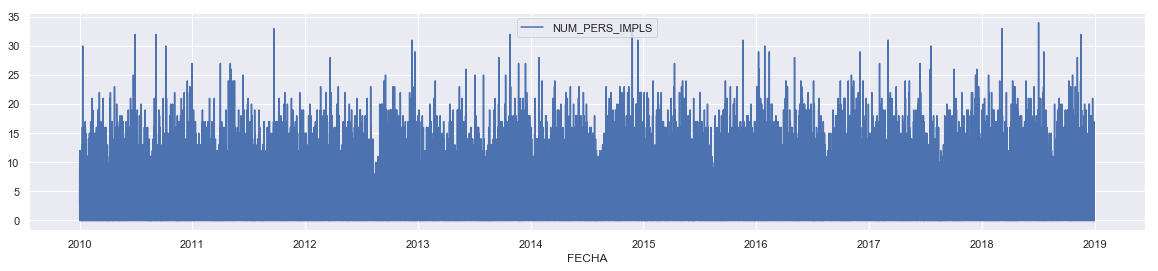

In [235]:
import io
import pandas as pd

df_series_tiempo.plot(figsize=(20,4));

In [275]:
df_sub_series_tiempo_2010 = df_series_tiempo["2010-01-01":"2010-12-31"]
df_sub_series_tiempo_2011 = df_series_tiempo["2011-01-01":"2011-12-31"]
df_sub_series_tiempo_2012 = df_series_tiempo["2012-01-01":"2012-12-31"]
df_sub_series_tiempo_2013 = df_series_tiempo["2013-01-01":"2013-12-31"]
df_sub_series_tiempo_2014 = df_series_tiempo["2014-01-01":"2014-12-31"]
df_sub_series_tiempo_2015 = df_series_tiempo["2015-01-01":"2015-12-31"]
df_sub_series_tiempo_2016 = df_series_tiempo["2016-01-01":"2016-12-31"]
df_sub_series_tiempo_2017 = df_series_tiempo["2017-01-01":"2017-12-31"]
df_sub_series_tiempo_2018 = df_series_tiempo["2018-01-01":"2018-12-31"]

In [276]:
import matplotlib.pyplot as plt

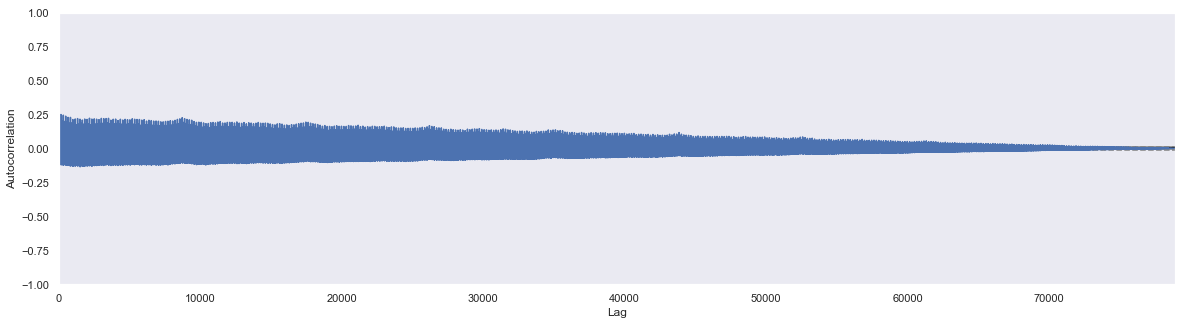

In [277]:
# Relación de confianza para la aleatoriedad en 0 y correlación al 99% y 95%
# Serie estacionaria por ser menor del 0.5
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,5))

autocorrelation_plot(df_sub_series_tiempo)

In [278]:
##############################

In [279]:
# PRIMERA ETAPA: representar gráficamente la serie para identificar la tendencia y la estacionalidad 

In [280]:
# Esta función es utilizada para mostrar los gráficos
##import matplotlib.pyplot as mplt 
#Se utilizará seaborn para el estilo de los gráficos y se ajustará el tamaño 
# de figura predeterminado a una forma más adecuada para las gráficas de series temporales.
import seaborn as sbn 
sbn.set(rc={'figure.figsize':(20, 5)})

In [281]:
# Descomponemos la serie temporal xa 2010
import statsmodels.api as sm
s=sm.tsa.seasonal_decompose(df_sub_series_tiempo["2010-01-01":"2010-12-31"])

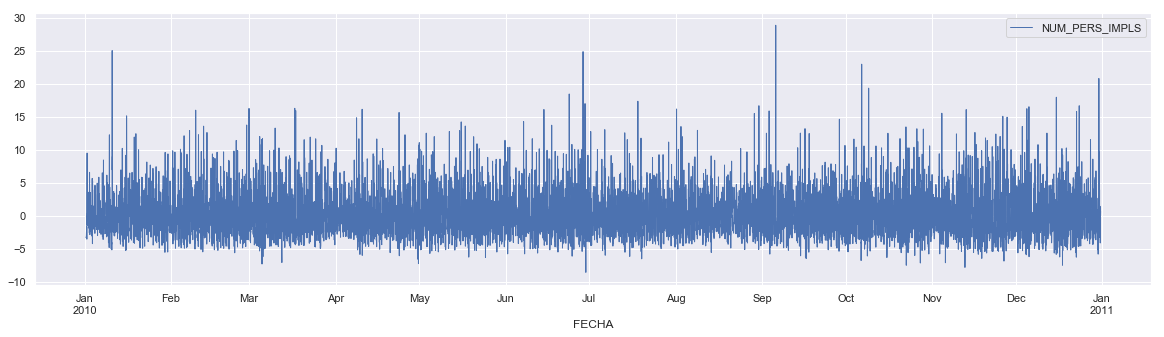

In [282]:
#Se creará un gráfico de líneas de la series temporales completas, utilizando el método plot
sbn.set(rc={'figure.figsize':(20, 5)})
s.resid.plot(linewidth=1)

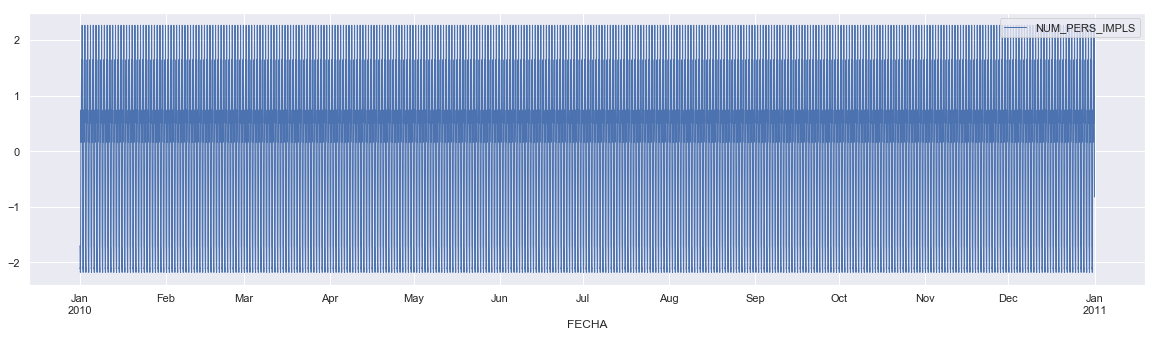

In [283]:
sbn.set(rc={'figure.figsize':(20, 5)})
s.seasonal.plot(linewidth=1)

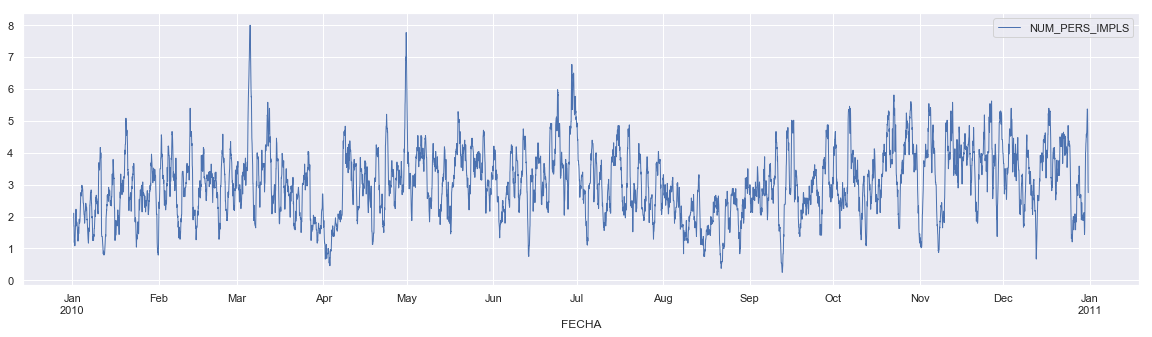

In [284]:
s.trend.plot(linewidth=1)

In [285]:
nube_puntos = [s.resid, s.seasonal, s.trend] 

In [286]:
type(nube_puntos)

list

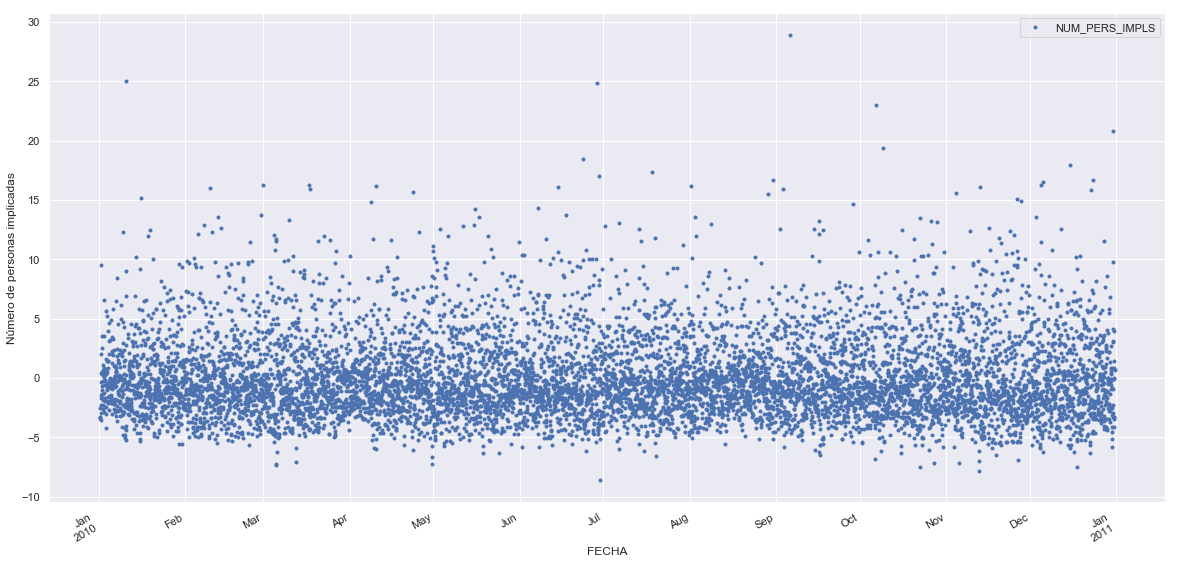

In [287]:
ejes = s.resid.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de personas implicadas')

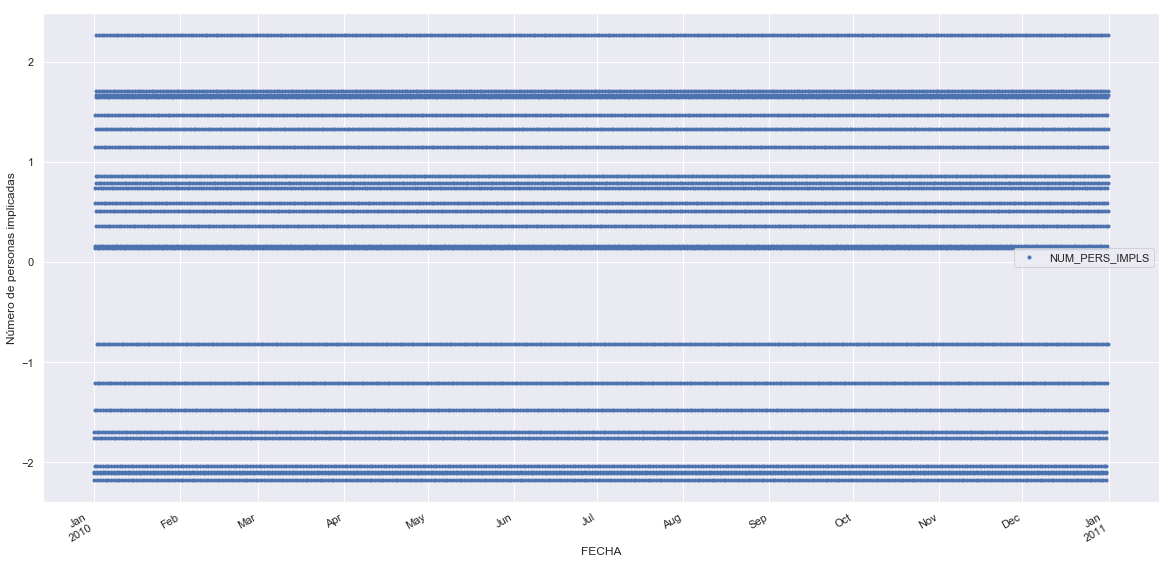

In [288]:
ejes = s.seasonal.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de personas implicadas')

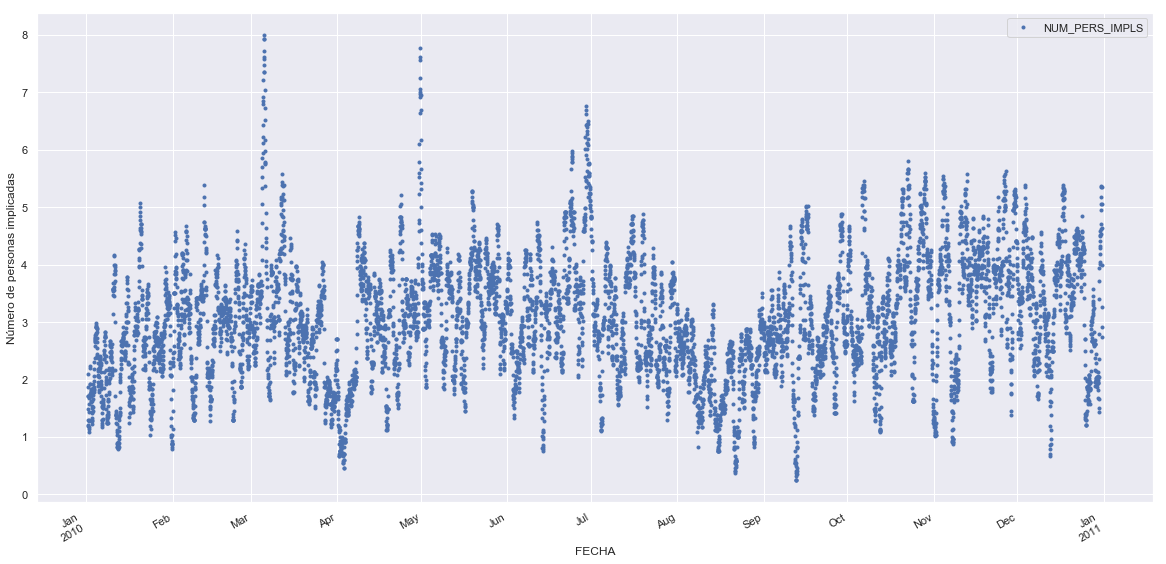

In [289]:
ejes = s.trend.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de personas implicadas')

In [290]:
######## ESTACIONALIDAD

In [291]:
# Remuestreo de frecuencia para la media diaria
#columnas = ['name1','name2','namen']
media_diaria = df_series_tiempo["NUM_PERS_IMPLS"].resample('D').mean()
media_diaria.head(3)

FECHA
2010-01-01    2.166667
2010-01-02    1.750000
2010-01-03    1.916667
Freq: D, Name: NUM_PERS_IMPLS, dtype: float64

In [292]:
# Remuestreo de frecuencia para la media semanal
#columnas = ['name1','name2','namen']
media_semanal = df_series_tiempo["NUM_PERS_IMPLS"].resample('W').mean()
media_semanal.head(3)

FECHA
2010-01-03    1.944444
2010-01-10    2.363095
2010-01-17    2.017857
Freq: W-SUN, Name: NUM_PERS_IMPLS, dtype: float64

In [293]:
# Remuestreo de frecuencia para la media mensual
#columnas = ['name1','name2','namen']
media_mensual = df_series_tiempo["NUM_PERS_IMPLS"].resample('M').mean()
media_mensual.head(3)

FECHA
2010-01-31    2.426075
2010-02-28    3.023810
2010-03-31    3.025538
Freq: M, Name: NUM_PERS_IMPLS, dtype: float64

In [294]:
# Remuestreo de frecuencia para la media anual
#columnas = ['name1','name2','namen']
media_anual = df_series_tiempo["NUM_PERS_IMPLS"].resample('Y').mean()
media_anual.head(3)

FECHA
2010-12-31    3.034018
2011-12-31    3.121233
2012-12-31    3.071721
Freq: A-DEC, Name: NUM_PERS_IMPLS, dtype: float64

In [295]:
df_series_tiempo.shape[0]

78865

In [296]:
media_diaria.shape[0]

3287

In [297]:
media_semanal.shape[0]

471

In [298]:
media_mensual.shape[0]

108

In [299]:
media_anual.shape[0]

9

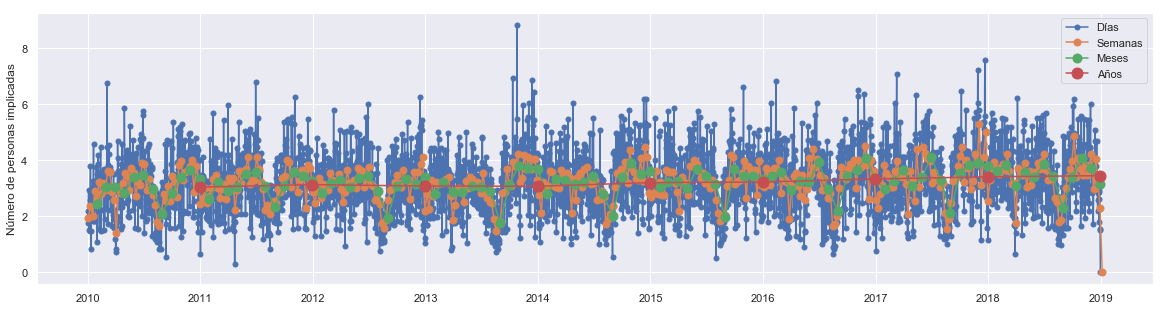

In [300]:
## Se trazarán las series temporales diarias y semanales juntas en un solo período de 1 mes para compararlas.
inicio, final = df_series_tiempo.index.values[0], df_series_tiempo.index.values[-1]
fig, eje = plt.subplots()
#eje.plot(df_series_tiempo.loc[inicio:final,'NUM_PERS_IMPLS'], marker='.',linestyle='-',linewidth=0.5,label='Horas')
eje.plot(media_diaria,marker='o',markersize=5,label='Días')
eje.plot(media_semanal,marker='o',markersize=7,label='Semanas')
eje.plot(media_mensual,marker='o',markersize=9,label='Meses')
eje.plot(media_anual,marker='o',markersize=11,label='Años')
eje.set_ylabel('Número de personas implicadas')
eje.legend()

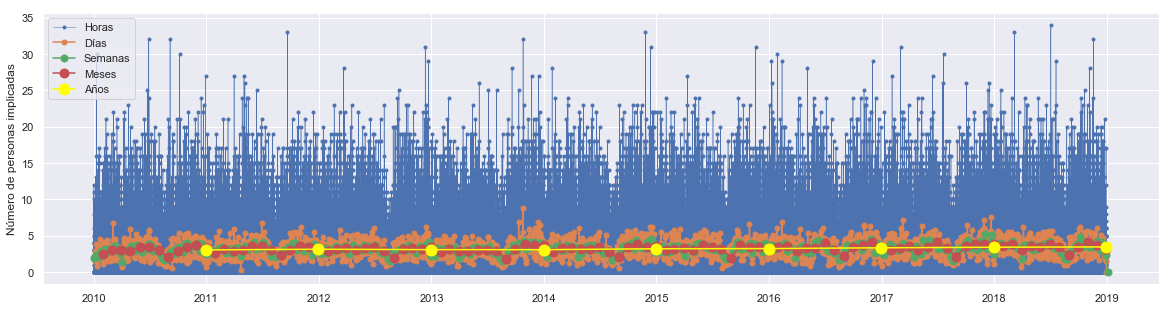

In [301]:
## Se trazarán las series temporales de visualización general.
inicio, final = df_series_tiempo.index.values[0], df_series_tiempo.index.values[-1]
fig,eje = plt.subplots()
eje.plot(df_series_tiempo.loc[inicio:final,'NUM_PERS_IMPLS'], marker='.',linestyle='-',linewidth=0.5,label='Horas')
eje.plot(media_diaria,marker='o',markersize=5,label='Días')
eje.plot(media_semanal,marker='o',markersize=7,label='Semanas')
eje.plot(media_mensual,marker='o',markersize=9,label='Meses')
eje.plot(media_anual,marker='o',markersize=11, color='yellow', label='Años')
eje.set_ylabel('Número de personas implicadas')
eje.legend()

In [302]:
# Comprobar valores nulos
df_series_tiempo.isnull().sum()

NUM_PERS_IMPLS    0
dtype: int64

In [303]:
media_diaria.isnull().sum()

0

In [304]:
media_semanal.isnull().sum()

0

In [305]:
media_mensual.isnull().sum()

0

In [306]:
media_anual.isnull().sum()

0

In [307]:
# ventanas deslizantes: superponen tiempos y “deslizan” a la misma frecuencia que los datos, 
# por lo que las series temporales transformadas tienen la misma frecuencia que las series temporales originales.
# la misma ponderacion
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sbn

Text(0.5, 1.0, 'Tendencias de personas implicadas en accidentes de tráfico')

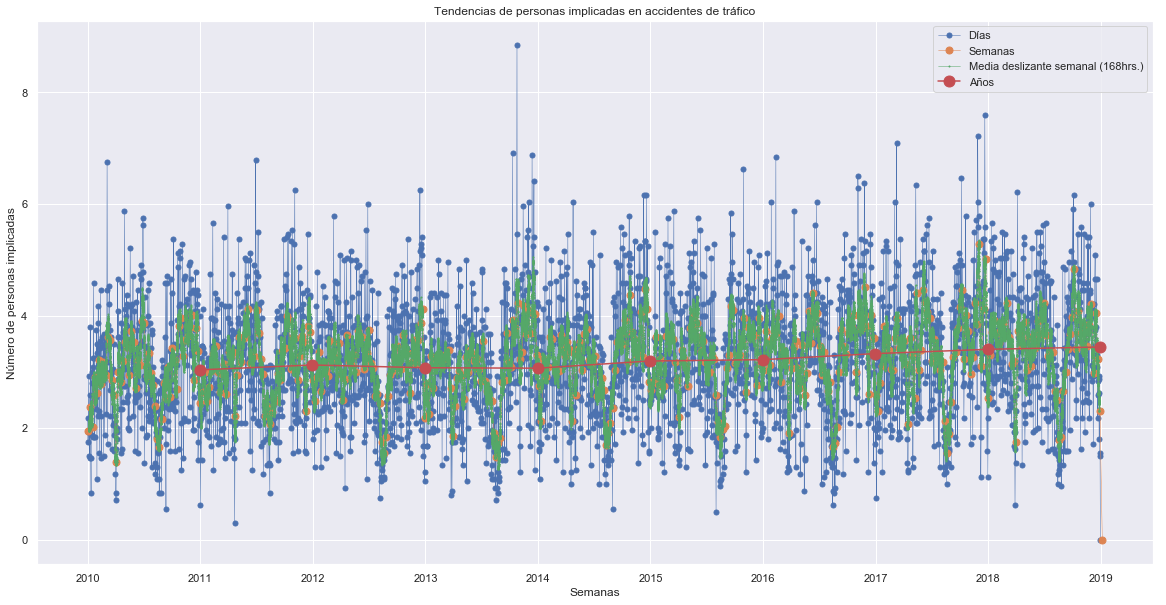

In [308]:
sbn.set(rc={'figure.figsize':(20, 10)})
media_vd_semanal = df_series_tiempo["NUM_PERS_IMPLS"].rolling(168, center=True).mean()
inicio_vd, final_vd = df_series_tiempo.index.values[0], df_series_tiempo.index.values[-1]
fig_vd,eje_vd = plt.subplots()
#eje_vd.plot(df_series_tiempo['NUM_PERS_IMPLS'], marker='.', markersize=2, color='0.6', linestyle='None', label='Horas')
eje_vd.plot(media_diaria,marker='o',markersize=5,linestyle='-', linewidth=0.5,label='Días')
eje_vd.plot(media_semanal,marker='o',markersize=7,linestyle='-', linewidth=0.5,label='Semanas')
eje_vd.plot(media_vd_semanal,marker='o',markersize=1,linestyle='-', linewidth=0.5,label='Media deslizante semanal (168hrs.)')
#eje_vd.plot(media_vd_semanal, linewidth=2, label='Media deslizante semanal')
eje_vd.plot(media_anual,marker='o',markersize=11,label='Años')
eje_vd.legend()
eje_vd.set_xlabel('Semanas')
eje_vd.set_ylabel('Número de personas implicadas')
eje_vd.set_title('Tendencias de personas implicadas en accidentes de tráfico')

In [309]:
# comprobar Prueba de Dicky-Fuller (DF-test) proporciona una manera más precisa de medir 
# la estacionariedad de nuestra serie. (“Test Statistic” menor que todos los “Critical Value”)
# CONCLUSION: Serie estacionaria

In [310]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
# Perform Dickey-Fuller test:
# Por defecto con AIC, se emplea el argumento de regresión de deriva constante ('c'), centrando la serie en 0.
print ('Results of Dickey-Fuller Test:')
df_series_tiempo_DickeyFuller = df_series_tiempo.iloc[:,0].values
dftest_DF = adfuller(df_series_tiempo_DickeyFuller, autolag='AIC')
dfoutput_DF = pd.Series(dftest_DF[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_DF[4].items():
    dfoutput_DF['Critical Value (%s)'%key] = value
print(dfoutput_DF)
# El resultado indica que la serie es estacionaria, rechazando la hipótesis nula al 0.05 (5%) por p-value
# y puesto que el Test Statistic, es más negativo que cualquiera de los valores críticos.

Results of Dickey-Fuller Test:
Test Statistic                   -29.402561
p-value                            0.000000
#Lags Used                        64.000000
Number of Observations Used    78800.000000
Critical Value (1%)               -3.430433
Critical Value (5%)               -2.861577
Critical Value (10%)              -2.566790
dtype: float64


In [311]:
# Perform Dickey-Fuller test:
# Por defecto con AIC, se emplea el argumento de regresión de deriva constante ('c'), centrando la serie en 0.
# ahora pruebo con un estadístico mejor: # * 'ct' : constant and trend
print ('Results of Dickey-Fuller Test:')
dftest_DF_ct = adfuller(df_series_tiempo_DickeyFuller, regression='ct', autolag='AIC')
dfoutput_DF_ct = pd.Series(dftest_DF_ct[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_DF_ct[4].items():
    dfoutput_DF['Critical Value (%s)'%key] = value
print(dfoutput_DF_ct)
# El resultado indica que la serie sigue siendo estacionaria, rechazando la hipótesis nula al 0.05 (5%) por p-value
# y puesto que el Test Statistic, es más negativo que cualquiera de los valores críticos.

Results of Dickey-Fuller Test:
Test Statistic                   -29.874989
p-value                            0.000000
#Lags Used                        64.000000
Number of Observations Used    78800.000000
dtype: float64


In [312]:
# plt.plot(df_series_tiempo)

In [313]:
# Por diferenciación
# df_series_tiempo_diff = df_series_tiempo - df_series_tiempo.shift()
# plt.plot(df_series_tiempo_diff)

In [314]:
# Análisis de los residuos: 
# debe verificarse el supuesto de que los errores del modelo son un proceso puramente aleatorio 
# (media cero, varianza constante y no correlación serial), es decir, que no tienen estructura de 
# dependencia (los residuos no deben estar correlacionados al pasado, deben ser independientes 
# los unos de los otros) y seguit un proceso de ruido blanco.

In [315]:
# FORECASTING PROBABILIDAD versus ALEATORIEDAD (bandas de Bartlett)
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [316]:
df_series_tiempo.mean()

NUM_PERS_IMPLS    3.207418
dtype: float64

In [317]:
s.resid.mean()

NUM_PERS_IMPLS   -0.001021
dtype: float64

In [318]:
s.seasonal.mean()

NUM_PERS_IMPLS   -1.479917e-16
dtype: float64

In [319]:
s.trend.mean()

NUM_PERS_IMPLS    3.035018
dtype: float64

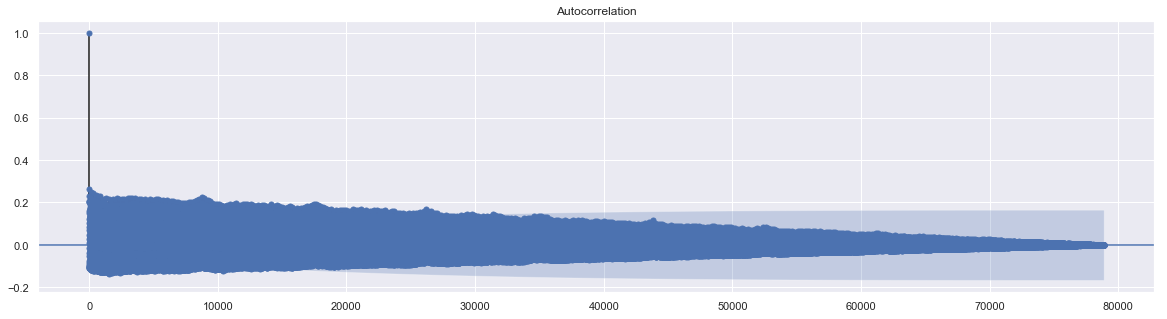

In [320]:
sbn.set(rc={'figure.figsize':(20, 5)})
plot_acf(df_series_tiempo)
pyplot.show()

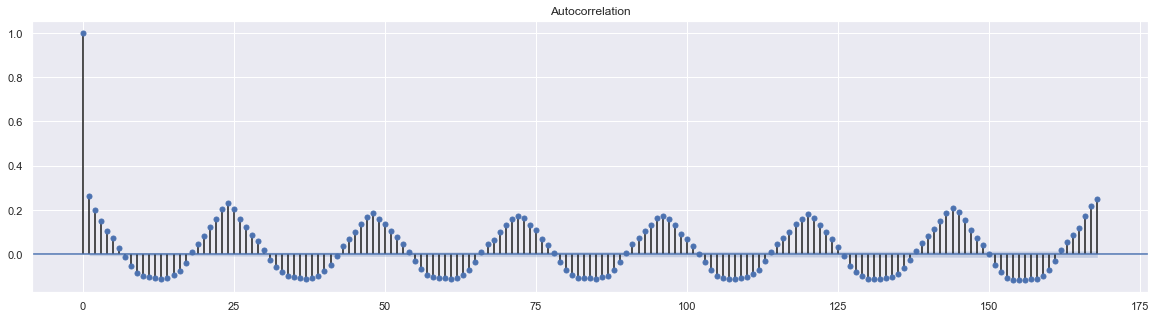

In [1093]:
plot_acf(df_series_tiempo, lags=168)
pyplot.show()

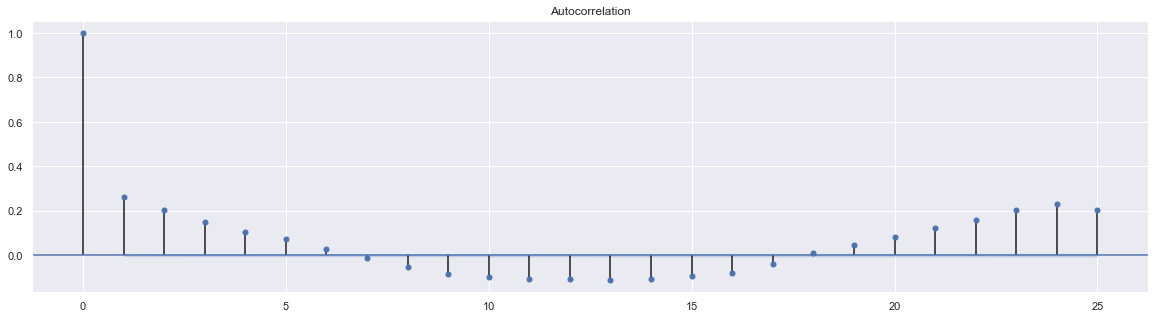

In [321]:
plot_acf(df_series_tiempo, lags=25)
pyplot.show()

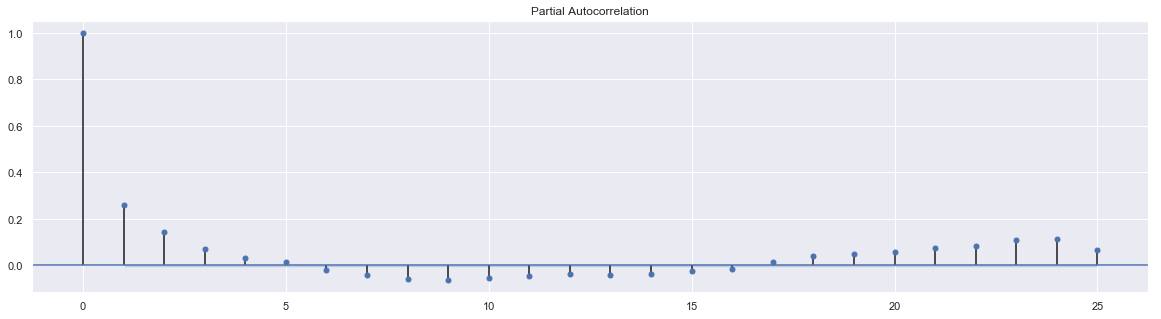

In [322]:
plot_pacf(df_series_tiempo, lags=25)
pyplot.show()

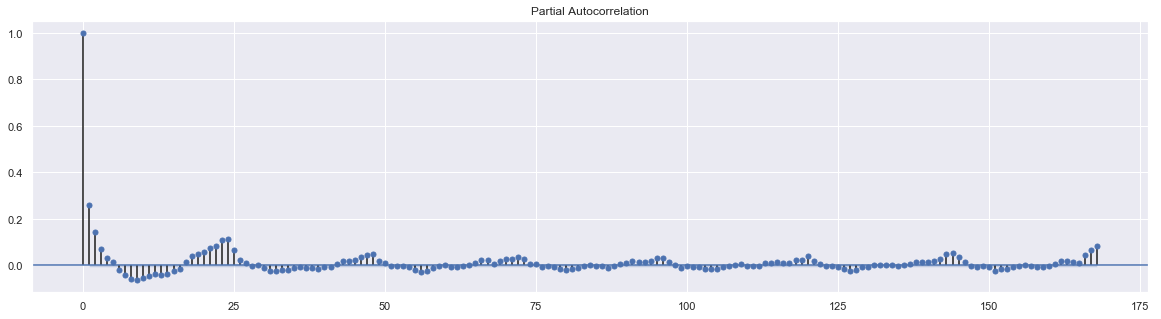

In [323]:
plot_pacf(df_series_tiempo, lags=168)
pyplot.show()

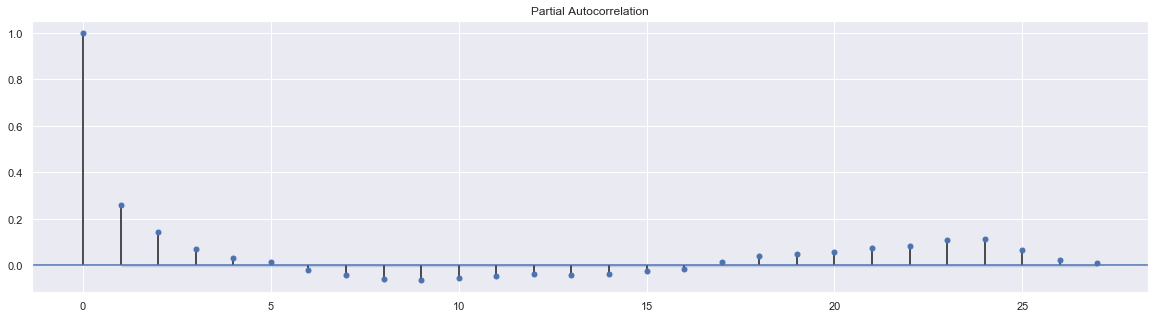

In [324]:
plot_pacf(df_series_tiempo, lags=27)
pyplot.show()

In [325]:
# aqui 09112019 20:26 generalizar hoja de trabajo del file 04

In [326]:
#################### PRUEBA APLICACION ARMA
# modelo que utiliza la máxima probabilidad exacta a través del filtro de Kalman
# mediante el método (mle), incluyendo constante, con el solucionador por defecto: limited memory BFGS uses m=12,
# imprimiendo la información de convergencia para los controles de frecuencia durante las iteraciones (disp=True),
# utilizando los residuos por defecto para el mejor resultado (start_ar_lags)

In [327]:
%matplotlib inline

In [328]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [329]:
import seaborn as sbn

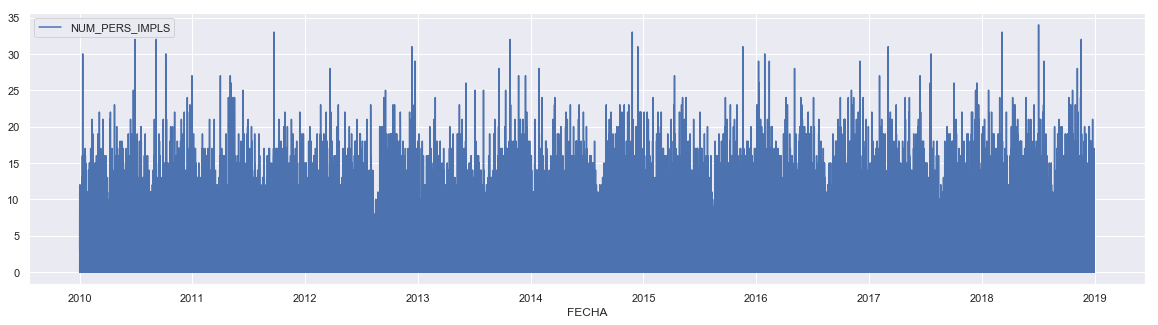

In [330]:
df_series_tiempo.plot(figsize=(20,5));

In [331]:
df_series_tiempo.shape

(78865, 1)

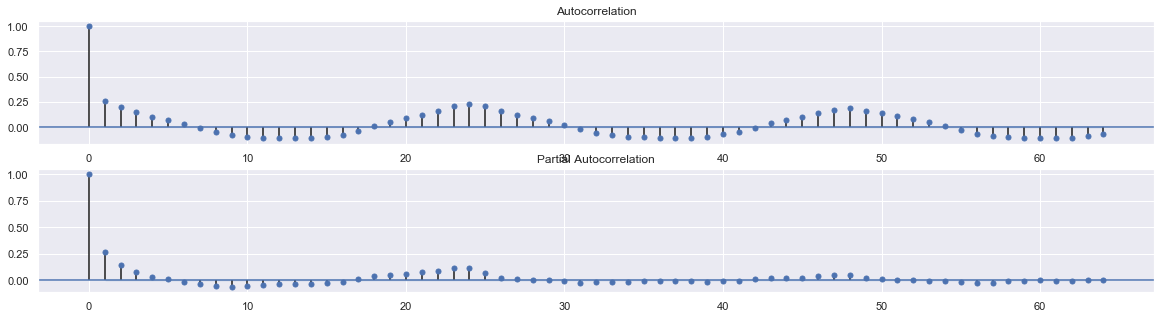

In [332]:
# Plot con statsmodel reduciendo dimensionalidad a escalares con squeeze
fig_sm = plt.figure(figsize=(20,5))
ax1_sm = fig_sm.add_subplot(211)
fig_sm = sm.graphics.tsa.plot_acf(df_series_tiempo.values.squeeze(), lags=64, ax=ax1_sm)
ax2_sm = fig_sm.add_subplot(212)
fig_sm = sm.graphics.tsa.plot_pacf(df_series_tiempo, lags=64, ax=ax2_sm)

In [333]:
df_series_tiempo.shape

(78865, 1)

In [334]:
df_series_tiempo.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2018-12-30 15:00:00', '2018-12-30 16:00:00',
               '2018-12-30 17:00:00', '2018-12-30 18:00:00',
               '2018-12-30 19:00:00', '2018-12-30 20:00:00',
               '2018-12-30 21:00:00', '2018-12-30 22:00:00',
               '2018-12-30 23:00:00', '2018-12-31 00:00:00'],
              dtype='datetime64[ns]', name='FECHA', length=78865, freq=None)

In [335]:
df_series_tiempo.NUM_PERS_IMPLS.count()

78865

In [336]:
############# prueba

In [337]:
df_series_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78865 entries, 2010-01-01 00:00:00 to 2018-12-31 00:00:00
Data columns (total 1 columns):
NUM_PERS_IMPLS    78865 non-null int64
dtypes: int64(1)
memory usage: 3.7 MB


                     NUM_PERS_IMPLS
FECHA                              
2010-01-01 00:00:00               3
2010-01-01 01:00:00               8
2010-01-01 02:00:00               2
2010-01-01 03:00:00               0
2010-01-01 04:00:00              11


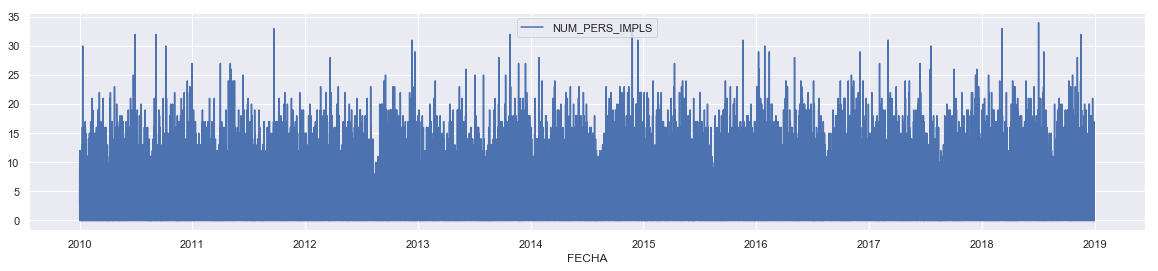

In [338]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

print(df_series_tiempo.head())
df_series_tiempo.plot(figsize=(20,4));
#df_series_tiempo.plot()
pyplot.show()

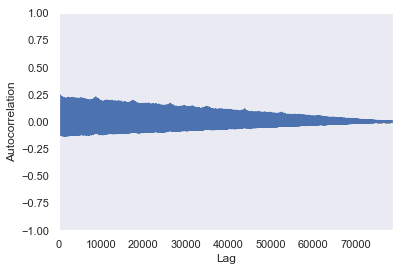

In [339]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(df_series_tiempo)
pyplot.show()

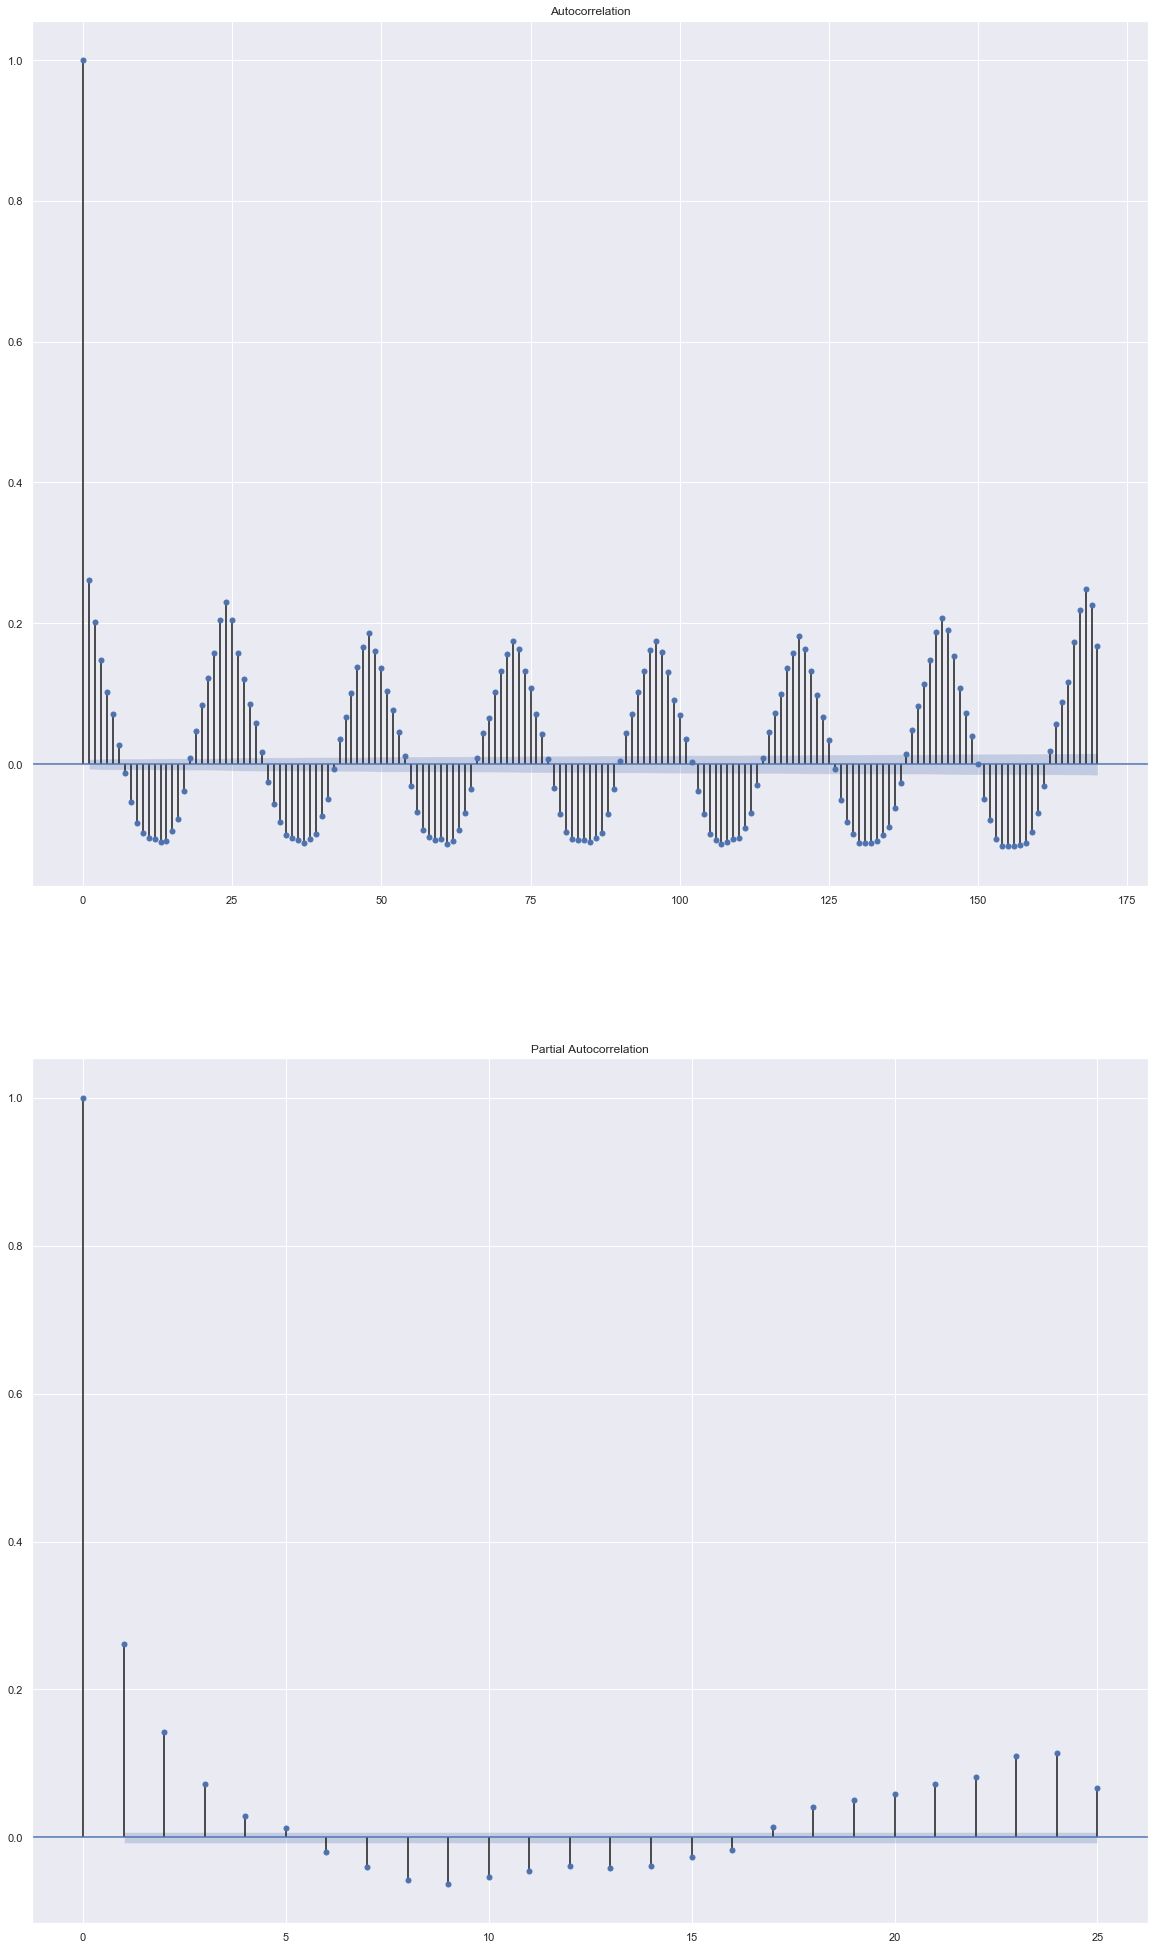

In [340]:
# Plot con statsmodel reduciendo dimensionalidad a escalares con squeeze
fig_sm = plt.figure(figsize=(20,35))
ax1_sm = fig_sm.add_subplot(211)
fig_sm = sm.graphics.tsa.plot_acf(df_series_tiempo.values.squeeze(), lags=170, ax=ax1_sm)
ax2_sm = fig_sm.add_subplot(212)
fig_sm = sm.graphics.tsa.plot_pacf(df_series_tiempo, lags=25, ax=ax2_sm)

In [341]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# Creamos un objeto ARIMA Model Naive, para una configuración determinada (P, D, Q) 
# y lo entrenamos en nuestros datos utilizando el método fit:
model_101 = ARIMA(df_series_tiempo, order=(1,0,1), freq='H')
model_101_fit = model_101.fit(disp=0, method='mle')
print(model_101_fit.summary())

                              ARMA Model Results                              
Dep. Variable:         NUM_PERS_IMPLS   No. Observations:                78865
Model:                     ARMA(1, 1)   Log Likelihood             -218335.914
Method:                           mle   S.D. of innovations              3.856
Date:                Sun, 10 Nov 2019   AIC                         436679.829
Time:                        17:23:17   BIC                         436716.931
Sample:                    01-01-2010   HQIC                        436691.210
                         - 12-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.2074      0.024    132.157      0.000       3.160       3.255
ar.L1.NUM_PERS_IMPLS     0.7080      0.006    113.498      0.000       0.696       0.720
ma.L1.NUM_PE

In [342]:
print(model_101_fit.summary2())

                            Results: ARMA
Model:              ARMA             BIC:                 436716.9308
Dependent Variable: NUM_PERS_IMPLS   Log-Likelihood:      -2.1834e+05
Date:               2019-11-10 17:25 Scale:               1.0000     
No. Observations:   78865            Method:              mle        
Df Model:           3                Sample:              01-01-2010 
Df Residuals:       78862                                 12-31-2018 
Converged:          1.0000           S.D. of innovations: 3.856      
No. Iterations:     11.0000          HQIC:                436691.210 
AIC:                436679.8288                                      
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                 3.2074   0.0243 132.1569 0.0000  3.1598  3.2549
ar.L1.NUM_PERS_IMPLS  0.7080   0.0062 113.4980 0

In [343]:
# Creamos otro modelo ARIMA, para una configuración determinada (P, D, Q) 
# y lo entrenamos en nuestros datos utilizando el método fit:
model_410 = ARIMA(df_series_tiempo, order=(4,1,0), freq='H')
model_410_fit = model_410.fit(disp=0, method='mle')
print(model_410_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.NUM_PERS_IMPLS   No. Observations:                78864
Model:                 ARIMA(4, 1, 0)   Log Likelihood             -222979.813
Method:                           mle   S.D. of innovations              4.090
Date:                Sun, 10 Nov 2019   AIC                         445971.625
Time:                        17:28:05   BIC                         446027.278
Sample:                    01-01-2010   HQIC                        445988.697
                         - 12-31-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.251e-05      0.006     -0.009      0.993      -0.011       0.011
ar.L1.D.NUM_PERS_IMPLS    -0.6609      0.004   -187.442      0.000      -0.668      -0.654
ar.L

In [344]:
# Creamos otro modelo ARIMA de reajuste, para una configuración determinada (P, D, Q) 
# y lo entrenamos en nuestros datos utilizando el método fit:
model_310 = ARIMA(df_series_tiempo, order=(3,1,0), freq='H')
model_310_fit = model_310.fit(disp=3, method='mle')
print(model_310_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.NUM_PERS_IMPLS   No. Observations:                78864
Model:                 ARIMA(3, 1, 0)   Log Likelihood             -223764.286
Method:                           mle   S.D. of innovations              4.131
Date:                Sun, 10 Nov 2019   AIC                         447538.572
Time:                        17:30:09   BIC                         447584.950
Sample:                    01-01-2010   HQIC                        447552.799
                         - 12-31-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.104e-05      0.007     -0.008      0.994      -0.013       0.013
ar.L1.D.NUM_PERS_IMPLS    -0.6352      0.004   -181.438      0.000      -0.642      -0.628
ar.L

In [345]:
print(model_310_fit.summary2())

                             Results: ARIMA
Model:               ARIMA             BIC:                  447584.9497
Dependent Variable:  D.NUM_PERS_IMPLS  Log-Likelihood:       -2.2376e+05
Date:                2019-11-10 17:32  Scale:                1.0000     
No. Observations:    78864             Method:               mle        
Df Model:            4                 Sample:               01-01-2010 
Df Residuals:        78860                                   12-31-2018 
Converged:           1.0000            S.D. of innovations:  4.131      
No. Iterations:      4.0000            HQIC:                 447552.799 
AIC:                 447538.5723                                        
------------------------------------------------------------------------
                        Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
const                  -0.0001   0.0067   -0.0076 0.9939 -0.0132  0.0131
ar.L1.D

In [346]:
print(model_310_fit.params)

const                    -0.000051
ar.L1.D.NUM_PERS_IMPLS   -0.635191
ar.L2.D.NUM_PERS_IMPLS   -0.380288
ar.L3.D.NUM_PERS_IMPLS   -0.182837
dtype: float64


In [347]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = df_series_tiempo.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print('Final mean squared error score (MSE):')
print('--------------------------------------')
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0, method='mle')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Final mean squared error score (MSE):
--------------------------------------
predicted=5.640072, expected=13.000000
predicted=8.223384, expected=17.000000
predicted=12.135643, expected=2.000000
predicted=9.007274, expected=4.000000
predicted=7.715250, expected=3.000000
predicted=5.638925, expected=3.000000
predicted=3.014266, expected=0.000000
predicted=2.111881, expected=0.000000
predicted=1.146912, expected=0.000000
predicted=0.551909, expected=0.000000
predicted=-0.000171, expected=0.000000
predicted=-0.000171, expected=0.000000
predicted=-0.000172, expected=0.000000
predicted=-0.000171, expected=8.000000
predicted=2.858869, expected=2.000000
predicted=2.797058, expected=7.000000
predicted=4.608616, expected=0.000000
predicted=3.691307, expected=0.000000
predicted=1.755978, expected=6.000000
predicted=3.432101, expected=7.000000
predicted=4.063335, expected=5.000000
predicted=4.798810, expected=2.000000
predicted=4.508564, expected=0.000000
predicted=2.800228, expected=11.000000
pre

predicted=5.618528, expected=9.000000
predicted=6.545288, expected=11.000000
predicted=7.266071, expected=0.000000
predicted=5.569799, expected=10.000000
predicted=7.405058, expected=14.000000
predicted=9.635600, expected=3.000000
predicted=6.700830, expected=16.000000
predicted=11.108330, expected=0.000000
predicted=7.348022, expected=5.000000
predicted=5.503470, expected=0.000000
predicted=4.251749, expected=0.000000
predicted=0.988975, expected=3.000000
predicted=1.991488, expected=0.000000
predicted=0.782980, expected=0.000000
predicted=0.593376, expected=4.000000
predicted=1.980300, expected=0.000000
predicted=1.044024, expected=0.000000
predicted=0.791305, expected=7.000000
predicted=3.235398, expected=2.000000
predicted=2.541172, expected=5.000000
predicted=3.692379, expected=8.000000
predicted=5.845467, expected=8.000000
predicted=6.302209, expected=0.000000
predicted=4.591697, expected=2.000000
predicted=3.769765, expected=0.000000
predicted=1.994359, expected=3.000000
predict

predicted=2.759873, expected=9.000000
predicted=5.238538, expected=0.000000
predicted=3.917934, expected=5.000000
predicted=4.854075, expected=0.000000
predicted=2.963262, expected=4.000000
predicted=2.416372, expected=2.000000
predicted=2.679374, expected=6.000000
predicted=3.454802, expected=3.000000
predicted=3.769886, expected=0.000000
predicted=2.337900, expected=0.000000
predicted=1.698293, expected=0.000000
predicted=0.552488, expected=0.000000
predicted=-0.000170, expected=2.000000
predicted=0.713835, expected=0.000000
predicted=0.522083, expected=0.000000
predicted=0.395226, expected=0.000000
predicted=0.368268, expected=0.000000
predicted=-0.000170, expected=4.000000
predicted=1.427838, expected=6.000000
predicted=3.186431, expected=0.000000
predicted=2.357302, expected=1.000000
predicted=2.279951, expected=0.000000
predicted=1.366290, expected=4.000000
predicted=1.625555, expected=2.000000
predicted=1.942533, expected=10.000000
predicted=4.882871, expected=9.000000
predicted

predicted=8.956106, expected=3.000000
predicted=6.709550, expected=9.000000
predicted=7.078987, expected=8.000000
predicted=7.641022, expected=0.000000
predicted=4.420447, expected=4.000000
predicted=4.667454, expected=3.000000
predicted=3.588340, expected=9.000000
predicted=4.787875, expected=0.000000
predicted=3.679365, expected=3.000000
predicted=3.403044, expected=0.000000
predicted=2.440750, expected=0.000000
predicted=0.592931, expected=3.000000
predicted=1.623570, expected=0.000000
predicted=0.783103, expected=3.000000
predicted=1.664206, expected=0.000000
predicted=1.335606, expected=0.000000
predicted=0.592958, expected=0.000000
predicted=0.552290, expected=0.000000
predicted=-0.000169, expected=0.000000
predicted=-0.000169, expected=0.000000
predicted=-0.000169, expected=3.000000
predicted=1.071077, expected=0.000000
predicted=0.783138, expected=14.000000
predicted=5.591757, expected=6.000000
predicted=6.350700, expected=0.000000
predicted=4.334719, expected=13.000000
predict

predicted=3.905048, expected=2.000000
predicted=3.223735, expected=17.000000
predicted=8.096504, expected=8.000000
predicted=8.245670, expected=11.000000
predicted=9.752660, expected=8.000000
predicted=10.437952, expected=6.000000
predicted=7.882158, expected=0.000000
predicted=5.175712, expected=9.000000
predicted=5.867295, expected=10.000000
predicted=7.020964, expected=0.000000
predicted=4.400452, expected=1.000000
predicted=3.993088, expected=0.000000
predicted=2.098108, expected=0.000000
predicted=0.198161, expected=1.000000
predicted=0.540011, expected=1.000000
predicted=0.617891, expected=0.000000
predicted=0.459694, expected=0.000000
predicted=0.381815, expected=0.000000
predicted=0.183484, expected=0.000000
predicted=-0.000169, expected=0.000000
predicted=-0.000169, expected=11.000000
predicted=3.921631, expected=21.000000
predicted=10.367186, expected=0.000000
predicted=7.671640, expected=4.000000
predicted=7.613178, expected=5.000000
predicted=6.686972, expected=5.000000
pre

predicted=0.521988, expected=1.000000
predicted=0.753256, expected=2.000000
predicted=1.342666, expected=6.000000
predicted=2.863634, expected=11.000000
predicted=6.076345, expected=6.000000
predicted=6.571017, expected=9.000000
predicted=8.062303, expected=2.000000
predicted=6.272271, expected=4.000000
predicted=4.835173, expected=7.000000
predicted=5.593799, expected=8.000000
predicted=5.845281, expected=0.000000
predicted=4.209246, expected=19.000000
predicted=9.656389, expected=6.000000
predicted=8.574340, expected=0.000000
predicted=5.332164, expected=3.000000
predicted=5.749537, expected=0.000000
predicted=1.884415, expected=0.000000
predicted=0.594387, expected=7.000000
predicted=3.050864, expected=0.000000
predicted=1.827639, expected=0.000000
predicted=1.387406, expected=0.000000
predicted=1.284521, expected=0.000000
predicted=-0.000168, expected=0.000000
predicted=-0.000168, expected=0.000000
predicted=-0.000168, expected=0.000000
predicted=-0.000168, expected=0.000000
predic

predicted=6.459430, expected=0.000000
predicted=4.217882, expected=3.000000
predicted=4.127871, expected=2.000000
predicted=2.971239, expected=9.000000
predicted=4.331842, expected=9.000000
predicted=6.511425, expected=9.000000
predicted=7.709895, expected=8.000000
predicted=8.642571, expected=7.000000
predicted=8.024377, expected=5.000000
predicted=6.851006, expected=4.000000
predicted=5.590373, expected=6.000000
predicted=5.465772, expected=6.000000
predicted=5.420730, expected=4.000000
predicted=4.916142, expected=0.000000
predicted=3.333048, expected=0.000000
predicted=1.895756, expected=0.000000
predicted=0.737076, expected=0.000000
predicted=-0.000166, expected=0.000000
predicted=-0.000167, expected=0.000000
predicted=-0.000167, expected=0.000000
predicted=-0.000167, expected=0.000000
predicted=-0.000167, expected=1.000000
predicted=0.357516, expected=2.000000
predicted=0.975754, expected=7.000000
predicted=3.222297, expected=3.000000
predicted=3.476077, expected=0.000000
predict

predicted=1.073742, expected=7.000000
predicted=3.287404, expected=10.000000
predicted=5.996046, expected=8.000000
predicted=7.403444, expected=0.000000
predicted=5.346396, expected=8.000000
predicted=6.284183, expected=7.000000
predicted=6.063319, expected=0.000000
predicted=3.402636, expected=5.000000
predicted=4.644660, expected=16.000000
predicted=8.319119, expected=3.000000
predicted=6.228274, expected=7.000000
predicted=7.367600, expected=2.000000
predicted=6.078261, expected=7.000000
predicted=4.960898, expected=5.000000
predicted=5.297104, expected=0.000000
predicted=3.052807, expected=1.000000
predicted=2.634252, expected=0.000000
predicted=1.181133, expected=0.000000
predicted=0.197280, expected=0.000000
predicted=0.183990, expected=0.000000
predicted=-0.000166, expected=1.000000
predicted=0.357783, expected=2.000000
predicted=0.976225, expected=4.000000
predicted=2.150082, expected=5.000000
predicted=3.410647, expected=15.000000
predicted=7.830233, expected=1.000000
predicte

predicted=1.692906, expected=3.000000
predicted=2.313466, expected=20.000000
predicted=8.918549, expected=4.000000
predicted=7.970877, expected=5.000000
predicted=7.333033, expected=4.000000
predicted=7.205448, expected=10.000000
predicted=6.346027, expected=0.000000
predicted=4.314760, expected=5.000000
predicted=4.500217, expected=11.000000
predicted=7.081999, expected=5.000000
predicted=5.642246, expected=5.000000
predicted=6.184622, expected=16.000000
predicted=10.042955, expected=7.000000
predicted=8.580931, expected=7.000000
predicted=8.409720, expected=6.000000
predicted=8.298916, expected=1.000000
predicted=4.591390, expected=0.000000
predicted=2.733421, expected=13.000000
predicted=5.956075, expected=3.000000
predicted=4.643461, expected=7.000000
predicted=5.855331, expected=0.000000
predicted=4.808889, expected=0.000000
predicted=1.934519, expected=3.000000
predicted=2.362146, expected=1.000000
predicted=1.139281, expected=0.000000
predicted=0.852883, expected=4.000000
predic

predicted=1.629110, expected=0.000000
predicted=1.226567, expected=0.000000
predicted=0.788942, expected=3.000000
predicted=1.810280, expected=0.000000
predicted=0.781782, expected=3.000000
predicted=1.665664, expected=2.000000
predicted=2.050099, expected=6.000000
predicted=3.260917, expected=8.000000
predicted=5.374687, expected=17.000000
predicted=9.723810, expected=0.000000
predicted=7.114505, expected=0.000000
predicted=4.826640, expected=6.000000
predicted=5.278894, expected=0.000000
predicted=1.563523, expected=0.000000
predicted=1.183838, expected=0.000000
predicted=1.104391, expected=4.000000
predicted=1.431880, expected=0.000000
predicted=1.042247, expected=0.000000
predicted=0.789121, expected=0.000000
predicted=0.736298, expected=0.000000
predicted=-0.000165, expected=0.000000
predicted=-0.000165, expected=0.000000
predicted=-0.000165, expected=0.000000
predicted=-0.000164, expected=0.000000
predicted=-0.000165, expected=3.000000
predicted=1.073862, expected=8.000000
predic

predicted=-0.000164, expected=0.000000
predicted=-0.000164, expected=0.000000
predicted=-0.000164, expected=3.000000
predicted=1.073905, expected=9.000000
predicted=4.005120, expected=4.000000
predicted=4.372495, expected=5.000000
predicted=5.160851, expected=2.000000
predicted=4.463574, expected=5.000000
predicted=4.033412, expected=4.000000
predicted=4.050131, expected=1.000000
predicted=2.755673, expected=3.000000
predicted=3.042825, expected=7.000000
predicted=4.221289, expected=13.000000
predicted=7.257043, expected=7.000000
predicted=7.830670, expected=16.000000
predicted=11.406347, expected=0.000000
predicted=7.946463, expected=6.000000
predicted=6.589782, expected=2.000000
predicted=5.222665, expected=4.000000
predicted=3.137170, expected=0.000000
predicted=2.541122, expected=1.000000
predicted=1.514009, expected=0.000000
predicted=0.995949, expected=0.000000
predicted=0.196994, expected=0.000000
predicted=0.183583, expected=0.000000
predicted=-0.000164, expected=1.000000
predi

predicted=2.379291, expected=0.000000
predicted=1.380813, expected=0.000000
predicted=1.286491, expected=0.000000
predicted=-0.000164, expected=3.000000
predicted=1.073324, expected=15.000000
predicted=6.151307, expected=4.000000
predicted=5.939924, expected=4.000000
predicted=5.986282, expected=9.000000
predicted=7.810931, expected=0.000000
predicted=3.874376, expected=14.000000
predicted=7.519553, expected=4.000000
predicted=6.741678, expected=0.000000
predicted=3.808471, expected=9.000000
predicted=6.580481, expected=11.000000
predicted=7.019804, expected=0.000000
predicted=4.649740, expected=16.000000
predicted=9.547838, expected=0.000000
predicted=6.201105, expected=0.000000
predicted=3.162268, expected=2.000000
predicted=3.652547, expected=6.000000
predicted=2.667646, expected=0.000000
predicted=1.962480, expected=0.000000
predicted=1.552855, expected=2.000000
predicted=1.816830, expected=0.000000
predicted=0.522288, expected=0.000000
predicted=0.395094, expected=0.000000
predict

predicted=-0.000163, expected=0.000000
predicted=-0.000163, expected=0.000000
predicted=-0.000163, expected=0.000000
predicted=-0.000163, expected=0.000000
predicted=-0.000163, expected=0.000000
predicted=-0.000163, expected=0.000000
predicted=-0.000163, expected=4.000000
predicted=1.429855, expected=0.000000
predicted=1.043929, expected=1.000000
predicted=1.147896, expected=4.000000
predicted=2.426337, expected=2.000000
predicted=1.956556, expected=0.000000
predicted=1.496360, expected=5.000000
predicted=2.918099, expected=7.000000
predicted=4.175085, expected=4.000000
predicted=4.245127, expected=0.000000
predicted=3.346863, expected=9.000000
predicted=5.295176, expected=4.000000
predicted=4.514199, expected=4.000000
predicted=4.252812, expected=0.000000
predicted=3.489801, expected=0.000000
predicted=1.526111, expected=0.000000
predicted=0.735464, expected=0.000000
predicted=-0.000163, expected=0.000000
predicted=-0.000163, expected=4.000000
predicted=1.429800, expected=0.000000
pre

predicted=0.790292, expected=0.000000
predicted=0.736705, expected=0.000000
predicted=-0.000162, expected=0.000000
predicted=-0.000162, expected=3.000000
predicted=1.072406, expected=3.000000
predicted=1.854495, expected=2.000000
predicted=2.089794, expected=21.000000
predicted=9.174697, expected=0.000000
predicted=6.424635, expected=0.000000
predicted=4.520808, expected=12.000000
predicted=8.155903, expected=2.000000
predicted=3.842450, expected=4.000000
predicted=4.326369, expected=2.000000
predicted=4.362070, expected=3.000000
predicted=2.753188, expected=4.000000
predicted=3.343368, expected=4.000000
predicted=3.433892, expected=9.000000
predicted=5.602583, expected=2.000000
predicted=4.588827, expected=4.000000
predicted=4.468525, expected=1.000000
predicted=3.452502, expected=7.000000
predicted=3.921600, expected=0.000000
predicted=2.759214, expected=3.000000
predicted=2.641351, expected=8.000000
predicted=4.928794, expected=0.000000
predicted=2.679521, expected=0.000000
predicte

predicted=4.024027, expected=0.000000
predicted=2.852629, expected=0.000000
predicted=2.050758, expected=0.000000
predicted=0.367714, expected=0.000000
predicted=-0.000162, expected=0.000000
predicted=-0.000162, expected=0.000000
predicted=-0.000162, expected=2.000000
predicted=0.714912, expected=11.000000
predicted=4.454771, expected=8.000000
predicted=6.125626, expected=10.000000
predicted=8.204901, expected=1.000000
predicted=6.570725, expected=12.000000
predicted=7.998901, expected=6.000000
predicted=7.313851, expected=15.000000
predicted=9.482651, expected=2.000000
predicted=8.024303, expected=4.000000
predicted=6.018357, expected=5.000000
predicted=5.987322, expected=5.000000
predicted=4.250394, expected=10.000000
predicted=6.603469, expected=6.000000
predicted=6.662693, expected=3.000000
predicted=5.533469, expected=3.000000
predicted=4.880745, expected=0.000000
predicted=2.479473, expected=2.000000
predicted=1.859346, expected=0.000000
predicted=1.073973, expected=0.000000
pred

predicted=1.258029, expected=0.000000
predicted=0.395024, expected=0.000000
predicted=0.368038, expected=0.000000
predicted=-0.000161, expected=0.000000
predicted=-0.000161, expected=0.000000
predicted=-0.000161, expected=0.000000
predicted=-0.000161, expected=2.000000
predicted=0.714763, expected=0.000000
predicted=0.521614, expected=5.000000
predicted=2.182301, expected=11.000000
predicted=5.604822, expected=0.000000
predicted=3.857567, expected=4.000000
predicted=4.524020, expected=11.000000
predicted=6.999927, expected=9.000000
predicted=6.876568, expected=13.000000
predicted=9.905148, expected=0.000000
predicted=7.195084, expected=2.000000
predicted=4.940834, expected=0.000000
predicted=2.914751, expected=2.000000
predicted=1.110018, expected=4.000000
predicted=2.319799, expected=1.000000
predicted=1.795992, expected=0.000000
predicted=1.419186, expected=4.000000
predicted=2.363789, expected=0.000000
predicted=1.227378, expected=0.000000
predicted=0.790231, expected=0.000000
predi

predicted=7.451090, expected=0.000000
predicted=4.736407, expected=0.000000
predicted=3.405076, expected=0.000000
predicted=1.286063, expected=0.000000
predicted=-0.000160, expected=0.000000
predicted=-0.000160, expected=0.000000
predicted=-0.000161, expected=0.000000
predicted=-0.000161, expected=0.000000
predicted=-0.000160, expected=0.000000
predicted=-0.000161, expected=0.000000
predicted=-0.000160, expected=0.000000
predicted=-0.000160, expected=3.000000
predicted=1.072847, expected=4.000000
predicted=2.213447, expected=0.000000
predicted=1.636689, expected=2.000000
predicted=2.057069, expected=1.000000
predicted=1.614391, expected=0.000000
predicted=0.656145, expected=0.000000
predicted=0.564974, expected=0.000000
predicted=0.183571, expected=3.000000
predicted=1.072857, expected=0.000000
predicted=0.782738, expected=7.000000
predicted=3.096454, expected=6.000000
predicted=4.523906, expected=2.000000
predicted=3.664730, expected=0.000000
predicted=2.993909, expected=4.000000
pred

predicted=2.946823, expected=3.000000
predicted=1.961139, expected=0.000000
predicted=1.177985, expected=0.000000
predicted=0.961634, expected=0.000000
predicted=0.550334, expected=0.000000
predicted=-0.000160, expected=0.000000
predicted=-0.000160, expected=0.000000
predicted=-0.000160, expected=0.000000
predicted=-0.000160, expected=3.000000
predicted=1.073071, expected=2.000000
predicted=1.496938, expected=4.000000
predicted=2.546692, expected=10.000000
predicted=5.566589, expected=2.000000
predicted=4.480822, expected=4.000000
predicted=4.668615, expected=0.000000
predicted=3.273432, expected=4.000000
predicted=2.590774, expected=6.000000
predicted=3.922493, expected=0.000000
predicted=2.356196, expected=2.000000
predicted=2.638895, expected=3.000000
predicted=2.695058, expected=3.000000
predicted=2.251223, expected=7.000000
predicted=4.247462, expected=0.000000
predicted=2.968993, expected=15.000000
predicted=7.303180, expected=0.000000
predicted=5.194853, expected=2.000000
predic

predicted=5.437170, expected=8.000000
predicted=6.574155, expected=4.000000
predicted=6.356834, expected=0.000000
predicted=3.728499, expected=2.000000
predicted=2.978659, expected=0.000000
predicted=1.255970, expected=0.000000
predicted=0.395848, expected=0.000000
predicted=0.367578, expected=0.000000
predicted=-0.000159, expected=4.000000
predicted=1.431240, expected=0.000000
predicted=1.041126, expected=2.000000
predicted=1.507539, expected=7.000000
predicted=3.760814, expected=7.000000
predicted=4.723047, expected=0.000000
predicted=3.575767, expected=3.000000
predicted=3.746734, expected=4.000000
predicted=3.499298, expected=5.000000
predicted=3.424255, expected=0.000000
predicted=2.644996, expected=16.000000
predicted=7.450168, expected=18.000000
predicted=11.525406, expected=5.000000
predicted=9.641675, expected=8.000000
predicted=10.672177, expected=4.000000
predicted=7.813477, expected=6.000000
predicted=5.691882, expected=10.000000
predicted=7.403379, expected=3.000000
predic

predicted=12.124809, expected=0.000000
predicted=8.753435, expected=5.000000
predicted=6.420359, expected=5.000000
predicted=3.458492, expected=3.000000
predicted=3.363177, expected=0.000000
predicted=2.688393, expected=2.000000
predicted=2.230508, expected=0.000000
predicted=1.071165, expected=1.000000
predicted=0.754124, expected=0.000000
predicted=0.627503, expected=0.000000
predicted=0.197747, expected=0.000000
predicted=0.183835, expected=5.000000
predicted=1.792177, expected=0.000000
predicted=1.298209, expected=2.000000
predicted=1.706282, expected=3.000000
predicted=2.514542, expected=3.000000
predicted=2.250054, expected=3.000000
predicted=2.815963, expected=12.000000
predicted=6.226105, expected=9.000000
predicted=7.487882, expected=7.000000
predicted=7.773057, expected=6.000000
predicted=7.957394, expected=0.000000
predicted=4.598768, expected=6.000000
predicted=4.625975, expected=8.000000
predicted=5.529686, expected=4.000000
predicted=4.698548, expected=3.000000
predicted=

/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=5.461963, expected=5.000000
predicted=5.885783, expected=0.000000
predicted=3.561205, expected=0.000000
predicted=1.724684, expected=7.000000
predicted=3.429808, expected=21.000000
predicted=9.349475, expected=3.000000
predicted=7.911441, expected=2.000000
predicted=6.938577, expected=1.000000
predicted=5.337872, expected=0.000000
predicted=1.207011, expected=0.000000
predicted=0.565674, expected=0.000000
predicted=0.183888, expected=0.000000
predicted=-0.000158, expected=0.000000
predicted=-0.000159, expected=0.000000
predicted=-0.000159, expected=0.000000
predicted=-0.000158, expected=0.000000
predicted=-0.000158, expected=0.000000
predicted=-0.000158, expected=0.000000
predicted=-0.000158, expected=10.000000
predicted=3.586953, expected=3.000000
predicted=3.671418, expected=6.000000
predicted=4.908059, expected=4.000000
predicted=5.425687, expected=7.000000
predicted=5.287467, expected=5.000000
predicted=5.505526, expected=9.000000
predicted=6.646170, expected=6.000000
pre

predicted=7.491255, expected=2.000000
predicted=6.399288, expected=5.000000
predicted=5.369606, expected=3.000000
predicted=4.239673, expected=7.000000
predicted=4.647629, expected=16.000000
predicted=9.068997, expected=11.000000
predicted=10.030880, expected=4.000000
predicted=8.743363, expected=4.000000
predicted=7.595489, expected=0.000000
predicted=3.851837, expected=0.000000
predicted=1.528168, expected=0.000000
predicted=0.735483, expected=7.000000
predicted=2.512605, expected=0.000000
predicted=1.812786, expected=1.000000
predicted=1.745917, expected=0.000000
predicted=1.546472, expected=0.000000
predicted=0.197995, expected=0.000000
predicted=0.183780, expected=0.000000
predicted=-0.000158, expected=10.000000
predicted=3.589403, expected=8.000000
predicted=5.461597, expected=5.000000
predicted=5.848016, expected=10.000000
predicted=8.308979, expected=5.000000
predicted=6.846692, expected=6.000000
predicted=6.349887, expected=4.000000
predicted=5.819500, expected=7.000000
predic

predicted=5.273065, expected=10.000000
predicted=6.651657, expected=11.000000
predicted=7.330433, expected=6.000000
predicted=7.716727, expected=5.000000
predicted=7.367603, expected=10.000000
predicted=8.099654, expected=13.000000
predicted=9.351481, expected=6.000000
predicted=8.417245, expected=2.000000
predicted=6.685832, expected=0.000000
predicted=4.098542, expected=2.000000
predicted=2.219566, expected=0.000000
predicted=0.884734, expected=0.000000
predicted=0.396032, expected=0.000000
predicted=0.368000, expected=6.000000
predicted=2.156837, expected=0.000000
predicted=1.550042, expected=0.000000
predicted=1.188421, expected=3.000000
predicted=2.182856, expected=3.000000
predicted=1.853352, expected=2.000000
predicted=2.088183, expected=2.000000
predicted=2.382123, expected=6.000000
predicted=3.621962, expected=14.000000
predicted=7.347524, expected=4.000000
predicted=6.611267, expected=9.000000
predicted=8.146656, expected=6.000000
predicted=7.851860, expected=22.000000
predic

predicted=2.431287, expected=2.000000
predicted=2.301265, expected=1.000000
predicted=2.351471, expected=2.000000
predicted=1.373138, expected=4.000000
predicted=2.522472, expected=0.000000
predicted=1.610875, expected=7.000000
predicted=3.679967, expected=9.000000
predicted=5.783299, expected=8.000000
predicted=6.584590, expected=6.000000
predicted=7.293092, expected=17.000000
predicted=10.909866, expected=0.000000
predicted=7.045785, expected=5.000000
predicted=6.267635, expected=0.000000
predicted=4.425700, expected=7.000000
predicted=3.507827, expected=0.000000
predicted=2.728102, expected=0.000000
predicted=1.382936, expected=0.000000
predicted=1.291602, expected=0.000000
predicted=-0.000156, expected=2.000000
predicted=0.719859, expected=0.000000
predicted=0.515697, expected=0.000000
predicted=0.395000, expected=0.000000
predicted=0.368901, expected=4.000000
predicted=1.439862, expected=3.000000
predicted=2.111561, expected=2.000000
predicted=2.283917, expected=2.000000
predicted

predicted=2.464658, expected=6.000000
predicted=4.044501, expected=6.000000
predicted=5.210054, expected=7.000000
predicted=5.620944, expected=1.000000
predicted=4.458868, expected=3.000000
predicted=3.828310, expected=2.000000
predicted=2.984187, expected=0.000000
predicted=1.292978, expected=0.000000
predicted=0.949057, expected=2.000000
predicted=1.089033, expected=5.000000
predicted=2.315008, expected=24.000000
predicted=10.323170, expected=6.000000
predicted=9.707132, expected=0.000000
predicted=7.211235, expected=0.000000
predicted=5.621358, expected=0.000000
predicted=1.108437, expected=1.000000
predicted=0.359888, expected=0.000000
predicted=0.257691, expected=1.000000
predicted=0.557271, expected=0.000000
predicted=0.442458, expected=0.000000
predicted=0.197228, expected=2.000000
predicted=0.904692, expected=6.000000
predicted=2.675833, expected=3.000000
predicted=3.021808, expected=7.000000
predicted=4.847543, expected=0.000000
predicted=3.505643, expected=6.000000
predicted=

predicted=5.654680, expected=3.000000
predicted=5.642003, expected=2.000000
predicted=4.287998, expected=2.000000
predicted=2.197615, expected=2.000000
predicted=2.184454, expected=9.000000
predicted=4.518921, expected=7.000000
predicted=5.604909, expected=10.000000
predicted=7.552508, expected=9.000000
predicted=8.862819, expected=9.000000
predicted=8.828845, expected=3.000000
predicted=7.025385, expected=5.000000
predicted=6.012805, expected=0.000000
predicted=3.543211, expected=2.000000
predicted=2.261346, expected=0.000000
predicted=1.438287, expected=0.000000
predicted=0.395114, expected=0.000000
predicted=0.368810, expected=0.000000
predicted=-0.000155, expected=0.000000
predicted=-0.000155, expected=0.000000
predicted=-0.000155, expected=0.000000
predicted=-0.000155, expected=2.000000
predicted=0.719692, expected=0.000000
predicted=0.515844, expected=2.000000
predicted=1.114953, expected=8.000000
predicted=3.764216, expected=0.000000
predicted=2.459154, expected=3.000000
predict

predicted=4.102473, expected=21.000000
predicted=10.656885, expected=5.000000
predicted=9.515399, expected=0.000000
predicted=6.556737, expected=9.000000
predicted=8.094615, expected=3.000000
predicted=4.322830, expected=6.000000
predicted=4.715271, expected=7.000000
predicted=6.317253, expected=2.000000
predicted=4.268046, expected=3.000000
predicted=4.086967, expected=6.000000
predicted=4.616593, expected=5.000000
predicted=4.309467, expected=8.000000
predicted=5.908589, expected=0.000000
predicted=4.161410, expected=2.000000
predicted=3.225190, expected=0.000000
predicted=1.989115, expected=0.000000
predicted=0.396279, expected=3.000000
predicted=1.446530, expected=0.000000
predicted=0.774532, expected=0.000000
predicted=0.594523, expected=4.000000
predicted=1.990080, expected=0.000000
predicted=1.032756, expected=0.000000
predicted=0.792821, expected=0.000000
predicted=0.736159, expected=0.000000
predicted=-0.000155, expected=2.000000
predicted=0.718837, expected=0.000000
predicted

predicted=-0.000154, expected=0.000000
predicted=-0.000154, expected=0.000000
predicted=-0.000154, expected=0.000000
predicted=-0.000154, expected=0.000000
predicted=-0.000154, expected=0.000000
predicted=-0.000154, expected=0.000000
predicted=-0.000154, expected=0.000000
predicted=-0.000154, expected=7.000000
predicted=2.516538, expected=0.000000
predicted=1.806602, expected=0.000000
predicted=1.387192, expected=4.000000
predicted=2.727489, expected=10.000000
predicted=4.627324, expected=0.000000
predicted=3.373236, expected=0.000000
predicted=2.719091, expected=0.000000
predicted=1.842927, expected=2.000000
predicted=0.718876, expected=0.000000
predicted=0.515924, expected=0.000000
predicted=0.396198, expected=3.000000
predicted=1.446999, expected=0.000000
predicted=0.773962, expected=0.000000
predicted=0.594402, expected=0.000000
predicted=0.552770, expected=6.000000
predicted=2.156879, expected=1.000000
predicted=1.907551, expected=0.000000
predicted=1.446971, expected=7.000000
pre

predicted=-0.000154, expected=0.000000
predicted=-0.000154, expected=10.000000
predicted=3.595517, expected=15.000000
predicted=7.973445, expected=6.000000
predicted=8.006912, expected=1.000000
predicted=6.722773, expected=2.000000
predicted=4.932362, expected=0.000000
predicted=1.819886, expected=3.000000
predicted=1.659670, expected=0.000000
predicted=1.142053, expected=5.000000
predicted=2.392784, expected=0.000000
predicted=1.842178, expected=2.000000
predicted=1.709716, expected=3.000000
predicted=2.516677, expected=1.000000
predicted=1.529223, expected=5.000000
predicted=3.019354, expected=2.000000
predicted=2.759709, expected=4.000000
predicted=3.129246, expected=0.000000
predicted=2.349384, expected=0.000000
predicted=1.160991, expected=0.000000
predicted=0.737423, expected=0.000000
predicted=-0.000153, expected=0.000000
predicted=-0.000153, expected=0.000000
predicted=-0.000153, expected=2.000000
predicted=0.719292, expected=3.000000
predicted=1.594702, expected=6.000000
predi

predicted=1.798319, expected=0.000000
predicted=1.288580, expected=2.000000
predicted=1.709819, expected=0.000000
predicted=1.437793, expected=5.000000
predicted=2.194429, expected=0.000000
predicted=1.657679, expected=3.000000
predicted=2.069323, expected=3.000000
predicted=2.774666, expected=4.000000
predicted=2.806097, expected=8.000000
predicted=5.056098, expected=1.000000
predicted=3.767631, expected=0.000000
predicted=2.580498, expected=3.000000
predicted=2.753009, expected=3.000000
predicted=2.036611, expected=2.000000
predicted=2.086771, expected=3.000000
predicted=2.742211, expected=3.000000
predicted=2.801847, expected=4.000000
predicted=3.175127, expected=0.000000
predicted=2.178714, expected=3.000000
predicted=2.424814, expected=0.000000
predicted=1.511164, expected=0.000000
predicted=0.594181, expected=0.000000
predicted=0.553359, expected=1.000000
predicted=0.359512, expected=9.000000
predicted=3.494662, expected=5.000000
predicted=4.316144, expected=0.000000
predicted=3.

predicted=0.594339, expected=6.000000
predicted=2.711072, expected=1.000000
predicted=1.905419, expected=0.000000
predicted=1.446658, expected=0.000000
predicted=1.305900, expected=0.000000
predicted=0.184485, expected=1.000000
predicted=0.359398, expected=0.000000
predicted=0.257512, expected=0.000000
predicted=0.198032, expected=3.000000
predicted=1.263135, expected=3.000000
predicted=1.851492, expected=0.000000
predicted=1.367384, expected=3.000000
predicted=2.226981, expected=3.000000
predicted=2.405381, expected=0.000000
predicted=1.367416, expected=0.000000
predicted=1.148357, expected=4.000000
predicted=1.991955, expected=0.000000
predicted=1.030453, expected=0.000000
predicted=0.792690, expected=0.000000
predicted=0.738416, expected=0.000000
predicted=-0.000152, expected=0.000000
predicted=-0.000152, expected=0.000000
predicted=-0.000152, expected=0.000000
predicted=-0.000153, expected=0.000000
predicted=-0.000152, expected=0.000000
predicted=-0.000153, expected=0.000000
predic

predicted=2.019312, expected=0.000000
predicted=0.257492, expected=0.000000
predicted=0.198390, expected=0.000000
predicted=0.184280, expected=4.000000
predicted=1.437524, expected=5.000000
predicted=2.827561, expected=4.000000
predicted=3.519923, expected=2.000000
predicted=3.479657, expected=6.000000
predicted=4.388021, expected=0.000000
predicted=2.680555, expected=6.000000
predicted=3.716332, expected=10.000000
predicted=6.246457, expected=4.000000
predicted=5.205260, expected=4.000000
predicted=5.560274, expected=12.000000
predicted=7.981752, expected=4.000000
predicted=6.061008, expected=19.000000
predicted=10.978710, expected=6.000000
predicted=10.060611, expected=7.000000
predicted=8.572325, expected=4.000000
predicted=7.936951, expected=2.000000
predicted=4.245728, expected=3.000000
predicted=3.678176, expected=1.000000
predicted=2.267063, expected=0.000000
predicted=1.221999, expected=0.000000
predicted=0.751437, expected=0.000000
predicted=0.184190, expected=0.000000
predict

predicted=-0.000151, expected=0.000000
predicted=-0.000151, expected=0.000000
predicted=-0.000151, expected=0.000000
predicted=-0.000151, expected=0.000000
predicted=-0.000152, expected=5.000000
predicted=1.798304, expected=3.000000
predicted=2.365720, expected=2.000000
predicted=2.483984, expected=3.000000
predicted=3.111505, expected=0.000000
predicted=1.722332, expected=6.000000
predicted=3.122470, expected=18.000000
predicted=8.572515, expected=6.000000
predicted=7.981121, expected=0.000000
predicted=6.224657, expected=7.000000
predicted=7.030904, expected=0.000000
predicted=2.907239, expected=7.000000
predicted=3.908025, expected=15.000000
predicted=8.487635, expected=8.000000
predicted=8.126990, expected=5.000000
predicted=8.127093, expected=5.000000
predicted=7.440205, expected=2.000000
predicted=4.473779, expected=0.000000
predicted=2.429305, expected=0.000000
predicted=1.318899, expected=0.000000
predicted=0.368550, expected=0.000000
predicted=-0.000152, expected=0.000000
pred

predicted=3.130987, expected=0.000000
predicted=-0.000151, expected=1.000000
predicted=0.359732, expected=0.000000
predicted=0.257463, expected=0.000000
predicted=0.198259, expected=0.000000
predicted=0.183982, expected=0.000000
predicted=-0.000151, expected=2.000000
predicted=0.719612, expected=10.000000
predicted=4.114063, expected=0.000000
predicted=2.972832, expected=0.000000
predicted=2.352396, expected=8.000000
predicted=4.720102, expected=0.000000
predicted=2.060570, expected=5.000000
predicted=3.386984, expected=6.000000
predicted=4.919511, expected=14.000000
predicted=7.575601, expected=3.000000
predicted=6.797409, expected=0.000000
predicted=4.656207, expected=2.000000
predicted=3.893459, expected=2.000000
predicted=1.787185, expected=13.000000
predicted=5.590108, expected=9.000000
predicted=7.352383, expected=4.000000
predicted=6.705156, expected=0.000000
predicted=5.210225, expected=2.000000
predicted=3.171048, expected=0.000000
predicted=1.251645, expected=0.000000
predict

predicted=5.331196, expected=0.000000
predicted=3.348094, expected=6.000000
predicted=2.753159, expected=0.000000
predicted=2.099285, expected=4.000000
predicted=2.629639, expected=3.000000
predicted=3.213937, expected=0.000000
predicted=1.568107, expected=0.000000
predicted=1.331342, expected=1.000000
predicted=0.911188, expected=0.000000
predicted=0.257795, expected=0.000000
predicted=0.198451, expected=4.000000
predicted=1.622051, expected=0.000000
predicted=1.031636, expected=11.000000
predicted=4.749260, expected=9.000000
predicted=6.809310, expected=11.000000
predicted=8.461609, expected=2.000000
predicted=7.366992, expected=8.000000
predicted=7.231752, expected=6.000000
predicted=6.641701, expected=3.000000
predicted=4.582751, expected=13.000000
predicted=8.110720, expected=0.000000
predicted=5.053718, expected=0.000000
predicted=3.133586, expected=2.000000
predicted=3.109376, expected=0.000000
predicted=0.515899, expected=0.000000
predicted=0.397104, expected=0.000000
predicted

predicted=2.814103, expected=0.000000
predicted=0.734655, expected=0.000000
predicted=-0.000150, expected=0.000000
predicted=-0.000149, expected=0.000000
predicted=-0.000149, expected=0.000000
predicted=-0.000150, expected=0.000000
predicted=-0.000150, expected=0.000000
predicted=-0.000150, expected=4.000000
predicted=1.438697, expected=0.000000
predicted=1.033107, expected=5.000000
predicted=2.591595, expected=9.000000
predicted=5.263607, expected=8.000000
predicted=6.194115, expected=0.000000
predicted=4.769528, expected=0.000000
predicted=3.239705, expected=13.000000
predicted=6.146308, expected=6.000000
predicted=5.514819, expected=21.000000
predicted=11.681375, expected=13.000000
predicted=13.679639, expected=7.000000
predicted=11.142695, expected=0.000000
predicted=8.243142, expected=10.000000
predicted=7.374276, expected=5.000000
predicted=5.668227, expected=2.000000
predicted=3.992877, expected=1.000000
predicted=3.704924, expected=2.000000
predicted=2.292952, expected=0.000000

predicted=7.598683, expected=4.000000
predicted=6.237721, expected=3.000000
predicted=5.719110, expected=0.000000
predicted=3.036451, expected=0.000000
predicted=1.329387, expected=0.000000
predicted=0.550570, expected=0.000000
predicted=-0.000149, expected=0.000000
predicted=-0.000149, expected=0.000000
predicted=-0.000149, expected=5.000000
predicted=1.799745, expected=6.000000
predicted=3.450198, expected=5.000000
predicted=4.340306, expected=7.000000
predicted=5.918452, expected=8.000000
predicted=6.779772, expected=0.000000
predicted=4.371099, expected=4.000000
predicted=4.312009, expected=12.000000
predicted=6.820458, expected=0.000000
predicted=3.890388, expected=2.000000
predicted=3.836054, expected=2.000000
predicted=3.438530, expected=13.000000
predicted=5.591949, expected=0.000000
predicted=4.118516, expected=2.000000
predicted=3.666858, expected=12.000000
predicted=7.221775, expected=2.000000
predicted=4.212586, expected=1.000000
predicted=3.626209, expected=0.000000
predic

predicted=6.831336, expected=0.000000
predicted=5.598033, expected=2.000000
predicted=4.022356, expected=2.000000
predicted=1.235347, expected=0.000000
predicted=0.913350, expected=5.000000
predicted=2.563548, expected=0.000000
predicted=1.656414, expected=0.000000
predicted=0.994068, expected=0.000000
predicted=0.917127, expected=0.000000
predicted=-0.000148, expected=0.000000
predicted=-0.000149, expected=0.000000
predicted=-0.000148, expected=4.000000
predicted=1.439131, expected=0.000000
predicted=1.031566, expected=5.000000
predicted=2.594238, expected=5.000000
predicted=3.822383, expected=14.000000
predicted=7.321300, expected=2.000000
predicted=6.242417, expected=1.000000
predicted=4.576310, expected=0.000000
predicted=3.224393, expected=2.000000
predicted=1.285287, expected=3.000000
predicted=1.778764, expected=4.000000
predicted=2.610584, expected=0.000000
predicted=1.994857, expected=0.000000
predicted=1.345362, expected=8.000000
predicted=3.612606, expected=6.000000
predicte

predicted=6.198914, expected=10.000000
predicted=7.918461, expected=2.000000
predicted=6.112387, expected=0.000000
predicted=3.236242, expected=6.000000
predicted=4.396933, expected=0.000000
predicted=1.912300, expected=0.000000
predicted=1.191598, expected=0.000000
predicted=1.103294, expected=0.000000
predicted=-0.000148, expected=0.000000
predicted=-0.000148, expected=0.000000
predicted=-0.000148, expected=4.000000
predicted=1.440185, expected=12.000000
predicted=5.351009, expected=8.000000
predicted=6.764414, expected=5.000000
predicted=6.978530, expected=0.000000
predicted=5.082305, expected=0.000000
predicted=2.463660, expected=2.000000
predicted=1.639699, expected=4.000000
predicted=1.955488, expected=9.000000
predicted=4.668587, expected=8.000000
predicted=6.360278, expected=9.000000
predicted=7.823484, expected=14.000000
predicted=10.603018, expected=10.000000
predicted=10.463698, expected=23.000000
predicted=15.293797, expected=2.000000
predicted=11.203223, expected=2.000000


predicted=5.822147, expected=3.000000
predicted=5.636032, expected=3.000000
predicted=3.962817, expected=2.000000
predicted=3.188844, expected=0.000000
predicted=1.661844, expected=0.000000
predicted=0.946643, expected=0.000000
predicted=0.365744, expected=0.000000
predicted=-0.000147, expected=0.000000
predicted=-0.000148, expected=0.000000
predicted=-0.000147, expected=0.000000
predicted=-0.000147, expected=0.000000
predicted=-0.000148, expected=4.000000
predicted=1.439889, expected=0.000000
predicted=1.032299, expected=10.000000
predicted=4.395593, expected=10.000000
predicted=6.913059, expected=0.000000
predicted=4.570926, expected=2.000000
predicted=4.539396, expected=4.000000
predicted=3.785487, expected=4.000000
predicted=2.870227, expected=8.000000
predicted=5.074279, expected=3.000000
predicted=4.672292, expected=6.000000
predicted=5.257952, expected=5.000000
predicted=5.408920, expected=5.000000
predicted=4.833175, expected=11.000000
predicted=7.343083, expected=2.000000
pred

predicted=3.820425, expected=7.000000
predicted=5.422770, expected=10.000000
predicted=7.998663, expected=13.000000
predicted=9.020322, expected=9.000000
predicted=9.867152, expected=6.000000
predicted=8.899231, expected=0.000000
predicted=5.717292, expected=0.000000
predicted=2.838352, expected=0.000000
predicted=1.096530, expected=1.000000
predicted=0.359805, expected=0.000000
predicted=0.258279, expected=0.000000
predicted=0.198733, expected=0.000000
predicted=0.182632, expected=7.000000
predicted=2.519502, expected=8.000000
predicted=4.688610, expected=12.000000
predicted=7.779448, expected=12.000000
predicted=10.291410, expected=4.000000
predicted=8.389104, expected=4.000000
predicted=7.052535, expected=3.000000
predicted=5.101670, expected=9.000000
predicted=5.541923, expected=4.000000
predicted=5.093324, expected=8.000000
predicted=6.251430, expected=10.000000
predicted=8.107780, expected=14.000000
predicted=9.946522, expected=12.000000
predicted=11.388676, expected=7.000000
pre

predicted=3.332281, expected=2.000000
predicted=2.483441, expected=1.000000
predicted=1.673110, expected=5.000000
predicted=3.186606, expected=3.000000
predicted=2.935409, expected=11.000000
predicted=5.912011, expected=13.000000
predicted=9.030710, expected=1.000000
predicted=6.456727, expected=4.000000
predicted=6.297174, expected=8.000000
predicted=6.485885, expected=12.000000
predicted=7.363857, expected=3.000000
predicted=6.502508, expected=0.000000
predicted=4.627015, expected=7.000000
predicted=5.310163, expected=0.000000
predicted=2.355247, expected=2.000000
predicted=2.114388, expected=0.000000
predicted=1.795391, expected=0.000000
predicted=0.398344, expected=0.000000
predicted=0.365315, expected=0.000000
predicted=-0.000147, expected=0.000000
predicted=-0.000146, expected=5.000000
predicted=1.799289, expected=5.000000
predicted=3.090209, expected=5.000000
predicted=4.086433, expected=3.000000
predicted=4.280223, expected=0.000000
predicted=2.684123, expected=0.000000
predict

predicted=8.906371, expected=7.000000
predicted=8.851356, expected=7.000000
predicted=9.907749, expected=15.000000
predicted=9.694339, expected=6.000000
predicted=8.706961, expected=1.000000
predicted=6.178331, expected=5.000000
predicted=5.995089, expected=3.000000
predicted=3.666468, expected=0.000000
predicted=1.953920, expected=0.000000
predicted=1.511891, expected=0.000000
predicted=0.548347, expected=0.000000
predicted=-0.000146, expected=0.000000
predicted=-0.000146, expected=0.000000
predicted=-0.000146, expected=0.000000
predicted=-0.000146, expected=0.000000
predicted=-0.000146, expected=3.000000
predicted=1.078843, expected=3.000000
predicted=1.853633, expected=1.000000
predicted=1.732140, expected=10.000000
predicted=5.001029, expected=2.000000
predicted=4.049713, expected=1.000000
predicted=3.051987, expected=2.000000
predicted=3.204235, expected=8.000000
predicted=3.958474, expected=13.000000
predicted=7.323077, expected=12.000000
predicted=9.633331, expected=2.000000
pre

predicted=7.154329, expected=2.000000
predicted=3.619826, expected=8.000000
predicted=5.272580, expected=8.000000
predicted=5.891033, expected=7.000000
predicted=6.544392, expected=8.000000
predicted=7.742109, expected=7.000000
predicted=7.440750, expected=5.000000
predicted=6.479326, expected=10.000000
predicted=7.746798, expected=0.000000
predicted=4.855421, expected=0.000000
predicted=2.906340, expected=5.000000
predicted=3.626053, expected=0.000000
predicted=1.290046, expected=0.000000
predicted=0.996814, expected=0.000000
predicted=0.912695, expected=0.000000
predicted=-0.000145, expected=2.000000
predicted=0.719953, expected=0.000000
predicted=0.515925, expected=3.000000
predicted=1.478766, expected=3.000000
predicted=2.219236, expected=3.000000
predicted=2.452281, expected=2.000000
predicted=2.639913, expected=4.000000
predicted=3.101972, expected=4.000000
predicted=3.418663, expected=21.000000
predicted=9.755979, expected=5.000000
predicted=8.747407, expected=7.000000
predicted

predicted=1.826967, expected=4.000000
predicted=2.204140, expected=5.000000
predicted=3.198223, expected=8.000000
predicted=4.969020, expected=0.000000
predicted=3.790799, expected=12.000000
predicted=6.828147, expected=5.000000
predicted=6.358457, expected=13.000000
predicted=8.362614, expected=2.000000
predicted=7.263766, expected=0.000000
predicted=4.018142, expected=4.000000
predicted=4.211952, expected=0.000000
predicted=1.397687, expected=3.000000
predicted=1.876983, expected=0.000000
predicted=1.504559, expected=0.000000
predicted=0.597389, expected=0.000000
predicted=0.547392, expected=0.000000
predicted=-0.000145, expected=0.000000
predicted=-0.000145, expected=0.000000
predicted=-0.000145, expected=0.000000
predicted=-0.000145, expected=2.000000
predicted=0.720129, expected=0.000000
predicted=0.516279, expected=3.000000
predicted=1.478607, expected=0.000000
predicted=1.139539, expected=11.000000
predicted=4.558576, expected=0.000000
predicted=3.388431, expected=6.000000
predi

predicted=2.114477, expected=1.000000
predicted=2.154210, expected=0.000000
predicted=0.656591, expected=2.000000
predicted=1.284153, expected=6.000000
predicted=2.858938, expected=6.000000
predicted=4.107973, expected=0.000000
predicted=3.109828, expected=0.000000
predicted=2.290528, expected=4.000000
predicted=2.535294, expected=2.000000
predicted=1.752808, expected=4.000000
predicted=2.753297, expected=0.000000
predicted=2.161518, expected=0.000000
predicted=1.161864, expected=1.000000
predicted=1.090117, expected=0.000000
predicted=0.258094, expected=0.000000
predicted=0.199079, expected=0.000000
predicted=0.182413, expected=0.000000
predicted=-0.000144, expected=2.000000
predicted=0.719891, expected=0.000000
predicted=0.516332, expected=0.000000
predicted=0.398304, expected=15.000000
predicted=5.765072, expected=1.000000
predicted=4.233664, expected=0.000000
predicted=3.247583, expected=8.000000
predicted=5.816960, expected=4.000000
predicted=3.687627, expected=3.000000
predicted=

predicted=7.479100, expected=3.000000
predicted=5.231736, expected=8.000000
predicted=6.212063, expected=3.000000
predicted=5.751693, expected=8.000000
predicted=5.795862, expected=5.000000
predicted=5.923728, expected=11.000000
predicted=7.391547, expected=8.000000
predicted=8.176892, expected=12.000000
predicted=9.489634, expected=1.000000
predicted=7.063536, expected=9.000000
predicted=7.348663, expected=1.000000
predicted=5.075923, expected=3.000000
predicted=3.314098, expected=0.000000
predicted=2.617798, expected=0.000000
predicted=0.780448, expected=0.000000
predicted=0.547562, expected=0.000000
predicted=-0.000144, expected=0.000000
predicted=-0.000143, expected=0.000000
predicted=-0.000144, expected=0.000000
predicted=-0.000144, expected=1.000000
predicted=0.359542, expected=7.000000
predicted=2.776140, expected=9.000000
predicted=5.245766, expected=0.000000
predicted=3.903553, expected=2.000000
predicted=3.791415, expected=6.000000
predicted=4.318197, expected=5.000000
predic

predicted=8.025756, expected=7.000000
predicted=7.918280, expected=6.000000
predicted=6.157958, expected=0.000000
predicted=4.953847, expected=4.000000
predicted=3.913438, expected=4.000000
predicted=3.568976, expected=11.000000
predicted=5.787985, expected=0.000000
predicted=4.368705, expected=6.000000
predicted=5.080119, expected=18.000000
predicted=10.036835, expected=15.000000
predicted=11.240560, expected=8.000000
predicted=11.433130, expected=3.000000
predicted=9.423237, expected=1.000000
predicted=5.469303, expected=0.000000
predicted=2.317458, expected=0.000000
predicted=0.747221, expected=0.000000
predicted=0.182629, expected=0.000000
predicted=-0.000143, expected=0.000000
predicted=-0.000143, expected=0.000000
predicted=-0.000144, expected=0.000000
predicted=-0.000143, expected=9.000000
predicted=3.240245, expected=9.000000
predicted=5.564114, expected=4.000000
predicted=5.554853, expected=0.000000
predicted=4.468681, expected=3.000000
predicted=3.521390, expected=7.000000
pr

predicted=4.770820, expected=1.000000
predicted=2.264172, expected=3.000000
predicted=2.300653, expected=0.000000
predicted=1.522326, expected=10.000000
predicted=4.378255, expected=2.000000
predicted=3.850487, expected=2.000000
predicted=3.226296, expected=2.000000
predicted=3.463863, expected=0.000000
predicted=1.280274, expected=3.000000
predicted=1.843350, expected=3.000000
predicted=2.219865, expected=16.000000
predicted=7.128996, expected=13.000000
predicted=9.955644, expected=7.000000
predicted=9.608398, expected=6.000000
predicted=9.480946, expected=4.000000
predicted=6.759798, expected=0.000000
predicted=3.506769, expected=0.000000
predicted=1.893088, expected=0.000000
predicted=0.731406, expected=0.000000
predicted=-0.000143, expected=0.000000
predicted=-0.000143, expected=5.000000
predicted=1.799840, expected=0.000000
predicted=1.290831, expected=0.000000
predicted=0.994697, expected=0.000000
predicted=0.914310, expected=11.000000
predicted=3.959629, expected=0.000000
predic

predicted=6.833872, expected=6.000000
predicted=7.068955, expected=10.000000
predicted=8.918371, expected=4.000000
predicted=8.699687, expected=5.000000
predicted=5.916931, expected=3.000000
predicted=4.999274, expected=7.000000
predicted=5.018879, expected=0.000000
predicted=3.322057, expected=4.000000
predicted=3.377466, expected=0.000000
predicted=2.318140, expected=2.000000
predicted=1.512664, expected=2.000000
predicted=1.970019, expected=0.000000
predicted=0.913779, expected=0.000000
predicted=0.763440, expected=4.000000
predicted=1.805332, expected=3.000000
predicted=2.113146, expected=0.000000
predicted=1.569097, expected=0.000000
predicted=1.328700, expected=0.000000
predicted=0.550127, expected=0.000000
predicted=-0.000142, expected=0.000000
predicted=-0.000142, expected=0.000000
predicted=-0.000142, expected=0.000000
predicted=-0.000142, expected=10.000000
predicted=3.596529, expected=3.000000
predicted=3.664558, expected=4.000000
predicted=4.198003, expected=3.000000
predic

predicted=-0.000142, expected=7.000000
predicted=2.520462, expected=0.000000
predicted=1.807577, expected=0.000000
predicted=1.387164, expected=8.000000
predicted=4.165015, expected=11.000000
predicted=6.026411, expected=2.000000
predicted=5.145615, expected=3.000000
predicted=5.245481, expected=6.000000
predicted=5.350706, expected=2.000000
predicted=3.230791, expected=7.000000
predicted=4.776771, expected=7.000000
predicted=5.825348, expected=3.000000
predicted=4.642050, expected=0.000000
predicted=3.446961, expected=9.000000
predicted=5.120234, expected=12.000000
predicted=7.194621, expected=0.000000
predicted=4.881311, expected=0.000000
predicted=4.032108, expected=0.000000
predicted=2.203640, expected=0.000000
predicted=-0.000142, expected=0.000000
predicted=-0.000142, expected=0.000000
predicted=-0.000142, expected=0.000000
predicted=-0.000142, expected=0.000000
predicted=-0.000142, expected=0.000000
predicted=-0.000142, expected=9.000000
predicted=3.240834, expected=8.000000
pre

predicted=1.652188, expected=5.000000
predicted=2.500105, expected=6.000000
predicted=3.847899, expected=7.000000
predicted=5.428384, expected=3.000000
predicted=4.994032, expected=3.000000
predicted=4.344067, expected=4.000000
predicted=4.093612, expected=4.000000
predicted=3.618136, expected=6.000000
predicted=4.537083, expected=31.000000
predicted=14.243321, expected=22.000000
predicted=17.847910, expected=7.000000
predicted=15.447285, expected=4.000000
predicted=13.299271, expected=4.000000
predicted=7.896183, expected=12.000000
predicted=7.435552, expected=16.000000
predicted=10.389375, expected=4.000000
predicted=8.677404, expected=0.000000
predicted=6.404596, expected=0.000000
predicted=3.729261, expected=0.000000
predicted=0.733837, expected=0.000000
predicted=-0.000141, expected=0.000000
predicted=-0.000141, expected=0.000000
predicted=-0.000142, expected=5.000000
predicted=1.803791, expected=0.000000
predicted=1.287744, expected=4.000000
predicted=2.433855, expected=0.000000


predicted=0.366192, expected=6.000000
predicted=2.166902, expected=0.000000
predicted=1.544909, expected=0.000000
predicted=1.188987, expected=0.000000
predicted=1.098972, expected=0.000000
predicted=-0.000141, expected=0.000000
predicted=-0.000141, expected=0.000000
predicted=-0.000141, expected=5.000000
predicted=1.805704, expected=2.000000
predicted=2.009714, expected=3.000000
predicted=2.589286, expected=2.000000
predicted=2.806974, expected=0.000000
predicted=1.475767, expected=7.000000
predicted=3.473887, expected=6.000000
predicted=4.335742, expected=3.000000
predicted=4.015698, expected=12.000000
predicted=7.577614, expected=2.000000
predicted=5.506143, expected=6.000000
predicted=5.609868, expected=13.000000
predicted=8.833385, expected=0.000000
predicted=4.904176, expected=0.000000
predicted=3.677070, expected=0.000000
predicted=2.379858, expected=0.000000
predicted=-0.000141, expected=4.000000
predicted=1.444391, expected=0.000000
predicted=1.029938, expected=2.000000
predic

predicted=-0.000140, expected=0.000000
predicted=-0.000141, expected=0.000000
predicted=-0.000140, expected=0.000000
predicted=-0.000140, expected=0.000000
predicted=-0.000140, expected=3.000000
predicted=1.082663, expected=7.000000
predicted=3.300178, expected=2.000000
predicted=3.122004, expected=3.000000
predicted=3.535470, expected=9.000000
predicted=5.698628, expected=3.000000
predicted=4.364416, expected=12.000000
predicted=7.438392, expected=2.000000
predicted=6.057806, expected=17.000000
predicted=9.577975, expected=0.000000
predicted=6.979940, expected=2.000000
predicted=4.458107, expected=11.000000
predicted=7.593060, expected=9.000000
predicted=6.481447, expected=2.000000
predicted=5.591354, expected=8.000000
predicted=7.199356, expected=2.000000
predicted=4.828367, expected=0.000000
predicted=2.469014, expected=0.000000
predicted=1.859692, expected=0.000000
predicted=0.365590, expected=0.000000
predicted=-0.000141, expected=1.000000
predicted=0.360603, expected=0.000000
pre

predicted=-0.000140, expected=0.000000
predicted=-0.000140, expected=0.000000
predicted=-0.000140, expected=0.000000
predicted=-0.000140, expected=0.000000
predicted=-0.000140, expected=0.000000
predicted=-0.000140, expected=19.000000
predicted=6.859535, expected=6.000000
predicted=7.069110, expected=0.000000
predicted=5.318071, expected=6.000000
predicted=6.826279, expected=2.000000
predicted=3.365084, expected=8.000000
predicted=4.594775, expected=4.000000
predicted=5.000232, expected=13.000000
predicted=7.677619, expected=4.000000
predicted=7.052837, expected=0.000000
predicted=4.341940, expected=0.000000
predicted=3.167145, expected=1.000000
predicted=1.091184, expected=6.000000
predicted=2.424156, expected=9.000000
predicted=4.995975, expected=0.000000
predicted=3.694738, expected=2.000000
predicted=3.603129, expected=0.000000
predicted=2.159223, expected=0.000000
predicted=0.396618, expected=0.000000
predicted=0.365021, expected=0.000000
predicted=-0.000140, expected=0.000000
pre

predicted=1.649701, expected=4.000000
predicted=2.143328, expected=0.000000
predicted=1.429005, expected=0.000000
predicted=1.158321, expected=0.000000
predicted=0.728607, expected=3.000000
predicted=1.083779, expected=0.000000
predicted=0.773923, expected=0.000000
predicted=0.595409, expected=0.000000
predicted=0.546452, expected=2.000000
predicted=0.722467, expected=2.000000
predicted=1.238505, expected=4.000000
predicted=2.358152, expected=12.000000
predicted=6.129273, expected=0.000000
predicted=4.254727, expected=5.000000
predicted=4.917379, expected=0.000000
predicted=3.476638, expected=6.000000
predicted=3.159792, expected=0.000000
predicted=2.459567, expected=0.000000
predicted=1.190686, expected=0.000000
predicted=1.093253, expected=5.000000
predicted=1.806133, expected=0.000000
predicted=1.290238, expected=3.000000
predicted=2.075863, expected=0.000000
predicted=1.685423, expected=0.000000
predicted=0.595214, expected=4.000000
predicted=1.991572, expected=0.000000
predicted=1

/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.396952, expected=0.000000
predicted=0.364420, expected=3.000000
predicted=1.083482, expected=0.000000
predicted=0.773866, expected=6.000000
predicted=2.762666, expected=0.000000
predicted=2.094881, expected=0.000000
predicted=1.191112, expected=3.000000
predicted=2.177115, expected=1.000000
predicted=1.135094, expected=1.000000
predicted=1.214733, expected=4.000000
predicted=2.447997, expected=0.000000
predicted=1.412769, expected=3.000000
predicted=2.059924, expected=2.000000
predicted=2.225358, expected=0.000000
predicted=1.111621, expected=6.000000
predicted=3.110814, expected=6.000000
predicted=4.079557, expected=0.000000
predicted=2.739471, expected=0.000000
predicted=2.285027, expected=0.000000
predicted=1.093451, expected=0.000000
predicted=-0.000139, expected=1.000000
predicted=0.361052, expected=2.000000
predicted=0.980247, expected=0.000000
predicted=0.714446, expected=0.000000
predicted=0.579287, expected=0.000000
predicted=0.364381, expected=0.000000
predicted=-

predicted=2.142018, expected=0.000000
predicted=1.738205, expected=2.000000
predicted=1.817314, expected=2.000000
predicted=1.238004, expected=2.000000
predicted=1.634980, expected=4.000000
predicted=2.722536, expected=13.000000
predicted=6.489997, expected=1.000000
predicted=4.871205, expected=9.000000
predicted=6.819254, expected=2.000000
predicted=5.613832, expected=0.000000
predicted=2.484454, expected=5.000000
predicted=3.845052, expected=0.000000
predicted=1.653934, expected=4.000000
predicted=2.437439, expected=0.000000
predicted=1.943420, expected=3.000000
predicted=1.877600, expected=5.000000
predicted=3.309292, expected=0.000000
predicted=1.884780, expected=3.000000
predicted=2.623429, expected=3.000000
predicted=2.769168, expected=3.000000
predicted=2.452746, expected=4.000000
predicted=3.361192, expected=0.000000
predicted=2.174160, expected=0.000000
predicted=1.341211, expected=2.000000
predicted=1.451932, expected=3.000000
predicted=1.599277, expected=6.000000
predicted=3

predicted=0.198039, expected=0.000000
predicted=0.182645, expected=0.000000
predicted=-0.000138, expected=0.000000
predicted=-0.000138, expected=0.000000
predicted=-0.000138, expected=1.000000
predicted=0.361605, expected=3.000000
predicted=1.342428, expected=0.000000
predicted=0.970034, expected=2.000000
predicted=1.500657, expected=6.000000
predicted=3.233312, expected=1.000000
predicted=2.301949, expected=6.000000
predicted=3.982267, expected=2.000000
predicted=3.562246, expected=0.000000
predicted=1.886509, expected=0.000000
predicted=1.492840, expected=0.000000
predicted=0.365380, expected=8.000000
predicted=2.893735, expected=5.000000
predicted=3.867290, expected=1.000000
predicted=3.233738, expected=4.000000
predicted=4.157338, expected=0.000000
predicted=2.141199, expected=0.000000
predicted=0.975413, expected=0.000000
predicted=0.730871, expected=0.000000
predicted=-0.000138, expected=0.000000
predicted=-0.000138, expected=3.000000
predicted=1.085117, expected=4.000000
predict

predicted=0.579156, expected=0.000000
predicted=0.365072, expected=0.000000
predicted=-0.000138, expected=24.000000
predicted=8.685249, expected=19.000000
predicted=13.050499, expected=8.000000
predicted=12.540006, expected=4.000000
predicted=11.655793, expected=3.000000
predicted=7.170048, expected=7.000000
predicted=5.560209, expected=14.000000
predicted=8.195198, expected=5.000000
predicted=7.343878, expected=15.000000
predicted=10.770589, expected=6.000000
predicted=9.576973, expected=3.000000
predicted=6.514468, expected=16.000000
predicted=10.493733, expected=10.000000
predicted=9.424121, expected=4.000000
predicted=7.739070, expected=1.000000
predicted=6.294743, expected=4.000000
predicted=4.324833, expected=6.000000
predicted=4.129657, expected=0.000000
predicted=2.517318, expected=0.000000
predicted=1.919926, expected=0.000000
predicted=1.095692, expected=0.000000
predicted=-0.000137, expected=0.000000
predicted=-0.000137, expected=0.000000
predicted=-0.000137, expected=2.0000

predicted=0.793052, expected=0.000000
predicted=0.730336, expected=0.000000
predicted=-0.000137, expected=0.000000
predicted=-0.000137, expected=3.000000
predicted=1.084765, expected=5.000000
predicted=2.580540, expected=0.000000
predicted=1.882167, expected=8.000000
predicted=4.432157, expected=0.000000
predicted=2.973141, expected=4.000000
predicted=3.032590, expected=7.000000
predicted=5.021888, expected=7.000000
predicted=5.126953, expected=3.000000
predicted=5.005865, expected=0.000000
predicted=3.438811, expected=2.000000
predicted=2.596312, expected=3.000000
predicted=2.147584, expected=10.000000
predicted=4.785200, expected=2.000000
predicted=4.258248, expected=8.000000
predicted=5.938318, expected=7.000000
predicted=6.814124, expected=0.000000
predicted=3.754241, expected=0.000000
predicted=2.848879, expected=4.000000
predicted=2.724633, expected=0.000000
predicted=1.029886, expected=0.000000
predicted=0.793140, expected=0.000000
predicted=0.730282, expected=0.000000
predicted

predicted=1.425312, expected=0.000000
predicted=1.157415, expected=0.000000
predicted=0.730084, expected=2.000000
predicted=0.723998, expected=5.000000
predicted=2.324836, expected=4.000000
predicted=3.130883, expected=9.000000
predicted=5.643459, expected=7.000000
predicted=6.555381, expected=6.000000
predicted=6.486602, expected=0.000000
predicted=4.573210, expected=10.000000
predicted=6.087014, expected=10.000000
predicted=7.289036, expected=5.000000
predicted=6.364024, expected=7.000000
predicted=7.627592, expected=2.000000
predicted=5.341201, expected=6.000000
predicted=4.986397, expected=5.000000
predicted=5.028187, expected=0.000000
predicted=2.840101, expected=0.000000
predicted=2.085721, expected=5.000000
predicted=2.723105, expected=0.000000
predicted=1.286285, expected=0.000000
predicted=0.990468, expected=0.000000
predicted=0.912677, expected=0.000000
predicted=-0.000137, expected=0.000000
predicted=-0.000137, expected=2.000000
predicted=0.724017, expected=0.000000
predicte

predicted=2.598554, expected=0.000000
predicted=0.546434, expected=0.000000
predicted=-0.000136, expected=0.000000
predicted=-0.000136, expected=0.000000
predicted=-0.000136, expected=0.000000
predicted=-0.000136, expected=0.000000
predicted=-0.000136, expected=9.000000
predicted=3.264980, expected=17.000000
predicted=8.481164, expected=7.000000
predicted=8.689964, expected=6.000000
predicted=8.982545, expected=8.000000
predicted=8.928097, expected=7.000000
predicted=7.058874, expected=4.000000
predicted=5.927329, expected=9.000000
predicted=7.137457, expected=0.000000
predicted=4.379496, expected=7.000000
predicted=5.051418, expected=12.000000
predicted=7.791841, expected=18.000000
predicted=11.001289, expected=12.000000
predicted=12.630522, expected=6.000000
predicted=11.010836, expected=2.000000
predicted=7.922669, expected=0.000000
predicted=3.887184, expected=0.000000
predicted=1.488535, expected=0.000000
predicted=0.364106, expected=2.000000
predicted=0.726061, expected=0.000000


predicted=6.556910, expected=0.000000
predicted=4.295625, expected=5.000000
predicted=4.609115, expected=0.000000
predicted=2.010654, expected=0.000000
predicted=0.990017, expected=0.000000
predicted=0.908627, expected=0.000000
predicted=-0.000136, expected=0.000000
predicted=-0.000135, expected=2.000000
predicted=0.726882, expected=17.000000
predicted=6.693477, expected=14.000000
predicted=9.850813, expected=3.000000
predicted=8.413584, expected=5.000000
predicted=8.450341, expected=6.000000
predicted=6.603715, expected=5.000000
predicted=4.893137, expected=8.000000
predicted=6.288954, expected=3.000000
predicted=5.224458, expected=0.000000
predicted=3.262514, expected=11.000000
predicted=6.047862, expected=4.000000
predicted=4.822507, expected=22.000000
predicted=11.203112, expected=7.000000
predicted=10.985561, expected=5.000000
predicted=8.697421, expected=9.000000
predicted=9.940353, expected=9.000000
predicted=7.844673, expected=2.000000
predicted=5.728323, expected=5.000000
pred

predicted=2.810666, expected=13.000000
predicted=6.170205, expected=0.000000
predicted=4.624866, expected=0.000000
predicted=2.762186, expected=0.000000
predicted=2.361497, expected=0.000000
predicted=-0.000135, expected=7.000000
predicted=2.542797, expected=0.000000
predicted=1.796323, expected=0.000000
predicted=1.389361, expected=0.000000
predicted=1.271402, expected=0.000000
predicted=-0.000135, expected=0.000000
predicted=-0.000135, expected=0.000000
predicted=-0.000135, expected=0.000000
predicted=-0.000135, expected=0.000000
predicted=-0.000135, expected=9.000000
predicted=3.269292, expected=0.000000
predicted=2.309633, expected=0.000000
predicted=1.786439, expected=0.000000
predicted=1.634796, expected=2.000000
predicted=0.726375, expected=1.000000
predicted=0.876370, expected=0.000000
predicted=0.653473, expected=4.000000
predicted=2.014690, expected=18.000000
predicted=7.747215, expected=1.000000
predicted=5.776115, expected=9.000000
predicted=7.825215, expected=2.000000
pred

predicted=7.278782, expected=8.000000
predicted=6.413744, expected=7.000000
predicted=6.947694, expected=0.000000
predicted=5.200256, expected=4.000000
predicted=4.295030, expected=0.000000
predicted=2.295099, expected=0.000000
predicted=0.795558, expected=0.000000
predicted=0.724669, expected=0.000000
predicted=-0.000134, expected=0.000000
predicted=-0.000135, expected=0.000000
predicted=-0.000135, expected=0.000000
predicted=-0.000135, expected=6.000000
predicted=2.179233, expected=6.000000
predicted=3.719421, expected=3.000000
predicted=3.823159, expected=8.000000
predicted=5.956489, expected=4.000000
predicted=5.190194, expected=6.000000
predicted=5.340998, expected=5.000000
predicted=5.601335, expected=8.000000
predicted=6.107464, expected=11.000000
predicted=8.130751, expected=13.000000
predicted=10.043033, expected=11.000000
predicted=10.970138, expected=9.000000
predicted=10.671510, expected=13.000000
predicted=11.575712, expected=10.000000
predicted=10.752542, expected=0.00000

predicted=2.144223, expected=13.000000
predicted=5.121091, expected=4.000000
predicted=5.148907, expected=7.000000
predicted=6.154992, expected=3.000000
predicted=6.038434, expected=3.000000
predicted=3.977045, expected=0.000000
predicted=2.635450, expected=0.000000
predicted=1.140689, expected=1.000000
predicted=0.907281, expected=0.000000
predicted=0.256285, expected=0.000000
predicted=0.198783, expected=0.000000
predicted=0.181222, expected=2.000000
predicted=0.726547, expected=1.000000
predicted=0.876044, expected=8.000000
predicted=3.560850, expected=5.000000
predicted=4.429634, expected=3.000000
predicted=4.144671, expected=7.000000
predicted=5.757896, expected=0.000000
predicted=3.298373, expected=13.000000
predicted=6.659110, expected=2.000000
predicted=5.330583, expected=4.000000
predicted=4.551889, expected=7.000000
predicted=6.323863, expected=4.000000
predicted=4.406883, expected=10.000000
predicted=6.776373, expected=8.000000
predicted=7.536026, expected=6.000000
predicted

predicted=4.888230, expected=7.000000
predicted=5.167702, expected=5.000000
predicted=4.517178, expected=0.000000
predicted=2.677685, expected=2.000000
predicted=2.990587, expected=0.000000
predicted=1.419214, expected=6.000000
predicted=2.575957, expected=0.000000
predicted=1.902170, expected=5.000000
predicted=3.009778, expected=0.000000
predicted=2.370699, expected=3.000000
predicted=2.084612, expected=0.000000
predicted=1.676179, expected=0.000000
predicted=0.597468, expected=0.000000
predicted=0.543629, expected=2.000000
predicted=0.725685, expected=0.000000
predicted=0.513205, expected=5.000000
predicted=2.212780, expected=4.000000
predicted=3.097384, expected=0.000000
predicted=2.022557, expected=2.000000
predicted=2.428779, expected=3.000000
predicted=2.326938, expected=0.000000
predicted=1.168284, expected=7.000000
predicted=3.500278, expected=5.000000
predicted=4.154795, expected=0.000000
predicted=2.677807, expected=14.000000
predicted=7.344729, expected=6.000000
predicted=6

/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.650281, expected=0.000000
predicted=0.437927, expected=2.000000
predicted=0.924697, expected=5.000000
predicted=2.508907, expected=5.000000
predicted=3.495736, expected=1.000000
predicted=3.004345, expected=2.000000
predicted=2.884820, expected=0.000000
predicted=1.619280, expected=0.000000
predicted=0.579467, expected=1.000000
predicted=0.725534, expected=0.000000
predicted=0.256523, expected=3.000000
predicted=1.287602, expected=0.000000
predicted=0.951244, expected=0.000000
predicted=0.597181, expected=0.000000
predicted=0.544050, expected=2.000000
predicted=0.725617, expected=2.000000
predicted=1.238936, expected=0.000000
predicted=0.911383, expected=15.000000
predicted=6.203743, expected=2.000000
predicted=4.938783, expected=10.000000
predicted=7.127791, expected=0.000000
predicted=5.687599, expected=2.000000
predicted=3.078728, expected=5.000000
predicted=4.141334, expected=18.000000
predicted=8.212033, expected=10.000000
predicted=9.607424, expected=0.000000
predicte

predicted=3.909534, expected=10.000000
predicted=6.588412, expected=2.000000
predicted=5.885709, expected=12.000000
predicted=7.401571, expected=4.000000
predicted=6.744233, expected=2.000000
predicted=4.505296, expected=0.000000
predicted=3.488895, expected=5.000000
predicted=2.937891, expected=0.000000
predicted=1.646132, expected=0.000000
predicted=0.995772, expected=7.000000
predicted=3.446279, expected=5.000000
predicted=3.609227, expected=0.000000
predicted=2.677248, expected=0.000000
predicted=2.267187, expected=0.000000
predicted=0.907893, expected=0.000000
predicted=-0.000133, expected=0.000000
predicted=-0.000133, expected=0.000000
predicted=-0.000133, expected=2.000000
predicted=0.725181, expected=0.000000
predicted=0.513018, expected=0.000000
predicted=0.398268, expected=4.000000
predicted=1.813681, expected=0.000000
predicted=1.026171, expected=0.000000
predicted=0.796715, expected=0.000000
predicted=0.726267, expected=5.000000
predicted=1.813101, expected=2.000000
predict

predicted=4.935006, expected=1.000000
predicted=4.054496, expected=0.000000
predicted=2.612150, expected=0.000000
predicted=2.015523, expected=3.000000
predicted=1.268962, expected=0.000000
predicted=0.769949, expected=0.000000
predicted=0.597495, expected=2.000000
predicted=1.269777, expected=0.000000
predicted=0.513252, expected=6.000000
predicted=2.573124, expected=0.000000
predicted=1.903430, expected=0.000000
predicted=1.195165, expected=1.000000
predicted=1.452243, expected=0.000000
predicted=0.256571, expected=0.000000
predicted=0.199086, expected=0.000000
predicted=0.181512, expected=0.000000
predicted=-0.000133, expected=0.000000
predicted=-0.000133, expected=1.000000
predicted=0.362334, expected=0.000000
predicted=0.256571, expected=0.000000
predicted=0.199087, expected=0.000000
predicted=0.181512, expected=0.000000
predicted=-0.000133, expected=0.000000
predicted=-0.000133, expected=10.000000
predicted=3.624531, expected=0.000000
predicted=2.567030, expected=0.000000
predict

predicted=2.886880, expected=6.000000
predicted=3.568864, expected=3.000000
predicted=3.899218, expected=0.000000
predicted=1.965475, expected=0.000000
predicted=1.687111, expected=0.000000
predicted=0.544665, expected=2.000000
predicted=0.724767, expected=0.000000
predicted=0.513429, expected=3.000000
predicted=1.485606, expected=3.000000
predicted=2.220766, expected=1.000000
predicted=1.730270, expected=2.000000
predicted=2.123954, expected=0.000000
predicted=1.257431, expected=0.000000
predicted=0.579869, expected=0.000000
predicted=0.363057, expected=0.000000
predicted=-0.000132, expected=2.000000
predicted=0.724772, expected=0.000000
predicted=0.513438, expected=0.000000
predicted=0.398274, expected=0.000000
predicted=0.363058, expected=0.000000
predicted=-0.000132, expected=0.000000
predicted=-0.000132, expected=1.000000
predicted=0.362319, expected=0.000000
predicted=0.256653, expected=4.000000
predicted=1.648867, expected=0.000000
predicted=1.208628, expected=0.000000
predicted

predicted=3.670296, expected=2.000000
predicted=3.119683, expected=0.000000
predicted=2.452898, expected=3.000000
predicted=2.757126, expected=8.000000
predicted=4.032650, expected=9.000000
predicted=5.913152, expected=6.000000
predicted=6.623615, expected=7.000000
predicted=7.323444, expected=3.000000
predicted=5.714521, expected=2.000000
predicted=3.979280, expected=7.000000
predicted=4.919655, expected=2.000000
predicted=3.465272, expected=5.000000
predicted=4.083245, expected=0.000000
predicted=2.953687, expected=0.000000
predicted=1.359163, expected=9.000000
predicted=4.169916, expected=0.000000
predicted=2.310618, expected=0.000000
predicted=1.793131, expected=7.000000
predicted=4.171288, expected=0.000000
predicted=1.797021, expected=13.000000
predicted=6.105366, expected=5.000000
predicted=6.421317, expected=0.000000
predicted=3.875096, expected=0.000000
predicted=3.357275, expected=5.000000
predicted=2.719781, expected=0.000000
predicted=1.283669, expected=3.000000
predicted=2

predicted=-0.000131, expected=20.000000
predicted=7.244891, expected=9.000000
predicted=8.394329, expected=3.000000
predicted=7.387519, expected=5.000000
predicted=8.008954, expected=4.000000
predicted=4.964873, expected=2.000000
predicted=3.293378, expected=0.000000
predicted=2.219000, expected=4.000000
predicted=2.574381, expected=6.000000
predicted=3.563385, expected=5.000000
predicted=4.149367, expected=12.000000
predicted=7.554370, expected=7.000000
predicted=7.702746, expected=6.000000
predicted=7.272423, expected=5.000000
predicted=6.926441, expected=0.000000
predicted=3.750799, expected=0.000000
predicted=2.086426, expected=0.000000
predicted=0.907265, expected=3.000000
predicted=1.086990, expected=0.000000
predicted=0.769827, expected=0.000000
predicted=0.598431, expected=0.000000
predicted=0.544339, expected=2.000000
predicted=0.724611, expected=0.000000
predicted=0.513169, expected=4.000000
predicted=1.848370, expected=7.000000
predicted=3.926099, expected=0.000000
predicted

predicted=4.345925, expected=2.000000
predicted=3.808449, expected=15.000000
predicted=8.339060, expected=4.000000
predicted=7.881150, expected=3.000000
predicted=5.468997, expected=2.000000
predicted=5.013771, expected=4.000000
predicted=3.286313, expected=6.000000
predicted=4.144076, expected=4.000000
predicted=4.151537, expected=2.000000
predicted=3.674554, expected=5.000000
predicted=4.210602, expected=11.000000
predicted=6.393209, expected=3.000000
predicted=5.274344, expected=5.000000
predicted=5.682299, expected=0.000000
predicted=3.879110, expected=0.000000
predicted=1.540947, expected=0.000000
predicted=0.906734, expected=0.000000
predicted=-0.000131, expected=2.000000
predicted=0.724145, expected=0.000000
predicted=0.514147, expected=0.000000
predicted=0.398645, expected=0.000000
predicted=0.362609, expected=0.000000
predicted=-0.000131, expected=0.000000
predicted=-0.000131, expected=2.000000
predicted=0.724144, expected=9.000000
predicted=3.773499, expected=3.000000
predict

predicted=0.544397, expected=6.000000
predicted=2.177232, expected=0.000000
predicted=1.541250, expected=7.000000
predicted=3.732266, expected=7.000000
predicted=5.427490, expected=5.000000
predicted=5.003795, expected=6.000000
predicted=6.123383, expected=0.000000
predicted=3.805518, expected=5.000000
predicted=3.914129, expected=4.000000
predicted=3.825002, expected=12.000000
predicted=6.375657, expected=12.000000
predicted=9.140299, expected=8.000000
predicted=9.096639, expected=0.000000
predicted=6.617497, expected=5.000000
predicted=5.582327, expected=2.000000
predicted=3.462495, expected=11.000000
predicted=5.499075, expected=0.000000
predicted=4.131441, expected=4.000000
predicted=3.999277, expected=2.000000
predicted=3.750971, expected=1.000000
predicted=1.671107, expected=0.000000
predicted=1.380308, expected=0.000000
predicted=0.561603, expected=0.000000
predicted=0.181435, expected=5.000000
predicted=1.814397, expected=2.000000
predicted=2.010477, expected=11.000000
predicte

predicted=0.363700, expected=3.000000
predicted=1.089828, expected=2.000000
predicted=1.497003, expected=0.000000
predicted=1.107415, expected=6.000000
predicted=3.121438, expected=5.000000
predicted=3.721250, expected=3.000000
predicted=3.561795, expected=3.000000
predicted=3.941666, expected=8.000000
predicted=5.180390, expected=3.000000
predicted=4.284071, expected=7.000000
predicted=5.443060, expected=0.000000
predicted=3.847166, expected=8.000000
predicted=4.837517, expected=4.000000
predicted=4.781546, expected=3.000000
predicted=3.700770, expected=10.000000
predicted=6.650379, expected=5.000000
predicted=5.706473, expected=4.000000
predicted=5.262943, expected=2.000000
predicted=4.563023, expected=8.000000
predicted=5.121230, expected=5.000000
predicted=4.994721, expected=0.000000
predicted=3.231929, expected=0.000000
predicted=2.445418, expected=0.000000
predicted=0.909589, expected=6.000000
predicted=2.179462, expected=5.000000
predicted=3.357243, expected=0.000000
predicted=2

predicted=0.394647, expected=0.000000
predicted=0.365134, expected=0.000000
predicted=-0.000130, expected=2.000000
predicted=0.725677, expected=7.000000
predicted=3.054478, expected=12.000000
predicted=6.549822, expected=9.000000
predicted=8.098593, expected=5.000000
predicted=7.775096, expected=8.000000
predicted=8.156676, expected=5.000000
predicted=6.501746, expected=4.000000
predicted=5.229132, expected=2.000000
predicted=4.201775, expected=3.000000
predicted=3.305406, expected=0.000000
predicted=1.896240, expected=2.000000
predicted=1.683071, expected=6.000000
predicted=3.239778, expected=2.000000
predicted=2.663148, expected=8.000000
predicted=4.967245, expected=0.000000
predicted=3.547188, expected=2.000000
predicted=2.669776, expected=0.000000
predicted=1.974860, expected=0.000000
predicted=0.394550, expected=1.000000
predicted=0.727999, expected=0.000000
predicted=0.257010, expected=0.000000
predicted=0.197212, expected=0.000000
predicted=0.182446, expected=0.000000
predicted=

predicted=-0.000129, expected=0.000000
predicted=-0.000129, expected=0.000000
predicted=-0.000129, expected=0.000000
predicted=-0.000129, expected=0.000000
predicted=-0.000129, expected=5.000000
predicted=1.814630, expected=15.000000
predicted=6.731244, expected=0.000000
predicted=4.844640, expected=3.000000
predicted=4.959792, expected=0.000000
predicted=3.511843, expected=11.000000
predicted=4.583289, expected=13.000000
predicted=8.096457, expected=5.000000
predicted=7.326564, expected=2.000000
predicted=6.584425, expected=3.000000
predicted=4.964708, expected=8.000000
predicted=4.983563, expected=3.000000
predicted=4.103019, expected=6.000000
predicted=5.074238, expected=9.000000
predicted=6.863435, expected=5.000000
predicted=5.860223, expected=0.000000
predicted=4.156125, expected=0.000000
predicted=2.630369, expected=0.000000
predicted=0.913801, expected=0.000000
predicted=-0.000129, expected=0.000000
predicted=-0.000130, expected=0.000000
predicted=-0.000129, expected=0.000000
p

predicted=0.365451, expected=0.000000
predicted=-0.000129, expected=0.000000
predicted=-0.000129, expected=2.000000
predicted=0.725909, expected=0.000000
predicted=0.514061, expected=0.000000
predicted=0.394130, expected=2.000000
predicted=1.091483, expected=0.000000
predicted=0.514060, expected=16.000000
predicted=6.202200, expected=9.000000
predicted=7.746467, expected=2.000000
predicted=6.193938, expected=0.000000
predicted=5.213291, expected=18.000000
predicted=8.574508, expected=12.000000
predicted=9.346831, expected=10.000000
predicted=10.261053, expected=6.000000
predicted=10.406383, expected=0.000000
predicted=5.707453, expected=0.000000
predicted=3.011306, expected=6.000000
predicted=3.276247, expected=8.000000
predicted=4.446450, expected=3.000000
predicted=4.326701, expected=2.000000
predicted=4.170867, expected=2.000000
predicted=3.294799, expected=1.000000
predicted=1.819756, expected=0.000000
predicted=1.016735, expected=9.000000
predicted=3.831043, expected=0.000000
pred

predicted=4.532292, expected=2.000000
predicted=3.132847, expected=2.000000
predicted=3.308282, expected=0.000000
predicted=1.639391, expected=0.000000
predicted=0.759477, expected=3.000000
predicted=1.455150, expected=0.000000
predicted=0.771055, expected=0.000000
predicted=0.590630, expected=0.000000
predicted=0.548544, expected=2.000000
predicted=0.726197, expected=0.000000
predicted=0.513990, expected=2.000000
predicted=1.120024, expected=0.000000
predicted=0.879788, expected=3.000000
predicted=1.483166, expected=0.000000
predicted=1.136875, expected=0.000000
predicted=0.590607, expected=0.000000
predicted=0.548569, expected=0.000000
predicted=-0.000128, expected=3.000000
predicted=1.089341, expected=0.000000
predicted=0.771075, expected=7.000000
predicted=3.132620, expected=7.000000
predicted=4.890195, expected=2.000000
predicted=3.904097, expected=0.000000
predicted=3.172667, expected=0.000000
predicted=1.673936, expected=0.000000
predicted=0.365645, expected=0.000000
predicted=-

predicted=1.136735, expected=2.000000
predicted=1.317854, expected=0.000000
predicted=1.061896, expected=0.000000
predicted=0.394815, expected=0.000000
predicted=0.364793, expected=0.000000
predicted=-0.000128, expected=0.000000
predicted=-0.000128, expected=0.000000
predicted=-0.000128, expected=12.000000
predicted=4.353266, expected=12.000000
predicted=7.441620, expected=14.000000
predicted=10.537242, expected=4.000000
predicted=9.611932, expected=4.000000
predicted=7.433397, expected=2.000000
predicted=5.098571, expected=13.000000
predicted=6.751523, expected=0.000000
predicted=4.469977, expected=10.000000
predicted=6.558030, expected=7.000000
predicted=7.486203, expected=6.000000
predicted=5.951692, expected=0.000000
predicted=4.750631, expected=3.000000
predicted=3.549866, expected=2.000000
predicted=2.592886, expected=7.000000
predicted=3.646239, expected=6.000000
predicted=4.920731, expected=0.000000
predicted=3.290163, expected=0.000000
predicted=2.461410, expected=2.000000
pre

predicted=6.522170, expected=0.000000
predicted=3.399388, expected=0.000000
predicted=1.503211, expected=0.000000
predicted=0.545993, expected=3.000000
predicted=1.088285, expected=0.000000
predicted=0.772318, expected=0.000000
predicted=0.592978, expected=2.000000
predicted=1.271613, expected=0.000000
predicted=0.514833, expected=0.000000
predicted=0.395289, expected=6.000000
predicted=2.540735, expected=10.000000
predicted=5.172922, expected=7.000000
predicted=6.300535, expected=9.000000
predicted=8.136850, expected=14.000000
predicted=10.600997, expected=1.000000
predicted=7.021083, expected=13.000000
predicted=9.379753, expected=9.000000
predicted=9.358261, expected=4.000000
predicted=6.521855, expected=11.000000
predicted=9.165805, expected=5.000000
predicted=7.075100, expected=14.000000
predicted=9.269421, expected=16.000000
predicted=12.399640, expected=8.000000
predicted=10.701885, expected=0.000000
predicted=7.772309, expected=2.000000
predicted=5.218896, expected=0.000000
pre

predicted=2.319026, expected=4.000000
predicted=3.228319, expected=0.000000
predicted=2.668920, expected=3.000000
predicted=1.878165, expected=0.000000
predicted=1.501133, expected=3.000000
predicted=1.680717, expected=0.000000
predicted=1.319142, expected=4.000000
predicted=2.043546, expected=0.000000
predicted=1.576928, expected=4.000000
predicted=2.240858, expected=0.000000
predicted=1.759056, expected=0.000000
predicted=0.789386, expected=0.000000
predicted=0.728070, expected=0.000000
predicted=-0.000127, expected=4.000000
predicted=1.451343, expected=2.000000
predicted=1.756571, expected=4.000000
predicted=2.756334, expected=0.000000
predicted=2.153804, expected=0.000000
predicted=1.153440, expected=3.000000
predicted=1.816670, expected=4.000000
predicted=2.224572, expected=0.000000
predicted=1.622928, expected=0.000000
predicted=1.335538, expected=13.000000
predicted=5.445226, expected=0.000000
predicted=3.350439, expected=0.000000
predicted=2.566595, expected=0.000000
predicted=

predicted=6.918595, expected=0.000000
predicted=4.790195, expected=2.000000
predicted=3.822544, expected=0.000000
predicted=2.703851, expected=0.000000
predicted=0.394347, expected=0.000000
predicted=0.364676, expected=5.000000
predicted=1.814658, expected=0.000000
predicted=1.287050, expected=0.000000
predicted=0.986061, expected=2.000000
predicted=1.637829, expected=0.000000
predicted=0.514736, expected=2.000000
predicted=1.120260, expected=6.000000
predicted=3.057250, expected=13.000000
predicted=6.657733, expected=6.000000
predicted=7.072403, expected=2.000000
predicted=5.928689, expected=7.000000
predicted=6.610492, expected=6.000000
predicted=5.468497, expected=12.000000
predicted=7.645520, expected=5.000000
predicted=7.363942, expected=3.000000
predicted=5.837020, expected=6.000000
predicted=6.125363, expected=9.000000
predicted=6.314932, expected=19.000000
predicted=10.944256, expected=11.000000
predicted=11.752555, expected=9.000000
predicted=11.486652, expected=6.000000
predi

predicted=6.028462, expected=3.000000
predicted=5.073435, expected=3.000000
predicted=4.714730, expected=0.000000
predicted=2.819998, expected=4.000000
predicted=2.592777, expected=0.000000
predicted=1.574428, expected=3.000000
predicted=1.879512, expected=6.000000
predicted=3.681777, expected=2.000000
predicted=2.860518, expected=0.000000
predicted=2.243448, expected=0.000000
predicted=1.487551, expected=2.000000
predicted=1.091718, expected=0.000000
predicted=0.513783, expected=10.000000
predicted=4.031021, expected=0.000000
predicted=2.934222, expected=2.000000
predicted=2.698768, expected=5.000000
predicted=4.154366, expected=6.000000
predicted=3.860988, expected=3.000000
predicted=3.982959, expected=0.000000
predicted=2.864982, expected=4.000000
predicted=3.139516, expected=7.000000
predicted=4.120054, expected=4.000000
predicted=4.041764, expected=0.000000
predicted=3.136850, expected=9.000000
predicted=5.337311, expected=3.000000
predicted=4.132331, expected=0.000000
predicted=2

predicted=2.364314, expected=17.000000
predicted=7.450772, expected=20.000000
predicted=12.397570, expected=5.000000
predicted=10.675925, expected=5.000000
predicted=10.148783, expected=2.000000
predicted=6.643065, expected=0.000000
predicted=2.411331, expected=0.000000
predicted=1.305401, expected=2.000000
predicted=1.091419, expected=0.000000
predicted=0.513660, expected=0.000000
predicted=0.394611, expected=0.000000
predicted=0.364195, expected=0.000000
predicted=-0.000126, expected=0.000000
predicted=-0.000126, expected=0.000000
predicted=-0.000126, expected=0.000000
predicted=-0.000126, expected=0.000000
predicted=-0.000126, expected=1.000000
predicted=0.363485, expected=1.000000
predicted=0.620377, expected=2.000000
predicted=1.181359, expected=3.000000
predicted=1.984027, expected=7.000000
predicted=3.892781, expected=1.000000
predicted=3.118171, expected=7.000000
predicted=4.729998, expected=2.000000
predicted=3.998000, expected=5.000000
predicted=3.895303, expected=6.000000
pr

predicted=4.039449, expected=0.000000
predicted=2.909525, expected=3.000000
predicted=3.279758, expected=0.000000
predicted=0.770859, expected=7.000000
predicted=3.137082, expected=5.000000
predicted=4.164922, expected=2.000000
predicted=3.390754, expected=0.000000
predicted=2.774731, expected=0.000000
predicted=1.305336, expected=3.000000
predicted=1.456001, expected=0.000000
predicted=0.770858, expected=0.000000
predicted=0.590526, expected=0.000000
predicted=0.546911, expected=2.000000
predicted=0.727493, expected=0.000000
predicted=0.513860, expected=0.000000
predicted=0.393638, expected=0.000000
predicted=0.364574, expected=0.000000
predicted=-0.000125, expected=7.000000
predicted=2.546536, expected=0.000000
predicted=1.798861, expected=5.000000
predicted=3.196960, expected=4.000000
predicted=4.016517, expected=17.000000
predicted=8.196511, expected=5.000000
predicted=7.887733, expected=0.000000
predicted=5.360985, expected=0.000000
predicted=4.085535, expected=2.000000
predicted=

predicted=4.516374, expected=3.000000
predicted=4.456140, expected=0.000000
predicted=1.953686, expected=0.000000
predicted=1.684490, expected=25.000000
predicted=9.635500, expected=2.000000
predicted=7.155498, expected=3.000000
predicted=6.533283, expected=0.000000
predicted=5.726385, expected=3.000000
predicted=2.046216, expected=0.000000
predicted=1.318430, expected=0.000000
predicted=0.591009, expected=0.000000
predicted=0.547053, expected=0.000000
predicted=-0.000126, expected=0.000000
predicted=-0.000125, expected=0.000000
predicted=-0.000125, expected=2.000000
predicted=0.726822, expected=7.000000
predicted=3.058497, expected=5.000000
predicted=4.011235, expected=0.000000
predicted=3.029475, expected=18.000000
predicted=8.803718, expected=6.000000
predicted=7.720894, expected=22.000000
predicted=13.083696, expected=4.000000
predicted=11.581456, expected=3.000000
predicted=7.547106, expected=8.000000
predicted=8.479287, expected=4.000000
predicted=4.832303, expected=11.000000
pre

predicted=5.188234, expected=3.000000
predicted=3.727803, expected=8.000000
predicted=4.859655, expected=9.000000
predicted=7.012930, expected=2.000000
predicted=5.164441, expected=2.000000
predicted=4.475098, expected=15.000000
predicted=8.000893, expected=3.000000
predicted=5.704703, expected=0.000000
predicted=4.093557, expected=0.000000
predicted=3.331184, expected=8.000000
predicted=3.453980, expected=0.000000
predicted=2.055694, expected=0.000000
predicted=1.576835, expected=0.000000
predicted=1.461651, expected=0.000000
predicted=-0.000125, expected=0.000000
predicted=-0.000125, expected=2.000000
predicted=0.726347, expected=3.000000
predicted=1.603530, expected=3.000000
predicted=2.254729, expected=2.000000
predicted=2.454016, expected=5.000000
predicted=3.469479, expected=2.000000
predicted=2.953565, expected=3.000000
predicted=2.954509, expected=0.000000
predicted=2.078577, expected=22.000000
predicted=8.946747, expected=2.000000
predicted=6.929560, expected=12.000000
predict

predicted=4.708273, expected=12.000000
predicted=7.280287, expected=13.000000
predicted=10.267017, expected=9.000000
predicted=10.071003, expected=9.000000
predicted=10.336963, expected=4.000000
predicted=7.914500, expected=19.000000
predicted=11.348161, expected=7.000000
predicted=9.857151, expected=4.000000
predicted=7.728478, expected=0.000000
predicted=5.880352, expected=2.000000
predicted=2.794186, expected=0.000000
predicted=1.244651, expected=0.000000
predicted=0.394085, expected=4.000000
predicted=1.818520, expected=0.000000
predicted=1.027436, expected=0.000000
predicted=0.788338, expected=8.000000
predicted=3.637037, expected=10.000000
predicted=5.687853, expected=0.000000
predicted=4.145391, expected=5.000000
predicted=5.249877, expected=2.000000
predicted=3.838294, expected=0.000000
predicted=1.499365, expected=2.000000
predicted=2.034416, expected=0.000000
predicted=0.879047, expected=5.000000
predicted=2.210595, expected=9.000000
predicted=4.919325, expected=3.000000
pred

predicted=2.147552, expected=0.000000
predicted=1.667461, expected=8.000000
predicted=4.032385, expected=4.000000
predicted=3.872434, expected=0.000000
predicted=2.603685, expected=8.000000
predicted=5.158087, expected=5.000000
predicted=4.601273, expected=9.000000
predicted=6.130470, expected=13.000000
predicted=9.482006, expected=7.000000
predicted=8.568893, expected=4.000000
predicted=7.458856, expected=0.000000
predicted=4.783486, expected=0.000000
predicted=2.068095, expected=0.000000
predicted=0.731067, expected=0.000000
predicted=-0.000124, expected=0.000000
predicted=-0.000124, expected=0.000000
predicted=-0.000124, expected=0.000000
predicted=-0.000124, expected=3.000000
predicted=1.090117, expected=6.000000
predicted=2.950453, expected=11.000000
predicted=6.129332, expected=9.000000
predicted=7.825609, expected=11.000000
predicted=9.573085, expected=0.000000
predicted=6.607967, expected=1.000000
predicted=4.176163, expected=4.000000
predicted=3.720986, expected=6.000000
predi

predicted=3.552905, expected=3.000000
predicted=2.230357, expected=9.000000
predicted=4.590789, expected=11.000000
predicted=6.900961, expected=5.000000
predicted=6.962168, expected=5.000000
predicted=6.913443, expected=2.000000
predicted=5.004877, expected=4.000000
predicted=3.866746, expected=18.000000
predicted=8.881027, expected=24.000000
predicted=14.503009, expected=14.000000
predicted=15.525820, expected=3.000000
predicted=12.697950, expected=2.000000
predicted=8.640145, expected=0.000000
predicted=3.660630, expected=0.000000
predicted=0.941516, expected=5.000000
predicted=2.185978, expected=0.000000
predicted=1.281712, expected=0.000000
predicted=0.984196, expected=0.000000
predicted=0.913138, expected=0.000000
predicted=-0.000124, expected=5.000000
predicted=1.820660, expected=5.000000
predicted=3.102518, expected=8.000000
predicted=5.179402, expected=11.000000
predicted=7.954358, expected=6.000000
predicted=7.493020, expected=5.000000
predicted=6.985359, expected=1.000000
pre

predicted=3.239817, expected=2.000000
predicted=3.162069, expected=2.000000
predicted=2.956087, expected=4.000000
predicted=3.276626, expected=12.000000
predicted=6.155575, expected=3.000000
predicted=5.318869, expected=3.000000
predicted=4.955133, expected=5.000000
predicted=5.372947, expected=2.000000
predicted=3.147763, expected=12.000000
predicted=6.416684, expected=10.000000
predicted=8.023391, expected=3.000000
predicted=6.382380, expected=18.000000
predicted=11.487103, expected=0.000000
predicted=7.028405, expected=1.000000
predicted=4.459521, expected=0.000000
predicted=3.542754, expected=0.000000
predicted=0.196927, expected=0.000000
predicted=0.182423, expected=0.000000
predicted=-0.000123, expected=0.000000
predicted=-0.000123, expected=0.000000
predicted=-0.000123, expected=7.000000
predicted=2.549822, expected=12.000000
predicted=6.164786, expected=6.000000
predicted=6.638705, expected=4.000000
predicted=6.636134, expected=9.000000
predicted=7.676094, expected=1.000000
pre

predicted=1.123230, expected=3.000000
predicted=1.458301, expected=0.000000
predicted=0.769008, expected=2.000000
predicted=1.318857, expected=5.000000
predicted=2.882470, expected=4.000000
predicted=3.133015, expected=7.000000
predicted=4.925145, expected=0.000000
predicted=3.493796, expected=8.000000
predicted=5.022203, expected=0.000000
predicted=3.328884, expected=12.000000
predicted=5.945564, expected=3.000000
predicted=5.631362, expected=1.000000
predicted=3.493374, expected=0.000000
predicted=3.036872, expected=0.000000
predicted=0.744092, expected=4.000000
predicted=1.640033, expected=3.000000
predicted=2.118976, expected=0.000000
predicted=1.555743, expected=2.000000
predicted=2.048713, expected=0.000000
predicted=1.060431, expected=0.000000
predicted=0.393116, expected=0.000000
predicted=0.364950, expected=0.000000
predicted=-0.000123, expected=0.000000
predicted=-0.000123, expected=0.000000
predicted=-0.000123, expected=6.000000
predicted=2.186316, expected=7.000000
predicte

predicted=2.186149, expected=0.000000
predicted=1.537041, expected=2.000000
predicted=1.907845, expected=3.000000
predicted=2.702919, expected=7.000000
predicted=3.712093, expected=0.000000
predicted=2.748720, expected=0.000000
predicted=1.924475, expected=2.000000
predicted=2.009287, expected=3.000000
predicted=1.605320, expected=3.000000
predicted=2.254565, expected=4.000000
predicted=3.181381, expected=0.000000
predicted=2.163055, expected=2.000000
predicted=2.063597, expected=0.000000
predicted=1.244072, expected=8.000000
predicted=3.307739, expected=3.000000
predicted=3.508408, expected=0.000000
predicted=2.340592, expected=0.000000
predicted=2.053305, expected=0.000000
predicted=0.548805, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000123, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000123, expected=4.000000
predicted=1.457347, expected=0.000000
predic

predicted=-0.000122, expected=2.000000
predicted=0.728539, expected=2.000000
predicted=1.240970, expected=4.000000
predicted=2.362383, expected=4.000000
predicted=3.241048, expected=7.000000
predicted=4.726813, expected=0.000000
predicted=3.311350, expected=10.000000
predicted=5.749900, expected=0.000000
predicted=3.844604, expected=4.000000
predicted=3.420443, expected=2.000000
predicted=3.584901, expected=7.000000
predicted=3.847587, expected=12.000000
predicted=7.290532, expected=5.000000
predicted=6.637261, expected=6.000000
predicted=7.104961, expected=7.000000
predicted=7.266808, expected=0.000000
predicted=3.887540, expected=0.000000
predicted=2.472958, expected=0.000000
predicted=1.281522, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000123, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000122, expected=0.000000
predicted=-0.000122, expected=6.000000
pr

predicted=2.194637, expected=0.000000
predicted=0.981393, expected=2.000000
predicted=1.643231, expected=3.000000
predicted=1.606597, expected=14.000000
predicted=6.268340, expected=0.000000
predicted=4.541180, expected=2.000000
predicted=4.026084, expected=0.000000
predicted=3.071358, expected=3.000000
predicted=1.486735, expected=6.000000
predicted=3.322717, expected=10.000000
predicted=5.773830, expected=7.000000
predicted=6.841313, expected=5.000000
predicted=6.676437, expected=8.000000
predicted=7.400870, expected=0.000000
predicted=4.310162, expected=13.000000
predicted=7.225651, expected=18.000000
predicted=11.358989, expected=2.000000
predicted=7.892562, expected=0.000000
predicted=6.422966, expected=6.000000
predicted=5.872574, expected=0.000000
predicted=1.901891, expected=0.000000
predicted=1.178102, expected=0.000000
predicted=1.096500, expected=5.000000
predicted=1.823968, expected=0.000000
predicted=1.280227, expected=0.000000
predicted=0.981683, expected=0.000000
predict

predicted=1.515065, expected=2.000000
predicted=1.972634, expected=7.000000
predicted=3.456451, expected=3.000000
predicted=3.644841, expected=0.000000
predicted=2.509854, expected=1.000000
predicted=2.234521, expected=0.000000
predicted=0.804720, expected=2.000000
predicted=0.925386, expected=7.000000
predicted=3.246351, expected=3.000000
predicted=3.278952, expected=0.000000
predicted=2.509800, expected=0.000000
predicted=1.870039, expected=3.000000
predicted=1.642169, expected=9.000000
predicted=4.048552, expected=3.000000
predicted=3.987369, expected=6.000000
predicted=5.272659, expected=0.000000
predicted=3.772457, expected=3.000000
predicted=2.821301, expected=0.000000
predicted=1.865848, expected=11.000000
predicted=4.598520, expected=0.000000
predicted=3.366090, expected=5.000000
predicted=3.983202, expected=4.000000
predicted=4.751288, expected=0.000000
predicted=2.006856, expected=0.000000
predicted=1.700755, expected=0.000000
predicted=0.731785, expected=0.000000
predicted=-

predicted=0.915635, expected=0.000000
predicted=-0.000121, expected=0.000000
predicted=-0.000121, expected=0.000000
predicted=-0.000121, expected=0.000000
predicted=-0.000121, expected=0.000000
predicted=-0.000122, expected=2.000000
predicted=0.728280, expected=2.000000
predicted=1.239847, expected=6.000000
predicted=3.090480, expected=0.000000
predicted=2.294705, expected=0.000000
predicted=1.547560, expected=5.000000
predicted=2.919758, expected=0.000000
predicted=1.278786, expected=3.000000
predicted=2.077028, expected=4.000000
predicted=3.139646, expected=0.000000
predicted=1.613824, expected=2.000000
predicted=2.065368, expected=8.000000
predicted=4.157396, expected=0.000000
predicted=2.440029, expected=5.000000
predicted=3.762595, expected=8.000000
predicted=5.656922, expected=6.000000
predicted=5.215964, expected=0.000000
predicted=4.025934, expected=0.000000
predicted=2.646762, expected=0.000000
predicted=1.098629, expected=0.000000
predicted=-0.000121, expected=5.000000
predic

predicted=0.511327, expected=0.000000
predicted=0.393542, expected=0.000000
predicted=0.366002, expected=0.000000
predicted=-0.000121, expected=0.000000
predicted=-0.000121, expected=5.000000
predicted=1.821954, expected=3.000000
predicted=2.371745, expected=2.000000
predicted=2.480029, expected=0.000000
predicted=2.017122, expected=13.000000
predicted=5.679937, expected=5.000000
predicted=5.512352, expected=4.000000
predicted=5.294843, expected=15.000000
predicted=9.852364, expected=11.000000
predicted=9.546301, expected=12.000000
predicted=10.870963, expected=0.000000
predicted=7.980283, expected=9.000000
predicted=7.655539, expected=10.000000
predicted=8.142177, expected=0.000000
predicted=4.328984, expected=0.000000
predicted=3.616893, expected=2.000000
predicted=2.559614, expected=0.000000
predicted=0.511210, expected=3.000000
predicted=1.486820, expected=0.000000
predicted=1.133055, expected=0.000000
predicted=0.590599, expected=0.000000
predicted=0.549118, expected=0.000000
pred

predicted=1.416196, expected=0.000000
predicted=1.153617, expected=0.000000
predicted=0.731897, expected=0.000000
predicted=-0.000121, expected=1.000000
predicted=0.364367, expected=0.000000
predicted=0.255491, expected=0.000000
predicted=0.196810, expected=0.000000
predicted=0.182882, expected=3.000000
predicted=1.093338, expected=4.000000
predicted=2.224675, expected=13.000000
predicted=6.351795, expected=1.000000
predicted=5.024241, expected=2.000000
predicted=4.276503, expected=9.000000
predicted=6.367404, expected=0.000000
predicted=2.877350, expected=7.000000
predicted=4.689835, expected=0.000000
predicted=3.436239, expected=17.000000
predicted=7.572498, expected=6.000000
predicted=7.814695, expected=3.000000
predicted=5.975074, expected=0.000000
predicted=5.060740, expected=0.000000
predicted=1.688755, expected=1.000000
predicted=0.913408, expected=3.000000
predicted=1.348825, expected=4.000000
predicted=2.421526, expected=3.000000
predicted=2.889589, expected=0.000000
predicted

predicted=4.606048, expected=0.000000
predicted=2.812638, expected=0.000000
predicted=1.900601, expected=1.000000
predicted=1.279854, expected=3.000000
predicted=1.348226, expected=0.000000
predicted=0.963841, expected=1.000000
predicted=1.138231, expected=6.000000
predicted=2.990350, expected=7.000000
predicted=4.280416, expected=8.000000
predicted=6.068491, expected=6.000000
predicted=6.708343, expected=11.000000
predicted=8.398406, expected=12.000000
predicted=9.830151, expected=0.000000
predicted=6.333517, expected=7.000000
predicted=6.928312, expected=0.000000
predicted=3.987232, expected=2.000000
predicted=2.107319, expected=0.000000
predicted=1.793074, expected=5.000000
predicted=2.214985, expected=2.000000
predicted=2.373072, expected=0.000000
predicted=1.496153, expected=9.000000
predicted=4.587437, expected=3.000000
predicted=3.759997, expected=7.000000
predicted=5.089454, expected=0.000000
predicted=4.029110, expected=5.000000
predicted=3.749039, expected=0.000000
predicted=

predicted=3.074153, expected=0.000000
predicted=2.055689, expected=0.000000
predicted=0.549405, expected=0.000000
predicted=-0.000120, expected=0.000000
predicted=-0.000120, expected=0.000000
predicted=-0.000120, expected=0.000000
predicted=-0.000120, expected=3.000000
predicted=1.092876, expected=1.000000
predicted=1.131459, expected=12.000000
predicted=5.217900, expected=9.000000
predicted=7.094441, expected=4.000000
predicted=6.303450, expected=19.000000
predicted=11.913696, expected=0.000000
predicted=7.296519, expected=5.000000
predicted=6.294264, expected=8.000000
predicted=7.670910, expected=7.000000
predicted=5.580745, expected=12.000000
predicted=8.652192, expected=5.000000
predicted=7.733932, expected=4.000000
predicted=6.380335, expected=4.000000
predicted=5.661127, expected=0.000000
predicted=2.725965, expected=7.000000
predicted=4.069292, expected=14.000000
predicted=7.622510, expected=0.000000
predicted=4.960128, expected=0.000000
predicted=4.038797, expected=0.000000
pre

predicted=6.463506, expected=3.000000
predicted=4.008511, expected=7.000000
predicted=4.796213, expected=0.000000
predicted=2.563769, expected=0.000000
predicted=1.927345, expected=7.000000
predicted=3.832018, expected=0.000000
predicted=1.789978, expected=0.000000
predicted=1.378088, expected=3.000000
predicted=2.374827, expected=0.000000
predicted=0.767043, expected=7.000000
predicted=3.140244, expected=2.000000
predicted=3.068005, expected=4.000000
predicted=3.346554, expected=3.000000
predicted=3.791465, expected=9.000000
predicted=5.199033, expected=13.000000
predicted=8.360138, expected=9.000000
predicted=8.924131, expected=13.000000
predicted=11.244726, expected=7.000000
predicted=10.027252, expected=5.000000
predicted=7.819063, expected=2.000000
predicted=5.765883, expected=6.000000
predicted=4.963323, expected=7.000000
predicted=5.393824, expected=3.000000
predicted=4.430385, expected=16.000000
predicted=9.072319, expected=0.000000
predicted=5.965673, expected=0.000000
predict

predicted=0.438670, expected=4.000000
predicted=1.654449, expected=2.000000
predicted=1.933992, expected=0.000000
predicted=1.298006, expected=0.000000
predicted=1.126745, expected=3.000000
predicted=1.459864, expected=4.000000
predicted=2.224070, expected=0.000000
predicted=1.612106, expected=0.000000
predicted=1.337046, expected=0.000000
predicted=0.733209, expected=0.000000
predicted=-0.000119, expected=0.000000
predicted=-0.000119, expected=0.000000
predicted=-0.000119, expected=5.000000
predicted=1.822133, expected=2.000000
predicted=2.006084, expected=0.000000
predicted=1.494749, expected=0.000000
predicted=1.310134, expected=11.000000
predicted=4.375447, expected=0.000000
predicted=2.809863, expected=0.000000
predicted=2.164803, expected=6.000000
predicted=4.203311, expected=0.000000
predicted=1.532485, expected=0.000000
predicted=1.181100, expected=8.000000
predicted=4.014920, expected=0.000000
predicted=2.043325, expected=0.000000
predicted=1.575274, expected=3.000000
predicte

predicted=5.368365, expected=3.000000
predicted=5.435125, expected=8.000000
predicted=6.274801, expected=0.000000
predicted=2.999878, expected=0.000000
predicted=2.126804, expected=0.000000
predicted=1.466378, expected=0.000000
predicted=-0.000119, expected=0.000000
predicted=-0.000119, expected=0.000000
predicted=-0.000119, expected=0.000000
predicted=-0.000119, expected=2.000000
predicted=0.728615, expected=0.000000
predicted=0.510372, expected=8.000000
predicted=3.308990, expected=9.000000
predicted=5.687912, expected=7.000000
predicted=6.424693, expected=0.000000
predicted=5.026827, expected=0.000000
predicted=3.029223, expected=6.000000
predicted=3.469669, expected=2.000000
predicted=2.259965, expected=0.000000
predicted=1.692831, expected=6.000000
predicted=3.680412, expected=6.000000
predicted=4.084127, expected=10.000000
predicted=6.357845, expected=34.000000
predicted=17.228032, expected=3.000000
predicted=12.844314, expected=6.000000
predicted=11.490853, expected=11.000000
pr

predicted=4.671235, expected=0.000000
predicted=2.320402, expected=5.000000
predicted=3.739000, expected=5.000000
predicted=4.195528, expected=0.000000
predicted=2.262973, expected=6.000000
predicted=4.088892, expected=0.000000
predicted=2.445949, expected=0.000000
predicted=1.185208, expected=0.000000
predicted=1.098378, expected=0.000000
predicted=-0.000118, expected=0.000000
predicted=-0.000118, expected=0.000000
predicted=-0.000118, expected=2.000000
predicted=0.728483, expected=2.000000
predicted=1.238686, expected=0.000000
predicted=0.905180, expected=5.000000
predicted=2.582627, expected=9.000000
predicted=4.920298, expected=2.000000
predicted=4.012069, expected=5.000000
predicted=5.025036, expected=11.000000
predicted=7.325324, expected=10.000000
predicted=7.802722, expected=12.000000
predicted=10.011103, expected=0.000000
predicted=7.050448, expected=2.000000
predicted=4.930005, expected=14.000000
predicted=7.807677, expected=10.000000
predicted=7.608081, expected=2.000000
pre

predicted=9.593009, expected=3.000000
predicted=9.261701, expected=8.000000
predicted=6.133805, expected=10.000000
predicted=7.191638, expected=7.000000
predicted=7.228835, expected=4.000000
predicted=6.682451, expected=0.000000
predicted=4.233925, expected=0.000000
predicted=2.072609, expected=3.000000
predicted=1.826493, expected=0.000000
predicted=0.763996, expected=3.000000
predicted=1.686164, expected=0.000000
predicted=1.313705, expected=4.000000
predicted=2.050670, expected=2.000000
predicted=2.297551, expected=2.000000
predicted=2.028536, expected=1.000000
predicted=2.001858, expected=5.000000
predicted=2.838865, expected=2.000000
predicted=2.566571, expected=2.000000
predicted=2.409283, expected=0.000000
predicted=1.820579, expected=10.000000
predicted=4.406737, expected=3.000000
predicted=4.007214, expected=1.000000
predicted=3.103825, expected=0.000000
predicted=2.679957, expected=4.000000
predicted=2.205376, expected=4.000000
predicted=2.660093, expected=2.000000
predicted=

predicted=5.833303, expected=0.000000
predicted=3.818222, expected=6.000000
predicted=5.153659, expected=5.000000
predicted=6.097752, expected=9.000000
predicted=5.739116, expected=13.000000
predicted=9.116888, expected=6.000000
predicted=8.192367, expected=5.000000
predicted=7.570115, expected=1.000000
predicted=5.205960, expected=8.000000
predicted=5.258223, expected=0.000000
predicted=3.150688, expected=0.000000
predicted=1.765497, expected=0.000000
predicted=1.465826, expected=0.000000
predicted=-0.000118, expected=0.000000
predicted=-0.000118, expected=2.000000
predicted=0.728714, expected=3.000000
predicted=1.602317, expected=4.000000
predicted=2.616916, expected=0.000000
predicted=1.978066, expected=0.000000
predicted=1.340729, expected=2.000000
predicted=1.461678, expected=4.000000
predicted=1.966738, expected=7.000000
predicted=3.964811, expected=8.000000
predicted=5.855103, expected=16.000000
predicted=9.985390, expected=12.000000
predicted=11.311679, expected=4.000000
predic

predicted=5.429158, expected=5.000000
predicted=4.024959, expected=5.000000
predicted=4.040248, expected=4.000000
predicted=4.085244, expected=6.000000
predicted=5.110241, expected=3.000000
predicted=4.327567, expected=0.000000
predicted=2.682572, expected=1.000000
predicted=2.057815, expected=0.000000
predicted=0.804413, expected=7.000000
predicted=2.749727, expected=1.000000
predicted=2.328565, expected=0.000000
predicted=1.637882, expected=0.000000
predicted=1.481376, expected=0.000000
predicted=0.183281, expected=0.000000
predicted=-0.000117, expected=0.000000
predicted=-0.000118, expected=3.000000
predicted=1.093681, expected=4.000000
predicted=2.221431, expected=1.000000
predicted=1.974941, expected=3.000000
predicted=2.688875, expected=12.000000
predicted=6.069485, expected=4.000000
predicted=5.287026, expected=3.000000
predicted=5.033449, expected=1.000000
predicted=4.119191, expected=0.000000
predicted=1.580784, expected=0.000000
predicted=0.747706, expected=4.000000
predicted

predicted=2.405741, expected=0.000000
predicted=1.357490, expected=0.000000
predicted=1.143786, expected=4.000000
predicted=2.006649, expected=8.000000
predicted=3.931922, expected=0.000000
predicted=2.827680, expected=2.000000
predicted=3.046084, expected=0.000000
predicted=1.974727, expected=0.000000
predicted=0.396033, expected=4.000000
predicted=1.823459, expected=0.000000
predicted=1.017646, expected=0.000000
predicted=0.792224, expected=0.000000
predicted=0.732816, expected=0.000000
predicted=-0.000117, expected=0.000000
predicted=-0.000117, expected=0.000000
predicted=-0.000117, expected=4.000000
predicted=1.456987, expected=2.000000
predicted=1.746190, expected=3.000000
predicted=2.393923, expected=5.000000
predicted=3.713666, expected=0.000000
predicted=2.232814, expected=0.000000
predicted=1.540005, expected=0.000000
predicted=0.915986, expected=0.000000
predicted=-0.000117, expected=2.000000
predicted=0.728450, expected=4.000000
predicted=1.965913, expected=0.000000
predicte

predicted=3.743867, expected=0.000000
predicted=2.826757, expected=2.000000
predicted=2.818587, expected=3.000000
predicted=2.517822, expected=0.000000
predicted=1.159139, expected=5.000000
predicted=2.782314, expected=4.000000
predicted=3.278639, expected=0.000000
predicted=2.007879, expected=4.000000
predicted=3.165860, expected=5.000000
predicted=3.571779, expected=1.000000
predicted=2.428448, expected=0.000000
predicted=1.977883, expected=0.000000
predicted=1.114222, expected=0.000000
predicted=0.183121, expected=0.000000
predicted=-0.000117, expected=0.000000
predicted=-0.000116, expected=0.000000
predicted=-0.000117, expected=3.000000
predicted=1.092853, expected=0.000000
predicted=0.762887, expected=0.000000
predicted=0.594293, expected=0.000000
predicted=0.549600, expected=0.000000
predicted=-0.000117, expected=0.000000
predicted=-0.000117, expected=5.000000
predicted=1.821494, expected=1.000000
predicted=1.635877, expected=0.000000
predicted=1.244908, expected=0.000000
predict

predicted=1.159566, expected=0.000000
predicted=0.732524, expected=0.000000
predicted=-0.000116, expected=7.000000
predicted=2.550349, expected=2.000000
predicted=2.507854, expected=2.000000
predicted=2.625325, expected=19.000000
predicted=9.109223, expected=3.000000
predicted=6.685667, expected=4.000000
predicted=6.356570, expected=17.000000
predicted=11.282466, expected=0.000000
predicted=5.664969, expected=0.000000
predicted=4.109936, expected=0.000000
predicted=3.110580, expected=0.000000
predicted=-0.000117, expected=0.000000
predicted=-0.000116, expected=2.000000
predicted=0.728364, expected=0.000000
predicted=0.508219, expected=0.000000
predicted=0.397244, expected=0.000000
predicted=0.365770, expected=3.000000
predicted=1.092598, expected=3.000000
predicted=1.855103, expected=8.000000
predicted=4.272409, expected=2.000000
predicted=3.906606, expected=5.000000
predicted=4.467598, expected=4.000000
predicted=4.588633, expected=6.000000
predicted=4.561233, expected=2.000000
predic

predicted=7.011734, expected=6.000000
predicted=6.107984, expected=5.000000
predicted=4.491606, expected=5.000000
predicted=4.831921, expected=5.000000
predicted=5.183177, expected=2.000000
predicted=3.906756, expected=0.000000
predicted=2.415081, expected=10.000000
predicted=4.956197, expected=5.000000
predicted=4.730797, expected=6.000000
predicted=5.439663, expected=0.000000
predicted=4.348177, expected=0.000000
predicted=2.104751, expected=0.000000
predicted=1.098853, expected=9.000000
predicted=3.279718, expected=0.000000
predicted=2.288255, expected=0.000000
predicted=1.783360, expected=0.000000
predicted=1.648799, expected=0.000000
predicted=-0.000116, expected=0.000000
predicted=-0.000116, expected=0.000000
predicted=-0.000116, expected=0.000000
predicted=-0.000116, expected=2.000000
predicted=0.728718, expected=8.000000
predicted=3.423808, expected=0.000000
predicted=2.430227, expected=0.000000
predicted=1.951602, expected=8.000000
predicted=4.380756, expected=0.000000
predict

predicted=3.005580, expected=5.000000
predicted=3.194336, expected=6.000000
predicted=4.555883, expected=5.000000
predicted=4.339183, expected=6.000000
predicted=5.562669, expected=3.000000
predicted=4.708749, expected=16.000000
predicted=8.697026, expected=2.000000
predicted=6.492173, expected=4.000000
predicted=5.688011, expected=0.000000
predicted=4.343356, expected=14.000000
predicted=6.258357, expected=6.000000
predicted=6.479588, expected=3.000000
predicted=5.394141, expected=6.000000
predicted=6.702429, expected=0.000000
predicted=3.219882, expected=5.000000
predicted=3.559979, expected=2.000000
predicted=3.099252, expected=5.000000
predicted=3.321036, expected=0.000000
predicted=2.584244, expected=0.000000
predicted=1.357384, expected=6.000000
predicted=3.100964, expected=0.000000
predicted=1.526355, expected=0.000000
predicted=1.189476, expected=0.000000
predicted=1.098797, expected=0.000000
predicted=-0.000116, expected=1.000000
predicted=0.364096, expected=10.000000
predicte

predicted=-0.000116, expected=4.000000
predicted=1.456206, expected=6.000000
predicted=3.201392, expected=4.000000
predicted=3.776382, expected=15.000000
predicted=8.402441, expected=1.000000
predicted=6.071135, expected=2.000000
predicted=4.694780, expected=6.000000
predicted=5.636535, expected=4.000000
predicted=3.562102, expected=2.000000
predicted=3.303340, expected=2.000000
predicted=3.129362, expected=3.000000
predicted=2.729994, expected=5.000000
predicted=3.346381, expected=3.000000
predicted=3.325473, expected=4.000000
predicted=3.761468, expected=2.000000
predicted=3.256159, expected=0.000000
predicted=1.852238, expected=0.000000
predicted=1.129284, expected=0.000000
predicted=0.365865, expected=0.000000
predicted=-0.000115, expected=0.000000
predicted=-0.000115, expected=0.000000
predicted=-0.000116, expected=2.000000
predicted=0.728029, expected=10.000000
predicted=4.149236, expected=8.000000
predicted=5.852596, expected=5.000000
predicted=6.207307, expected=7.000000
predic

predicted=2.183552, expected=0.000000
predicted=1.527756, expected=9.000000
predicted=4.466170, expected=3.000000
predicted=4.481411, expected=0.000000
predicted=2.550538, expected=0.000000
predicted=2.241786, expected=7.000000
predicted=3.096185, expected=22.000000
predicted=9.790146, expected=1.000000
predicted=7.354718, expected=10.000000
predicted=9.541438, expected=8.000000
predicted=9.682219, expected=6.000000
predicted=6.388647, expected=5.000000
predicted=6.765153, expected=24.000000
predicted=12.660417, expected=6.000000
predicted=10.385835, expected=6.000000
predicted=9.391621, expected=3.000000
predicted=8.204343, expected=2.000000
predicted=3.780735, expected=0.000000
predicted=2.202790, expected=0.000000
predicted=0.945901, expected=0.000000
predicted=0.365869, expected=0.000000
predicted=-0.000115, expected=2.000000
predicted=0.727569, expected=0.000000
predicted=0.509242, expected=5.000000
predicted=2.216106, expected=8.000000
predicted=4.550069, expected=3.000000
predic

predicted=-0.000115, expected=3.000000
predicted=1.091977, expected=9.000000
predicted=4.039809, expected=6.000000
predicted=5.069512, expected=0.000000
predicted=3.860880, expected=5.000000
predicted=4.658830, expected=0.000000
predicted=2.371617, expected=8.000000
predicted=3.903430, expected=3.000000
predicted=4.044243, expected=0.000000
predicted=2.349579, expected=3.000000
predicted=3.152573, expected=7.000000
predicted=3.861265, expected=0.000000
predicted=2.376163, expected=16.000000
predicted=7.761198, expected=3.000000
predicted=6.447631, expected=3.000000
predicted=5.028423, expected=1.000000
predicted=4.654168, expected=0.000000
predicted=1.398895, expected=0.000000
predicted=0.747742, expected=0.000000
predicted=0.183075, expected=0.000000
predicted=-0.000115, expected=0.000000
predicted=-0.000115, expected=0.000000
predicted=-0.000115, expected=0.000000
predicted=-0.000114, expected=2.000000
predicted=0.727840, expected=10.000000
predicted=4.148942, expected=3.000000
predi

predicted=6.240235, expected=7.000000
predicted=6.859874, expected=0.000000
predicted=5.002348, expected=3.000000
predicted=3.759777, expected=0.000000
predicted=2.048318, expected=2.000000
predicted=1.321067, expected=0.000000
predicted=1.059877, expected=3.000000
predicted=1.487328, expected=0.000000
predicted=1.131432, expected=6.000000
predicted=2.776974, expected=5.000000
predicted=3.899614, expected=3.000000
predicted=3.552796, expected=0.000000
predicted=2.853580, expected=2.000000
predicted=2.238010, expected=0.000000
predicted=1.059919, expected=7.000000
predicted=2.943266, expected=6.000000
predicted=4.335214, expected=0.000000
predicted=2.913309, expected=2.000000
predicted=3.198006, expected=6.000000
predicted=3.794196, expected=0.000000
predicted=1.924740, expected=0.000000
predicted=1.553077, expected=0.000000
predicted=1.100347, expected=0.000000
predicted=-0.000114, expected=0.000000
predicted=-0.000114, expected=4.000000
predicted=1.455898, expected=0.000000
predicted=

predicted=1.019121, expected=0.000000
predicted=0.790136, expected=0.000000
predicted=0.733630, expected=0.000000
predicted=-0.000114, expected=6.000000
predicted=2.185244, expected=15.000000
predicted=6.992832, expected=6.000000
predicted=7.192571, expected=10.000000
predicted=9.235053, expected=2.000000
predicted=7.213212, expected=6.000000
predicted=5.770748, expected=4.000000
predicted=5.215221, expected=3.000000
predicted=3.663912, expected=4.000000
predicted=4.111987, expected=9.000000
predicted=5.623855, expected=2.000000
predicted=4.362238, expected=6.000000
predicted=5.206372, expected=1.000000
predicted=3.939115, expected=7.000000
predicted=4.356212, expected=2.000000
predicted=3.810606, expected=0.000000
predicted=2.075484, expected=3.000000
predicted=2.771639, expected=0.000000
predicted=1.131338, expected=0.000000
predicted=0.592389, expected=0.000000
predicted=0.550158, expected=0.000000
predicted=-0.000114, expected=0.000000
predicted=-0.000114, expected=0.000000
predict

predicted=1.156841, expected=0.000000
predicted=0.731970, expected=0.000000
predicted=-0.000114, expected=0.000000
predicted=-0.000114, expected=2.000000
predicted=0.728790, expected=0.000000
predicted=0.509549, expected=0.000000
predicted=0.395339, expected=4.000000
predicted=1.823719, expected=0.000000
predicted=1.019214, expected=5.000000
predicted=2.613011, expected=4.000000
predicted=3.463905, expected=0.000000
predicted=2.007953, expected=7.000000
predicted=4.256909, expected=2.000000
predicted=3.244674, expected=3.000000
predicted=2.987188, expected=6.000000
predicted=4.627394, expected=9.000000
predicted=5.768087, expected=9.000000
predicted=7.308963, expected=4.000000
predicted=6.628971, expected=1.000000
predicted=4.810388, expected=0.000000
predicted=2.692553, expected=0.000000
predicted=0.929521, expected=0.000000
predicted=0.182860, expected=0.000000
predicted=-0.000114, expected=0.000000
predicted=-0.000114, expected=0.000000
predicted=-0.000114, expected=0.000000
predict

predicted=1.094707, expected=1.000000
predicted=1.128666, expected=1.000000
predicted=1.212441, expected=0.000000
predicted=1.000594, expected=0.000000
predicted=0.380360, expected=1.000000
predicted=0.547636, expected=5.000000
predicted=2.079215, expected=9.000000
predicted=4.755268, expected=4.000000
predicted=4.922265, expected=11.000000
predicted=7.725762, expected=7.000000
predicted=7.791222, expected=3.000000
predicted=5.782623, expected=10.000000
predicted=7.807500, expected=9.000000
predicted=7.703040, expected=6.000000
predicted=7.006389, expected=10.000000
predicted=8.783991, expected=4.000000
predicted=6.836964, expected=1.000000
predicted=4.456949, expected=6.000000
predicted=5.062521, expected=16.000000
predicted=8.295506, expected=9.000000
predicted=8.726607, expected=14.000000
predicted=11.660591, expected=0.000000
predicted=8.268635, expected=5.000000
predicted=6.236899, expected=2.000000
predicted=4.562218, expected=0.000000
predicted=1.497373, expected=1.000000
predic

predicted=4.109700, expected=0.000000
predicted=3.028683, expected=13.000000
predicted=6.024364, expected=0.000000
predicted=3.308089, expected=0.000000
predicted=2.572123, expected=4.000000
predicted=3.835267, expected=0.000000
predicted=1.017702, expected=2.000000
predicted=1.521437, expected=0.000000
predicted=1.239584, expected=0.000000
predicted=0.395676, expected=4.000000
predicted=1.825193, expected=0.000000
predicted=1.017726, expected=2.000000
predicted=1.521447, expected=7.000000
predicted=3.794361, expected=0.000000
predicted=2.176958, expected=0.000000
predicted=1.750757, expected=7.000000
predicted=3.833339, expected=3.000000
predicted=2.875830, expected=5.000000
predicted=3.973697, expected=5.000000
predicted=4.969441, expected=3.000000
predicted=3.904790, expected=9.000000
predicted=5.950932, expected=4.000000
predicted=5.256979, expected=2.000000
predicted=4.077321, expected=0.000000
predicted=2.944579, expected=0.000000
predicted=1.126397, expected=0.000000
predicted=0

predicted=2.921303, expected=0.000000
predicted=1.705289, expected=0.000000
predicted=0.731002, expected=0.000000
predicted=-0.000113, expected=0.000000
predicted=-0.000113, expected=0.000000
predicted=-0.000112, expected=0.000000
predicted=-0.000113, expected=0.000000
predicted=-0.000113, expected=0.000000
predicted=-0.000113, expected=0.000000
predicted=-0.000113, expected=6.000000
predicted=2.189007, expected=14.000000
predicted=6.635593, expected=7.000000
predicted=7.304453, expected=2.000000
predicted=6.377725, expected=14.000000
predicted=9.561320, expected=6.000000
predicted=7.427103, expected=2.000000
predicted=5.393130, expected=4.000000
predicted=5.714654, expected=8.000000
predicted=5.429160, expected=2.000000
predicted=3.922524, expected=8.000000
predicted=5.742224, expected=7.000000
predicted=6.447579, expected=9.000000
predicted=7.013837, expected=10.000000
predicted=8.786349, expected=2.000000
predicted=6.335143, expected=0.000000
predicted=4.133076, expected=0.000000
pr

predicted=11.066088, expected=0.000000
predicted=6.439066, expected=0.000000
predicted=4.671699, expected=0.000000
predicted=1.278045, expected=0.000000
predicted=-0.000112, expected=3.000000
predicted=1.094815, expected=0.000000
predicted=0.764047, expected=0.000000
predicted=0.593129, expected=0.000000
predicted=0.547655, expected=1.000000
predicted=0.364862, expected=4.000000
predicted=1.714513, expected=0.000000
predicted=1.216504, expected=3.000000
predicted=2.068371, expected=7.000000
predicted=4.049186, expected=2.000000
predicted=3.106109, expected=3.000000
predicted=3.536316, expected=2.000000
predicted=3.167578, expected=0.000000
predicted=1.467761, expected=4.000000
predicted=2.403021, expected=4.000000
predicted=2.843781, expected=9.000000
predicted=5.094608, expected=0.000000
predicted=3.813798, expected=9.000000
predicted=5.794408, expected=5.000000
predicted=5.760698, expected=18.000000
predicted=9.621515, expected=0.000000
predicted=7.219595, expected=0.000000
predicted

/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=4.368532, expected=7.000000
predicted=5.831113, expected=9.000000
predicted=7.532281, expected=0.000000
predicted=4.773711, expected=2.000000
predicted=3.785898, expected=5.000000
predicted=3.979002, expected=0.000000
predicted=1.669792, expected=1.000000
predicted=1.717510, expected=6.000000
predicted=3.357539, expected=0.000000
predicted=1.727333, expected=8.000000
predicted=4.285751, expected=0.000000
predicted=3.136763, expected=0.000000
predicted=1.579693, expected=0.000000
predicted=1.461925, expected=0.000000
predicted=-0.000112, expected=5.000000
predicted=1.823796, expected=0.000000
predicted=1.275055, expected=0.000000
predicted=0.987252, expected=0.000000
predicted=0.913642, expected=4.000000
predicted=1.458988, expected=4.000000
predicted=2.479110, expected=2.000000
predicted=2.539393, expected=3.000000
predicted=3.125172, expected=2.000000
predicted=2.620486, expected=0.000000
predicted=1.467842, expected=5.000000
predicted=2.766983, expected=2.000000
predicted=2

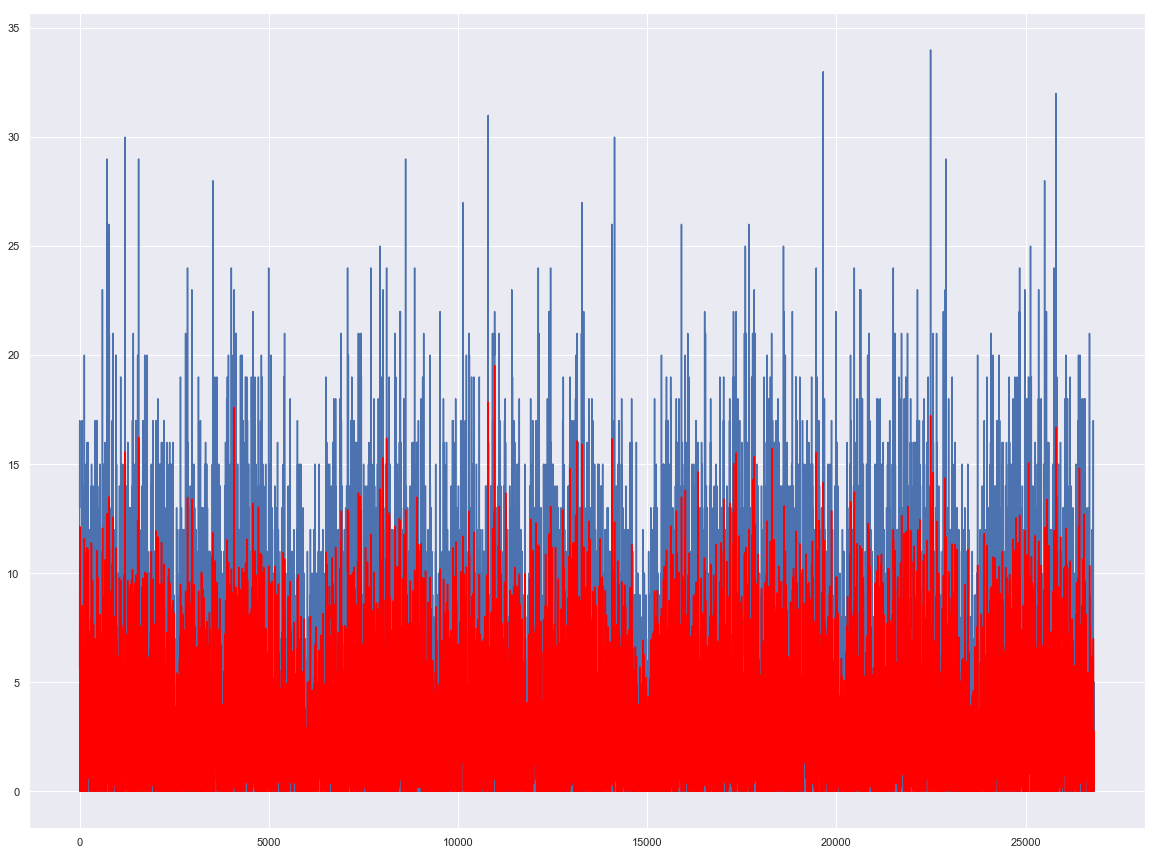

In [348]:
# plot
plt.figure(figsize=(20,15))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [357]:
#aquiaquiaqui

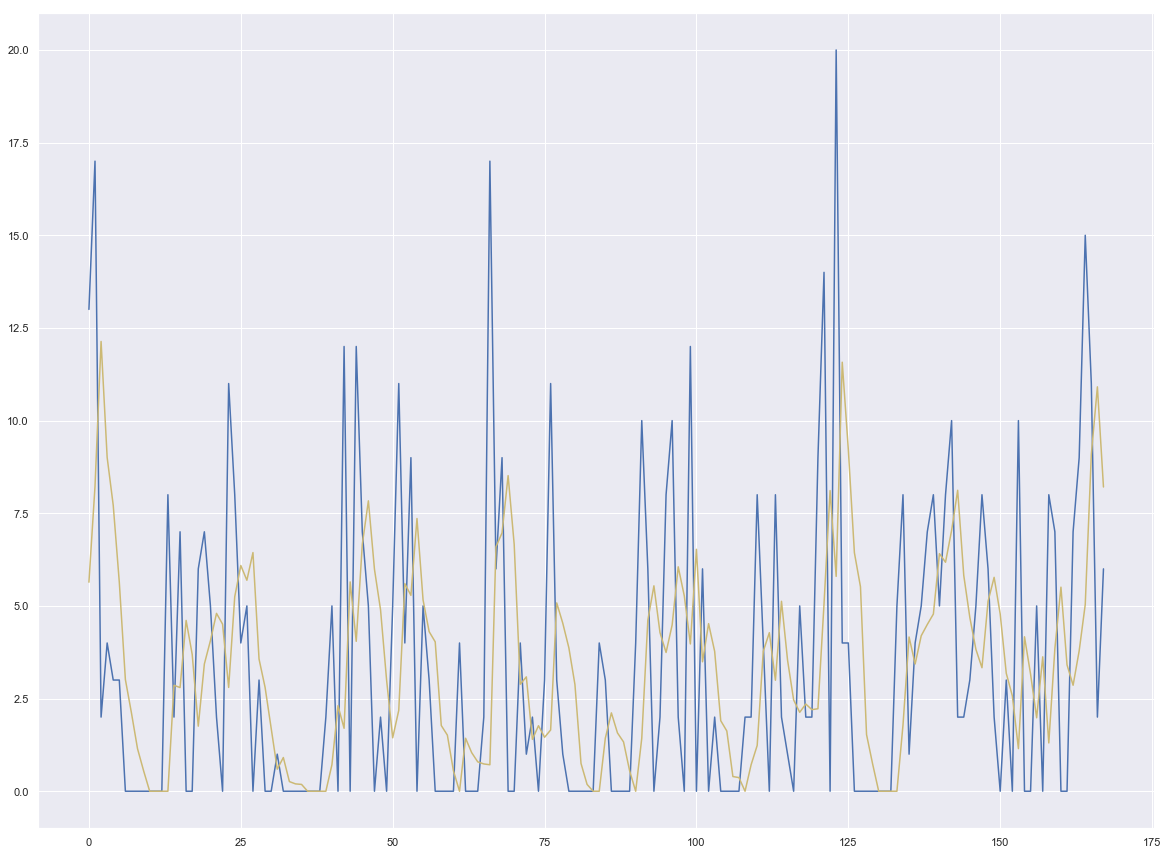

In [409]:
# plot
plt.figure(figsize=(20,15))
pyplot.plot(test[0:168])
pyplot.plot(predictions[0:168], color='y')
pyplot.show()

In [410]:
len(df_series_tiempo)

78865

In [411]:
# Remuestreo de frecuencia serie diaria
#columnas = ['name1','name2','namen']
df_series_tiempo_diaria = pd.DataFrame()
df_series_tiempo_diaria["NUM_PERS_IMPLS"] = df_series_tiempo.NUM_PERS_IMPLS.resample('D').sum()


In [412]:
len(df_series_tiempo_diaria)

3287

In [413]:
df_series_tiempo_diaria.head(3)

NUM_PERS_IMPLS
FECHA                     
2010-01-01              52
2010-01-02              42
2010-01-03              46

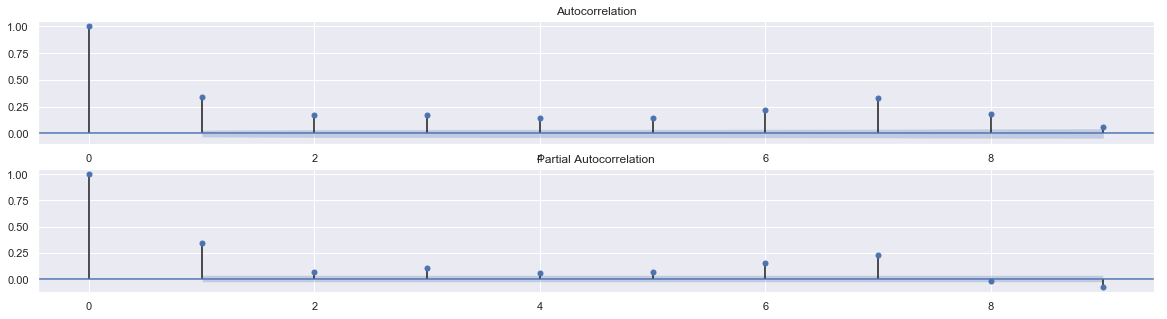

In [448]:
# Plot con statsmodel reduciendo dimensionalidad a escalares con squeeze
fig_sm = plt.figure(figsize=(20,5))
ax1_sm = fig_sm.add_subplot(211)
fig_sm = sm.graphics.tsa.plot_acf(df_series_tiempo_diaria, lags=9, ax=ax1_sm)
ax2_sm = fig_sm.add_subplot(212)
fig_sm = sm.graphics.tsa.plot_pacf(df_series_tiempo_diaria, lags=9, ax=ax2_sm)

In [449]:
# Creamos otro modelo ARIMA de reajuste, para una configuración determinada (P, D, Q) 
# y lo entrenamos en nuestros datos utilizando el método fit:
model_dia_303 = ARIMA(df_series_tiempo_diaria, order=(3,0,3), freq='D')
model_dia_303_fit = model_dia_303.fit(disp=3, method='mle')
print(model_dia_303_fit.summary())

/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:         NUM_PERS_IMPLS   No. Observations:                 3287
Model:                     ARMA(3, 3)   Log Likelihood              -14990.536
Method:                           mle   S.D. of innovations             23.111
Date:                Mon, 11 Nov 2019   AIC                          29997.072
Time:                        17:41:11   BIC                          30045.854
Sample:                    01-01-2010   HQIC                         30014.538
                         - 12-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   76.7166      1.171     65.496      0.000      74.421      79.012
ar.L1.NUM_PERS_IMPLS     0.4544        nan        nan        nan         nan         nan
ar.L2.NUM_PE

In [450]:
print(model_dia_303_fit.summary2())

                             Results: ARMA
Model:                ARMA              BIC:                  30045.8540
Dependent Variable:   NUM_PERS_IMPLS    Log-Likelihood:       -14991.   
Date:                 2019-11-11 17:41  Scale:                1.0000    
No. Observations:     3287              Method:               mle       
Df Model:             7                 Sample:               01-01-2010
Df Residuals:         3280                                    12-31-2018
Converged:            1.0000            S.D. of innovations:  23.111    
No. Iterations:       157.0000          HQIC:                 30014.538 
AIC:                  29997.0722                                        
------------------------------------------------------------------------
                      Coef.  Std.Err.      t      P>|t|   [0.025  0.975]
------------------------------------------------------------------------
const                76.7166   1.1713     65.4959 0.0000 74.4208 79.0123
ar.L1.NU

In [451]:
##############################

In [452]:
# Remuestreo de frecuencia serie semanal
#columnas = ['name1','name2','namen']
df_series_tiempo_semanal = pd.DataFrame()
df_series_tiempo_semanal["NUM_PERS_IMPLS"] = df_series_tiempo.NUM_PERS_IMPLS.resample('W').sum()


In [453]:
len(df_series_tiempo_semanal)

471

In [454]:
df_series_tiempo_semanal.head(3)

NUM_PERS_IMPLS
FECHA                     
2010-01-03             140
2010-01-10             397
2010-01-17             339

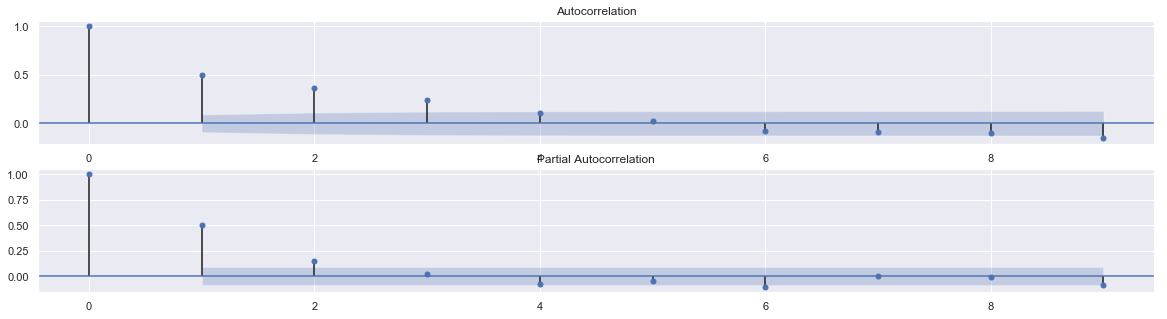

In [455]:
# Plot con statsmodel reduciendo dimensionalidad a escalares con squeeze
fig_sm = plt.figure(figsize=(20,5))
ax1_sm = fig_sm.add_subplot(211)
fig_sm = sm.graphics.tsa.plot_acf(df_series_tiempo_semanal, lags=9, ax=ax1_sm)
ax2_sm = fig_sm.add_subplot(212)
fig_sm = sm.graphics.tsa.plot_pacf(df_series_tiempo_semanal, lags=9, ax=ax2_sm)

In [456]:
# Creamos otro modelo ARIMA de reajuste, para una configuración determinada (P, D, Q) 
# y lo entrenamos en nuestros datos utilizando el método fit:
model_sem_110 = ARIMA(df_series_tiempo_semanal, order=(1,1,0), freq='W')
model_sem_110_fit = model_sem_110.fit(disp=3, method='mle')
print(model_sem_110_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.NUM_PERS_IMPLS   No. Observations:                  470
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2822.041
Method:                           mle   S.D. of innovations             98.030
Date:                Mon, 11 Nov 2019   AIC                           5650.081
Time:                        17:41:49   BIC                           5662.539
Sample:                    01-10-2010   HQIC                          5654.983
                         - 01-06-2019                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2277      3.365     -0.068      0.946      -6.822       6.367
ar.L1.D.NUM_PERS_IMPLS    -0.3447      0.044     -7.781      0.000      -0.431      -0.258
    

In [457]:
print(model_sem_110_fit.summary2())

                            Results: ARIMA
Model:                ARIMA            BIC:                 5662.5394 
Dependent Variable:   D.NUM_PERS_IMPLS Log-Likelihood:      -2822.0   
Date:                 2019-11-11 17:41 Scale:               1.0000    
No. Observations:     470              Method:              mle       
Df Model:             2                Sample:              01-10-2010
Df Residuals:         468                                   01-06-2019
Converged:            1.0000           S.D. of innovations: 98.030    
No. Iterations:       12.0000          HQIC:                5654.983  
AIC:                  5650.0812                                       
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                  -0.2277   3.3646 -0.0677 0.9461 -6.8222  6.3668
ar.L1.D.NUM_PERS_IMPLS -0.3447   0

In [458]:
##############################

In [459]:
# Remuestreo de frecuencia serie mensual
#columnas = ['name1','name2','namen']
df_series_tiempo_mensual = pd.DataFrame()
df_series_tiempo_mensual["NUM_PERS_IMPLS"] = df_series_tiempo.NUM_PERS_IMPLS.resample('M').sum()


In [460]:
len(df_series_tiempo_mensual)

108

In [461]:
df_series_tiempo_mensual.head(3)

NUM_PERS_IMPLS
FECHA                     
2010-01-31            1805
2010-02-28            2032
2010-03-31            2251

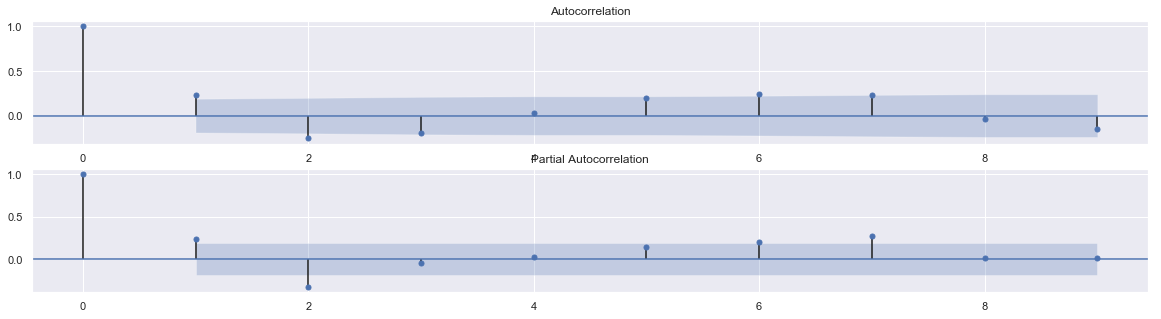

In [462]:
# Plot con statsmodel reduciendo dimensionalidad a escalares con squeeze
fig_sm = plt.figure(figsize=(20,5))
ax1_sm = fig_sm.add_subplot(211)
fig_sm = sm.graphics.tsa.plot_acf(df_series_tiempo_mensual, lags=9, ax=ax1_sm)
ax2_sm = fig_sm.add_subplot(212)
fig_sm = sm.graphics.tsa.plot_pacf(df_series_tiempo_mensual, lags=9, ax=ax2_sm)

In [463]:
##############################

In [464]:
# Remuestreo de frecuencia serie anual
#columnas = ['name1','name2','namen']
df_series_tiempo_anual = pd.DataFrame()
df_series_tiempo_anual["NUM_PERS_IMPLS"] = df_series_tiempo.NUM_PERS_IMPLS.resample('Y').sum()


In [465]:
len(df_series_tiempo_anual)

9

In [466]:
df_series_tiempo_anual.head(3)

NUM_PERS_IMPLS
FECHA                     
2010-12-31           26578
2011-12-31           27342
2012-12-31           26982

/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


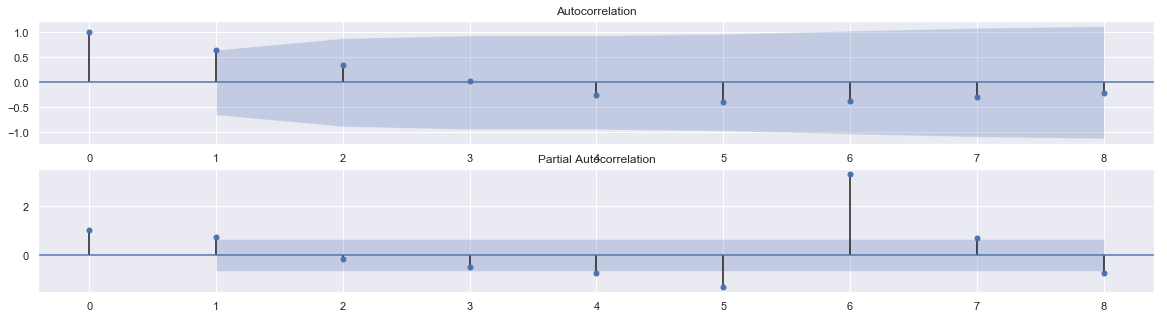

In [468]:
# Plot con statsmodel reduciendo dimensionalidad a escalares con squeeze
fig_sm = plt.figure(figsize=(20,5))
ax1_sm = fig_sm.add_subplot(211)
fig_sm = sm.graphics.tsa.plot_acf(df_series_tiempo_anual, lags=8, ax=ax1_sm)
ax2_sm = fig_sm.add_subplot(212)
fig_sm = sm.graphics.tsa.plot_pacf(df_series_tiempo_anual, lags=8, ax=ax2_sm)

In [469]:
########## CHIMPUM

In [470]:
# Creamos otro modelo ARIMA de reajuste, para una configuración determinada (P, D, Q) 
# y lo entrenamos en nuestros datos utilizando el método fit:
model_sem_110 = ARIMA(df_series_tiempo_semanal, order=(1,1,0), freq='W')
model_sem_110_fit = model_sem_110.fit(disp=3, method='mle')
print(model_sem_110_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.NUM_PERS_IMPLS   No. Observations:                  470
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2822.041
Method:                           mle   S.D. of innovations             98.030
Date:                Mon, 11 Nov 2019   AIC                           5650.081
Time:                        17:43:19   BIC                           5662.539
Sample:                    01-10-2010   HQIC                          5654.983
                         - 01-06-2019                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2277      3.365     -0.068      0.946      -6.822       6.367
ar.L1.D.NUM_PERS_IMPLS    -0.3447      0.044     -7.781      0.000      -0.431      -0.258
    

In [471]:
print(model_sem_110_fit.summary2())

                            Results: ARIMA
Model:                ARIMA            BIC:                 5662.5394 
Dependent Variable:   D.NUM_PERS_IMPLS Log-Likelihood:      -2822.0   
Date:                 2019-11-11 17:43 Scale:               1.0000    
No. Observations:     470              Method:              mle       
Df Model:             2                Sample:              01-10-2010
Df Residuals:         468                                   01-06-2019
Converged:            1.0000           S.D. of innovations: 98.030    
No. Iterations:       12.0000          HQIC:                5654.983  
AIC:                  5650.0812                                       
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                  -0.2277   3.3646 -0.0677 0.9461 -6.8222  6.3668
ar.L1.D.NUM_PERS_IMPLS -0.3447   0

In [472]:
##############################

In [473]:
# CONCLUSION CREO QUE MIS DATOS ESTAN SESGADOS POR COPY/PASTE

In [474]:
##############################

In [302]:
# El conjunto de datos completo en la muestra contiene 744 observaciones, y sólo probamos a utilizar el primer 80% 
# como muestra, considerando pronósticos de un perido adelante.

# Step 1: entrenar modelos con parámetros de la muestra de entrenamiento.
training_size = int(len(df_series_tiempo) * 0.8)

training_df_series_tiempo = df_series_tiempo[:training_size]

In [303]:
# Para hacer frente a la posible futura estacionalidad, los procesos ARIMA han sido generalizados, 
# estableciendo los modelos SARIMA (Seasonal Autoregressive Integrated Moving Average Model).
# Estos, incluyen residuos
# Un modelo SARIMAX es un modelo de regresión lineal que utiliza un proceso de tipo SARIMA, 
# es decir este modelo es útil en los casos donde sospechamos que los residuos pueden exhibir 
# una tendencia estacional o patrón.

In [304]:
#?sm.tsa.SARIMAX

In [1561]:
# MODELO SARIMA(1,0,0): Naive
#training_sarimamod100 = sm.tsa.SARIMAX(training_df_series_tiempo, order=(1,0,0), trend='c', freq='H')
#training_sarimamod100 = sm.tsa.SARIMAX(training_df_series_tiempo, order=(1,0,0), \
#                                       seasonal_order=(1, 1, 1, 52), trend='ct', freq='H',\
#                                       mle_regression=True, simple_differencing=False, \
#                                       enforce_stationarity=True, enforce_invertibility=True, 
#                                       hamilton_representation=False)
#training_res_sarimamod100 = training_sarimamod100.fit()

# Parámetros estimados
#print(training_res_sarimamod100.params)

intercept     0.232852
drift        -0.000486
ar.L1         0.194563
ar.S.L52     -0.037383
ma.S.L52     -0.839019
sigma2       11.924246
dtype: float64


In [308]:
# MODELO ARMA(0,0): Naive
training_armamod00 = sm.tsa.ARMA(training_df_series_tiempo, (0,0), freq='H')
training_res_armamod00 = training_armamod00.fit(method='mle', trend='c', disp=True)

# Parámetros estimados
print(training_res_armamod00.params)

const    2.369748
dtype: float64


In [309]:
#?sm.tsa.ARMA

In [310]:
# MODELO ARMA(1,0)
training_armamod10 = sm.tsa.ARMA(training_df_series_tiempo, (1,0), freq='H')
training_res_armamod10 = training_armamod10.fit(method='mle', trend='c', disp=True)

# Parámetros estimados
print(training_res_armamod10.params)

const                   2.371444
ar.L1.NUM_PERS_IMPLS    0.191652
dtype: float64


In [311]:
# MODELO ARMA(0,1)
training_armamod01 = sm.tsa.ARMA(training_df_series_tiempo, (0,1), freq='H')
training_res_armamod01 = training_armamod01.fit(method='mle', trend='c', disp=True)

# Parámetros estimados
print(training_res_armamod01.params)

const                   2.370758
ma.L1.NUM_PERS_IMPLS    0.166468
dtype: float64


In [312]:
# MODELO ARMA(1,1)
training_armamod11 = sm.tsa.ARMA(training_df_series_tiempo, (1,1), freq='H')
training_res_armamod11 = training_armamod11.fit(method='mle', trend='c', disp=True)

# Parámetros estimados
print(training_res_armamod11.params)

const                   2.375965
ar.L1.NUM_PERS_IMPLS    0.690795
ma.L1.NUM_PERS_IMPLS   -0.521870
dtype: float64


In [313]:
# MODELO ARMA(2,0)
training_armamod20 = sm.tsa.ARMA(training_df_series_tiempo, (2,0), freq='H')
training_res_armamod20 = training_armamod20.fit(method='mle', trend='c', disp=True)

# Parámetros estimados
print(training_res_armamod20.params)

const                   2.373279
ar.L1.NUM_PERS_IMPLS    0.173535
ar.L2.NUM_PERS_IMPLS    0.094110
dtype: float64


In [314]:
# MODELO ARMA(2,1)
training_armamod21 = sm.tsa.ARMA(training_df_series_tiempo, (2,1), freq='H')
training_res_armamod21 = training_armamod21.fit(method='mle', trend='c', disp=True)

# Parámetros estimados
print(training_res_armamod21.params)

const                   2.375921
ar.L1.NUM_PERS_IMPLS    0.644320
ar.L2.NUM_PERS_IMPLS    0.019753
ma.L1.NUM_PERS_IMPLS   -0.481594
dtype: float64


In [315]:
# MODELO ARMA(2,2)
training_armamod22 = sm.tsa.ARMA(training_df_series_tiempo, (2,2), freq='H')
training_res_armamod22 = training_armamod22.fit(method='mle', trend='c', disp=True)

# Parámetros estimados
print(training_res_armamod22.params)

const                   2.376177
ar.L1.NUM_PERS_IMPLS    0.016545
ar.L2.NUM_PERS_IMPLS    0.488423
ma.L1.NUM_PERS_IMPLS    0.165253
ma.L2.NUM_PERS_IMPLS   -0.397175
dtype: float64


In [336]:
# Step 2: produce one-step-ahead forecasts
# Contendrá matriz que contendrá el valor del pronóstico, 
# el error estándar del pronóstico y la información del intervalo de confianza.
fcast = training_res_armamod21.forecast()


In [337]:
type(fcast)

tuple

In [338]:
fcast

(array([2.85540024]), array([3.26047681]), array([[-3.53501687,  9.24581736]]))

In [341]:
# Step 3: compute root mean square forecasting error
#true = df_series_tiempo._reindex(fcast.index)
###real = df_series_tiempo.reindex(fcast.index)
###error = real - fcast

In [ ]:
# Save initial forecast
forecasts[training_res_armamod21.index[-1]] = res.forecast(steps=nforecasts)

In [342]:
# Entrenamiento
# Constante de varianza de la media 2.42 (previsiblemente ruido blanco)
arma_mod00 = sm.tsa.ARMA(df_series_tiempo, (0,0), freq='D').fit(method='mle', trend='c', disp=True)
print(arma_mod00.params)

ValueError: The given frequency argument could not be matched to the given index.

In [343]:
# Posiblemente parámetro por término de ruido en observación estacionaria
arma_mod10 = sm.tsa.ARMA(, (1,0), freq='H').fit(disp=False)
print(arma_mod10.params)

NameError: name 'prueba' is not defined

In [ ]:
# Posiblemente parámetro por término de ruido en observación estacionaria
arma_mod11 = sm.tsa.ARMA(prueba, (1,1), freq='H').fit(disp=False)
print(arma_mod11.params)

In [ ]:
print(arma_mod21.aic, arma_mod21.bic, arma_mod21.hqic)

In [ ]:
print(arma_mod21.summary())

In [ ]:
print(arma_mod21.summary2())

In [ ]:
sm.stats.durbin_watson(arma_mod21.resid.values)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod21.resid.plot(ax=ax);

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [ ]:
resid = arma_mod21.resid

In [ ]:
stats.normaltest(resid)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=168, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=168, ax=ax2)

In [ ]:
prueba.shape

In [ ]:
resid.shape

In [ ]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), nlags=168, fft=True, qstat=True)

In [ ]:
r.shape

In [ ]:
#r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
prueba = np.c_[range(1,169), r[1:], q, p]
table = pd.DataFrame(prueba, columns=['lag', "AC", "Q", "Prob(>Q)"])
#print(table.set_index('lag'))
table.set_index('lag').head(3)

In [ ]:
predict_num_pers_impls = arma_mod21.predict(dynamic=True)
#print(predict_num_pers_impls)
predict_num_pers_impls.head(3)

In [ ]:
predict_num_pers_impls.shape

In [ ]:
predict_num_pers_impls.count()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = prueba.index[0:].plot(ax=ax)
fig = arma_mod21.plot_predict(dynamic=True, ax=ax, plot_insample=False)

In [659]:
########### SEGUNDA ETAPA: estimar los coeficientes/parámetros de los términos 
# autorregresivos (AR) y de media móvil (MA) del modelo.
#La estimación maxima de verosimilitud (MLE) es un metodo estadístico para ajustando un modelo a los datos 
# y provee estimaciones para los parámetros del modelo.
#mean es la media del modelo (ej. mu)
#sigma es desviación estándar del modelo residual/innovaciones.
#El orden de parámetros en el argumento de entrada - phi - determina el orden del componente AR.
#* comenzando con el lag más bajo
#El orden de parámetros en el argumento de entrada- theta - determina el orden del componente MA.
#* comenzando por el lag más bajo
#--- EL MODELO ES ESTABLE?

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA
#model = ARIMA(prueba, order=(168,24,1))
#model_fit = model.fit()
#output = model_fit.forecast()
#yhat = output[0]

In [ ]:
# Limpiar serie temporal antes de analizar tendencia y estacionalidad de comportamientos no deseados (sesgos),
# varianzas desiguales para corregir la no linealidad en la relación (mejorar correlación entre las variables). 
# Comprobar si es heterocedástica (no es constante en varianza); es frecuente observar que la varianza 
# aumenta con el nivel de la serie. Por lo tanto no sigue una distribución normal
# es recomendable realizar alguna de las siguientes transformaciones para acercarse más a una distribución normal:
# a) Transformación logarítmica: expandir valores pequeños y contraer los grandes
# b) Transformación de Box-Cox: lambda para aumentar la normalidad.
    

In [ ]:
# BOX JENKINS con ARMA

In [ ]:
####### aqui

In [ ]:
##############################

In [ ]:
# Creamos un objeto ARIMA Model para una configuración determinada (P, D, Q) 
# y lo entrenamos en nuestros datos utilizando el método fit:
from statsmodels.tsa.arima_model import ARIMA
order_212 = (2, 1, 2)
model_212 = ARIMA(df_series_tiempo, order_212, freq='H')
fit = model_212.fit()

In [ ]:
# Devuelve un objeto ARIMAResults que es de interés. Podemos comprobar la calidad de nuestro modelo:
fit.summary()

In [ ]:
fit.summary2()

In [ ]:
# Y podemos estimar aproximadamente cómo se distribuyen los residuos:
residuals = pd.DataFrame(fit.resid, columns=['residuals'])
residuals.plot(kind='kde')

In [ ]:
?fit.predict

In [ ]:
# Predicción
# Si estamos satisfechos con nuestro modelo, entonces podemos predecir algunos datos dentro o fuera de la muestra.
# Esto se puede hacer con el método predict que, de forma predeterminada, devuelve la variable 
# endógena diferenciada, no la variable endógena en sí. Para cambiar este comportamiento, debemos 
# especificar typ = ‘niveles’.
# VARIABLE ENDÓGENA: valor que está determinado por las relaciones establecidas dentro del modelo 
preds = fit.predict(744, 1488, typ='levels')
# Entonces nuestras predicciones tienen los mismos niveles de nuestros datos de entrenamiento:
preds.plot(figsize=(20,4));

In [ ]:
# A continuación, se utilizan los métodos ion() y ioff() que activan o desactivan
# el modo interactivo de dibujo para añadir, o no, nuevos datos sobre el gráfico actual. 
df_series_tiempo.plot(figsize=(20,4))   # Dibuja el gráfico

plt.xlabel("Fechas")   # Inserta el título del eje X
plt.ylabel("Personas")   # Inserta el título del eje Y
plt.ioff()   # Desactiva modo interactivo de dibujo

preds.plot(figsize=(20,4));   # No dibuja datos de lista2
plt.ion()   # Activa modo interactivo de dibujo
preds.plot(figsize=(20,4));   # Dibuja datos de lista2 sin borrar datos de lista1

In [ ]:
?df_series_tiempo.plot

In [ ]:
# Además, si nos interesa tener también intervalos de confianza, podemos usar el método forecast.
# Argumento de cadena
# También es posible alimentar predicciones con cadenas 
# (siempre use el formato ISO-8601 si desea evitar problemas) u objetos de fecha y hora:
## preds = fit.predict("2001-11-02", "2001-12-15", typ='levels')
# Funciona como se espera en StatsModels 0.9.0:
import statsmodels as sm
sm.__version__ # '0.9.0'

In [812]:
# AYUDA A BEA:

In [791]:
df_prueba["EDAD_APROX"] = df_from_xlsx_total["EDAD_APROX"][0]

In [797]:
type(df_prueba)

pandas.core.series.Series

In [792]:
type(df_prueba["EDAD_APROX"])

int

In [795]:
df_prueba["EDAD_APROX"]

20

In [803]:
var_prueba = df_prueba.astype(str)

In [804]:
type(var_prueba)

pandas.core.series.Series

In [806]:
var_prueba["EDAD_APROX"]

'20'

In [808]:
df_prueba["EDAD_APROX"] = var_prueba.replace({"20":"Veinte"}, regex=True)

In [809]:
df_prueba["EDAD_APROX"][0]

'Veinte'

In [810]:
type(df_prueba)

pandas.core.series.Series

In [811]:
df_prueba["EDAD_APROX"].head(1)

0    Veinte
Name: EDAD_APROX, dtype: object

In [722]:
df_prueba["EDAD"] = df_prueba["EDAD"].astype(np.str)

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [720]:
df_prueba["EDAD"] = df_prueba["EDAD"].replace({20:"Veinte"}, regex=True)

TypeError: Cannot compare types 'ndarray(dtype=object)' and 'int'

In [ ]:
####### FINAL